<div style="background-color: darkturquoise; padding: 10px; font-size: 60px; color: white; text-align: center; border-radius: 10px; box-shadow: 0px 0px 10px rgba(0, 0, 0, 0.5); line-height: 1.2;">

  <strong style="font-size: 50px;">Healthcare Fraud Buster</strong>

</div>


## Project Overview / Goal:    

This project aims to create a positive impact on the healthcare system by reducing insurance premiums, their by ensuring high-quality, affordable healthcare for all.


In [4]:
# Importing pandas for data manipulation and analysis
import pandas as pd
# Importing numpy for scientific computing
import numpy as np
# Importing matplotlib for data visualization
import matplotlib.pyplot as plt
# Importing colormaps for data visualization
from matplotlib import colormaps
list(colormaps)
# Importing seaborn for data visualization
import seaborn as sns
# Importing warnings to ignore warnings
import Draft_wrangle as w
# Importing sklearn for machine learning
from sklearn.preprocessing import OneHotEncoder, LabelEncoder 
# Importing sklearn for machine learning        
from sklearn.model_selection import train_test_split
# Import the DecisionTreeClassifier from scikit-learn 
from sklearn.tree import DecisionTreeClassifier
# Import the RandomForestClassifier from scikit-learn
from sklearn.ensemble import RandomForestClassifier
# Import the KNeighborsClassifier from scikit-learn
from sklearn.neighbors import KNeighborsClassifier
# Import the LogisticRegression from scikit-learn
from sklearn.linear_model import LogisticRegression
# Import warnings to ignore warnings
import warnings
warnings.filterwarnings("ignore")
import sklearn.preprocessing
from sklearn.linear_model import LinearRegression, TweedieRegressor 
from sklearn.preprocessing import StandardScaler, RobustScaler, QuantileTransformer, MinMaxScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix

# Import feature selection tools
from sklearn.feature_selection import SelectKBest, f_regression, RFE

# Import train_test_split for model evaluation
from sklearn.model_selection import train_test_split

# Import R-squared (coefficient of determination) metric for model evaluation
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Import scikit-learn preprocessing module for data preparation and feature engineering
import sklearn.preprocessing

# Import for LassoLars regression model
from sklearn.linear_model import LassoLars

# Import for DecisionTreeRegressor for decision tree-based regression
from sklearn.tree import DecisionTreeRegressor

# Import for mean_absolute_error metric to evaluate model performance
from sklearn.metrics import mean_absolute_error

# Import for RandomForestRegressor, an ensemble method for regression
from sklearn.ensemble import RandomForestRegressor
# Import for KNeighborsRegressor, a k-nearest neighbors regression model
from sklearn.neighbors import KNeighborsRegressor

# Import for another instance of RandomForestRegressor, 
# possibly for comparison or ensemble use
from sklearn.ensemble import RandomForestRegressor
import lightgbm as lgb



<div style="background-color: darkturquoise; padding: 20px; font-size: 20px; color: white;">
    Project Pipeline:-
    <div style="background-color: rgba(255, 0, 0, 0.5);">
         <strong style="font-size: 18px; background-color: orange; font-weight: bold; color: white;">PLAN </strong> ---Acquire--- Prepare --- Explore --- Model --- Deliver
    </div>
</div>


Initial Questions
 - What is the main objective of this project?
 - From where to obtain the data for this project?
 - What format is the data in, and what preprocessing steps are needed?
 - Are there any missing values or outliers that require attention?
 - Which features (variables) will be used as predictors in the models?
 - What types of machine learning models are suitable for the problem? 

<div style="background-color: darkturquoise; padding: 20px; font-size: 20px; color: white;">
    Project Pipeline:-
    <div style="background-color: rgba(255, 0, 0, 0.5);">
        - Plan --- <strong style="font-size: 18px; background-color: orange; font-weight: bold; color: white;">ACQUIRE </strong> --- Prepare --- Explore --- Model --- Deliver
    </div>
</div>


-   The functions acquire_test_data and acquire_train_data functions in the wrangle module acquires data 
from the .CSVs in 'https://www.kaggle.com/datasets/rohitrox/healthcare-provider-fraud-detection-analysis/data' 
which has data from CMS(Center for Medicare & Medicaid Services )

- Acquired two sets(train,test) of four datasets 
    - The inpatient dataset comprises of 50025 rows and 30 columns.
    - The outpatient dataset comprises of 643578 rows and 27
     columns
    - The beneficiary dataset comprises of 202524 rows and 25 columns. 
    - 

- Each observation in the inpatient dataset represents a specific claim raised by a specific provider for a specific beneficiary who was an inpatient.

- Each observation in the outpatient dataset represents a specific claim raised by a specific provider for a specific beneficiary who was an outpatient.

- Each observation in the beneficiary dataset represents personal and medical informations of each beneficiary.


In [5]:
# call the function to acquire the data from wrangle file for test data
test_outpatient_df,test_inpatient_df, test_beneficiary_df, test_df = w.acquire_test_data()
# call the function to acquire the data from wrangle file for train data
train_outpatient_df, train_inpatient_df, train_beneficiary_df, train_df = w.acquire_train_data()


In [6]:
# print summary statistics
w.summarize_outliers(train_outpatient_df, k=1.5)

Shape of Data: 
(517737, 27)
Info: 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517737 entries, 0 to 517736
Data columns (total 27 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   BeneID                  517737 non-null  object 
 1   ClaimID                 517737 non-null  object 
 2   ClaimStartDt            517737 non-null  object 
 3   ClaimEndDt              517737 non-null  object 
 4   Provider                517737 non-null  object 
 5   InscClaimAmtReimbursed  517737 non-null  int64  
 6   AttendingPhysician      516341 non-null  object 
 7   OperatingPhysician      90617 non-null   object 
 8   OtherPhysician          195046 non-null  object 
 9   ClmDiagnosisCode_1      507284 non-null  object 
 10  ClmDiagnosisCode_2      322357 non-null  object 
 11  ClmDiagnosisCode_3      203257 non-null  object 
 12  ClmDiagnosisCode_4      125596 non-null  object 
 13  ClmDiagnosisCode_5      74344 non-null

In [7]:
# print summary statistics
w.summarize_outliers(train_inpatient_df, k=1.5)

Shape of Data: 
(40474, 30)
Info: 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40474 entries, 0 to 40473
Data columns (total 30 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   BeneID                  40474 non-null  object 
 1   ClaimID                 40474 non-null  object 
 2   ClaimStartDt            40474 non-null  object 
 3   ClaimEndDt              40474 non-null  object 
 4   Provider                40474 non-null  object 
 5   InscClaimAmtReimbursed  40474 non-null  int64  
 6   AttendingPhysician      40362 non-null  object 
 7   OperatingPhysician      23830 non-null  object 
 8   OtherPhysician          4690 non-null   object 
 9   AdmissionDt             40474 non-null  object 
 10  ClmAdmitDiagnosisCode   40474 non-null  object 
 11  DeductibleAmtPaid       39575 non-null  float64
 12  DischargeDt             40474 non-null  object 
 13  DiagnosisGroupCode      40474 non-null  object 
 14  Clm

In [8]:
# print summary statistics
w.summarize_outliers(train_beneficiary_df, k=1.5)

Shape of Data: 
(138556, 25)
Info: 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 138556 entries, 0 to 138555
Data columns (total 25 columns):
 #   Column                           Non-Null Count   Dtype 
---  ------                           --------------   ----- 
 0   BeneID                           138556 non-null  object
 1   DOB                              138556 non-null  object
 2   DOD                              1421 non-null    object
 3   Gender                           138556 non-null  int64 
 4   Race                             138556 non-null  int64 
 5   RenalDiseaseIndicator            138556 non-null  object
 6   State                            138556 non-null  int64 
 7   County                           138556 non-null  int64 
 8   NoOfMonths_PartACov              138556 non-null  int64 
 9   NoOfMonths_PartBCov              138556 non-null  int64 
 10  ChronicCond_Alzheimer            138556 non-null  int64 
 11  ChronicCond_Heartfailure         138556 no

<div style="background-color: darkturquoise; padding: 20px; font-size: 20px; color: white;">
    Project Pipeline:-
    <div style="background-color: rgba(255, 0, 0, 0.5);">
        - Plan --- Acquire---<strong style="font-size: 18px; background-color: orange; font-weight: bold; color: white;">PREPARE</strong> --- Explore --- Model --- Deliver
    </div>
</div>


### Combine fraud data


In [9]:
# Combine the dataframes vertically using pd.concat
combined_df = pd.concat([train_df, test_df])
# Sort the combined dataframe based on the 'Alphanumeric_Field' column
fraud_df = combined_df.sort_values(by='Provider')
# Sort the index of the sorted dataframe
fraud_df = fraud_df.reset_index(drop=True)
# Display the sorted dataframe
fraud_df.head()


,Provider,PotentialFraud
0,PRV51001,No
1,PRV51002,NaN
2,PRV51003,Yes
3,PRV51004,No
4,PRV51005,Yes


### Combine inpatiant data


In [10]:
# adding inpatient data together to form new DataFrame 
inpatient_df = pd.concat([train_inpatient_df, test_inpatient_df])

# quick look at the data 
inpatient_df.head(3)

,BeneID,ClaimID,ClaimStartDt,ClaimEndDt,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,AdmissionDt,...,ClmDiagnosisCode_7,ClmDiagnosisCode_8,ClmDiagnosisCode_9,ClmDiagnosisCode_10,ClmProcedureCode_1,ClmProcedureCode_2,ClmProcedureCode_3,ClmProcedureCode_4,ClmProcedureCode_5,ClmProcedureCode_6
0,BENE11001,CLM46614,2009-04-12,2009-04-18,PRV55912,26000,PHY390922,NaN,NaN,2009-04-12,...,2724,19889,5849,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,BENE11001,CLM66048,2009-08-31,2009-09-02,PRV55907,5000,PHY318495,PHY318495,NaN,2009-08-31,...,NaN,NaN,NaN,NaN,7092.0,NaN,NaN,NaN,NaN,NaN
2,BENE11001,CLM68358,2009-09-17,2009-09-20,PRV56046,5000,PHY372395,NaN,PHY324689,2009-09-17,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Combind outpatiant data

In [11]:
# adding outpatient data together to form new DataFrame 
outpatient_df = pd.concat([train_outpatient_df, test_outpatient_df])

# Quick look at the data 
outpatient_df.head(3)

,BeneID,ClaimID,ClaimStartDt,ClaimEndDt,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,ClmDiagnosisCode_1,...,ClmDiagnosisCode_9,ClmDiagnosisCode_10,ClmProcedureCode_1,ClmProcedureCode_2,ClmProcedureCode_3,ClmProcedureCode_4,ClmProcedureCode_5,ClmProcedureCode_6,DeductibleAmtPaid,ClmAdmitDiagnosisCode
0,BENE11002,CLM624349,2009-10-11,2009-10-11,PRV56011,30,PHY326117,NaN,NaN,78943,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,56409
1,BENE11003,CLM189947,2009-02-12,2009-02-12,PRV57610,80,PHY362868,NaN,NaN,6115,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,79380
2,BENE11003,CLM438021,2009-06-27,2009-06-27,PRV57595,10,PHY328821,NaN,NaN,2723,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN


### Combind beneficiary data

In [12]:
# Adding beneficiary data togehter to form a new DataFrame 
beneficiary_df = pd.concat([train_beneficiary_df, test_beneficiary_df])

# Quick look at the data 
beneficiary_df.head(3)

,BeneID,DOB,DOD,Gender,Race,RenalDiseaseIndicator,State,County,NoOfMonths_PartACov,NoOfMonths_PartBCov,...,ChronicCond_Depression,ChronicCond_Diabetes,ChronicCond_IschemicHeart,ChronicCond_Osteoporasis,ChronicCond_rheumatoidarthritis,ChronicCond_stroke,IPAnnualReimbursementAmt,IPAnnualDeductibleAmt,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt
0,BENE11001,1943-01-01,NaN,1,1,0,39,230,12,12,...,1,1,1,2,1,1,36000,3204,60,70
1,BENE11002,1936-09-01,NaN,2,1,0,39,280,12,12,...,2,2,2,2,2,2,0,0,30,50
2,BENE11003,1936-08-01,NaN,1,1,0,52,590,12,12,...,2,2,1,2,2,2,0,0,90,40


### Prepare Datasets

In [13]:
beneficiary_df = w.prep_beneficiary_data(beneficiary_df)
w.beneficiary_label_encode(beneficiary_df)
beneficiary_df = w.beneficiary_OneHotLabel_encode(beneficiary_df)
beneficiary_df.head()

,beneid,gender,race,renaldiseaseindicator,state,county,noofmonths_partacov,noofmonths_partbcov,chroniccond_alzheimer,chroniccond_heartfailure,...,age,total_reimbursed_amt,total_deductible_amt,dob_year,dob_month,dob_day,race_0,race_1,race_2,race_3
0,BENE11001,0,0,0,39,230,12,12,0,1,...,66,36060,3264,1943,1,1,1,0,0,0
0,BENE11001,0,0,0,39,230,12,12,0,1,...,66,36060,3264,1943,1,1,1,0,0,0
1,BENE11002,1,0,0,39,280,12,12,1,1,...,73,30,30,1936,9,1,1,0,0,0
1,BENE11007,0,1,0,45,610,12,12,0,0,...,69,1490,1490,1940,9,1,1,0,0,0
2,BENE11003,0,0,0,52,590,12,12,0,1,...,73,90,90,1936,8,1,1,0,0,0


In [14]:
inpatient_df = w.wrangle_inpatient(inpatient_df)
inpatient_df = w.create_features_inpatient(inpatient_df)
inpatient_df.head(3)

,beneid,claimid,claimstartdt,claimenddt,provider,inscclaimamtreimbursed,attendingphysician,operatingphysician,otherphysician,admissiondt,...,clmdiagnosiscode_6,clmdiagnosiscode_7,clmdiagnosiscode_8,clmdiagnosiscode_9,clmdiagnosiscode_10,clmprocedurecode_1,clmprocedurecode_2,clmprocedurecode_3,claimduration,numphysicians
0,BENE11001,CLM46614,2009-04-12,2009-04-18,PRV55912,26000,PHY390922,PHY000000,PHY000000,2009-04-12,...,71590,2724,19889,5849,00000,000,000,000,6,3
1,BENE11001,CLM66048,2009-08-31,2009-09-02,PRV55907,5000,PHY318495,PHY318495,PHY000000,2009-08-31,...,00000,00000,00000,00000,00000,7092.0,000,000,2,3
2,BENE11001,CLM68358,2009-09-17,2009-09-20,PRV56046,5000,PHY372395,PHY000000,PHY324689,2009-09-17,...,32723,00000,00000,00000,00000,000,000,000,3,3


In [15]:
outpatient_df = w.wrangle_outpatient(outpatient_df)
outpatient_df = w.create_features_outpatient(outpatient_df)
outpatient_df.head(3)

,beneid,claimid,claimstartdt,claimenddt,provider,inscclaimamtreimbursed,attendingphysician,operatingphysician,otherphysician,clmdiagnosiscode_1,...,clmdiagnosiscode_3,clmdiagnosiscode_4,clmdiagnosiscode_5,clmdiagnosiscode_6,clmdiagnosiscode_7,clmdiagnosiscode_8,clmdiagnosiscode_9,deductibleamtpaid,clmadmitdiagnosiscode,claimduration
0,BENE11002,CLM624349,2009-10-11,2009-10-11,PRV56011,30,PHY326117,PHY000000,PHY000000,78943,...,V1272,00000,00000,00000,00000,00000,00000,0,56409,0
1,BENE11003,CLM189947,2009-02-12,2009-02-12,PRV57610,80,PHY362868,PHY000000,PHY000000,6115,...,00000,00000,00000,00000,00000,00000,00000,0,79380,0
2,BENE11003,CLM438021,2009-06-27,2009-06-27,PRV57595,10,PHY328821,PHY000000,PHY000000,2723,...,00000,00000,00000,00000,00000,00000,00000,0,00000,0


In [16]:
fraud_df = w.wrangle_fraud(fraud_df)
fraud_df.head()

,provider,potentialfraud,potentialfraud_encoded
0,PRV51001,No,0
2,PRV51003,Yes,1
3,PRV51004,No,0
4,PRV51005,Yes,1
6,PRV51007,No,0


In [17]:
beneficiary_df.head()

,beneid,gender,race,renaldiseaseindicator,state,county,noofmonths_partacov,noofmonths_partbcov,chroniccond_alzheimer,chroniccond_heartfailure,...,age,total_reimbursed_amt,total_deductible_amt,dob_year,dob_month,dob_day,race_0,race_1,race_2,race_3
0,BENE11001,0,0,0,39,230,12,12,0,1,...,66,36060,3264,1943,1,1,1,0,0,0
0,BENE11001,0,0,0,39,230,12,12,0,1,...,66,36060,3264,1943,1,1,1,0,0,0
1,BENE11002,1,0,0,39,280,12,12,1,1,...,73,30,30,1936,9,1,1,0,0,0
1,BENE11007,0,1,0,45,610,12,12,0,0,...,69,1490,1490,1940,9,1,1,0,0,0
2,BENE11003,0,0,0,52,590,12,12,0,1,...,73,90,90,1936,8,1,1,0,0,0


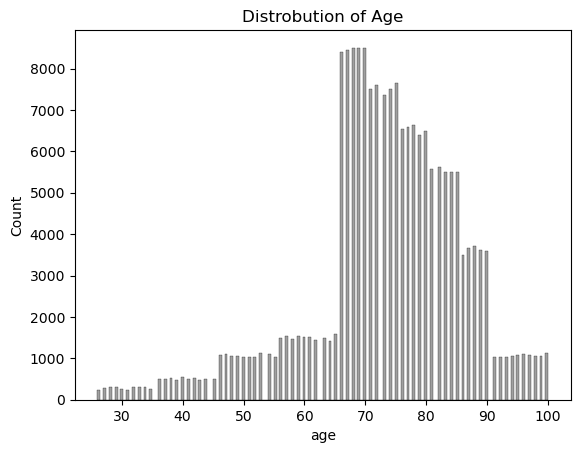

In [18]:
sns.histplot(data = beneficiary_df, x='age', color ='grey')
plt.title('Distrobution of Age')
plt.show()

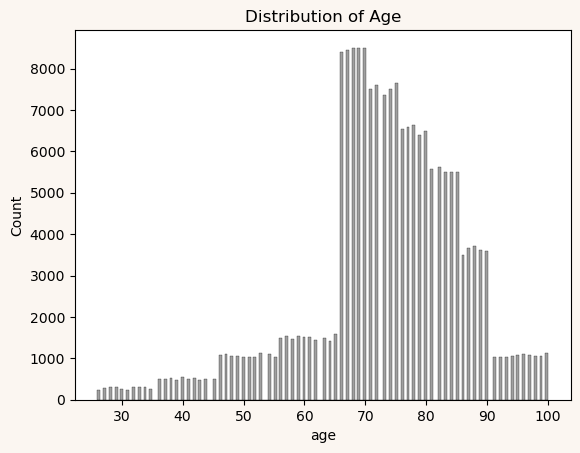

In [19]:
ax = sns.histplot(data = beneficiary_df, x='age', color ='grey')

ax.figure.set_facecolor('#FBF6F1')

plt.title('Distribution of Age')
plt.show()

### Join dataframes

In [20]:
outpatient_df = w.merge_outpatient_fraud(beneficiary_df, outpatient_df, fraud_df)
inpatient_df = w.merge_inpatient_fraud(beneficiary_df, inpatient_df, fraud_df)

In [21]:
outpatient_df.head(3)

,beneid,gender,race,renaldiseaseindicator,state,county,noofmonths_partacov,noofmonths_partbcov,chroniccond_alzheimer,chroniccond_heartfailure,...,clmdiagnosiscode_5,clmdiagnosiscode_6,clmdiagnosiscode_7,clmdiagnosiscode_8,clmdiagnosiscode_9,deductibleamtpaid,clmadmitdiagnosiscode,claimduration,potentialfraud,potentialfraud_encoded
0,BENE11002,1,0,0,39,280,12,12,1,1,...,00000,00000,00000,00000,00000,0.0,56409,0.0,Yes,1
1,BENE11007,0,1,0,45,610,12,12,0,0,...,72887,8448,00000,00000,00000,0.0,71691,20.0,No,0
2,BENE11007,0,1,0,45,610,12,12,0,0,...,00000,00000,00000,00000,00000,0.0,78099,0.0,No,0


In [22]:
inpatient_df.head()

,beneid,gender,race,renaldiseaseindicator,state,county,noofmonths_partacov,noofmonths_partbcov,chroniccond_alzheimer,chroniccond_heartfailure,...,clmdiagnosiscode_8,clmdiagnosiscode_9,clmdiagnosiscode_10,clmprocedurecode_1,clmprocedurecode_2,clmprocedurecode_3,claimduration,numphysicians,potentialfraud,potentialfraud_encoded
0,BENE11001,0,0,0,39,230,12,12,0,1,...,19889,5849,00000,000,000,000,6.0,3.0,Yes,1
1,BENE11001,0,0,0,39,230,12,12,0,1,...,00000,00000,00000,7092.0,000,000,2.0,3.0,No,0
2,BENE11001,0,0,0,39,230,12,12,0,1,...,00000,00000,00000,000,000,000,3.0,3.0,No,0
3,BENE11001,0,0,0,39,230,12,12,0,1,...,19889,5849,00000,000,000,000,6.0,3.0,Yes,1
4,BENE11001,0,0,0,39,230,12,12,0,1,...,00000,00000,00000,7092.0,000,000,2.0,3.0,No,0


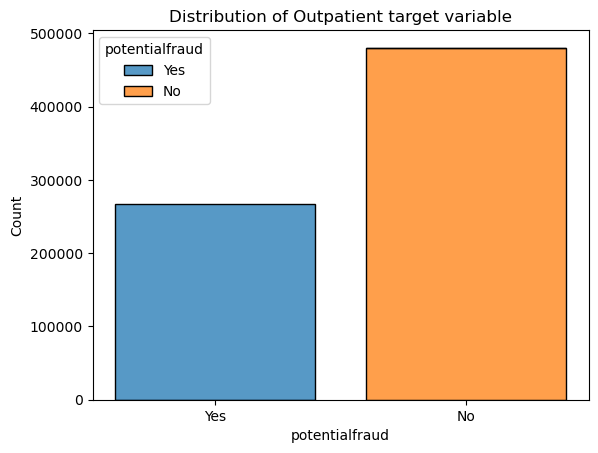

In [23]:
# Distribution of target variable
sns.histplot(data=outpatient_df, x='potentialfraud', hue='potentialfraud', multiple='stack', shrink=.8)
plt.title('Distribution of Outpatient target variable')
plt.show()

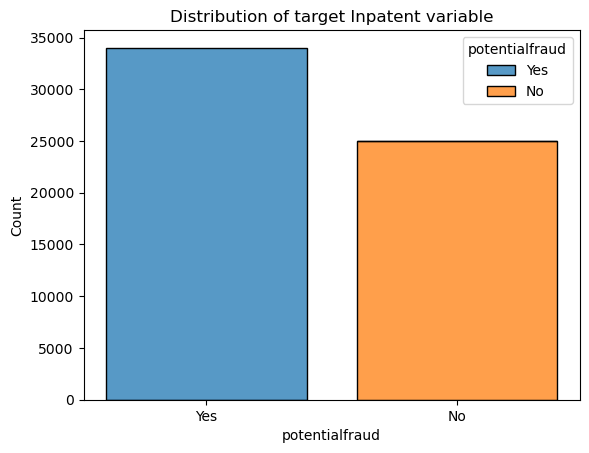

In [24]:
# Distribution of target variable
sns.histplot(data=inpatient_df, x='potentialfraud', hue='potentialfraud', multiple='stack', shrink=.8)
plt.title('Distribution of target Inpatent variable')
plt.show()

<div style="background-color: darkturquoise; padding: 20px; font-size: 20px; color: white;">
    Project Pipeline:-
    <div style="background-color: rgba(255, 0, 0, 0.5);">
        - Plan ---Acquire---Prepare--- <strong style="font-size: 18px; background-color: orange; font-weight: bold; color: white;"> EXPLORE</strong> --- Model --- Deliver
    </div>
</div>


## Split

- After understanding the data, perform the train-test split

In [25]:
def split_data(df: pd.DataFrame) -> pd.DataFrame:
    '''splits data into train test and validate dataframes'''
    train, test = train_test_split(df, test_size=.15, random_state=117, stratify=df.potentialfraud)
    train, validate = train_test_split(train, test_size=.15, random_state=117, stratify=train.potentialfraud)
    return train, validate, test

sep_line = '=' * 60 

In [26]:
train_out, validate_out, test_out = split_data(outpatient_df)
train_in, validate_in, test_in = split_data(inpatient_df)

In [27]:
# View the split 
print(f'Outpatient Train-> {train_out.shape}')
print(f'Outpatient Validate -> {validate_out.shape}')
print(f'Outpatient Test -> {test_out.shape}')
print(sep_line)
print(f'Inpatient Train -> {train_in.shape}')
print(f'Inpatient Validate -> {validate_in.shape}')
print(f'Inpatient Test -> {test_in.shape}')

Outpatient Train-> (540077, 56)
Outpatient Validate -> (95308, 56)
Outpatient Test -> (112127, 56)
Inpatient Train -> (42613, 64)
Inpatient Validate -> (7520, 64)
Inpatient Test -> (8848, 64)


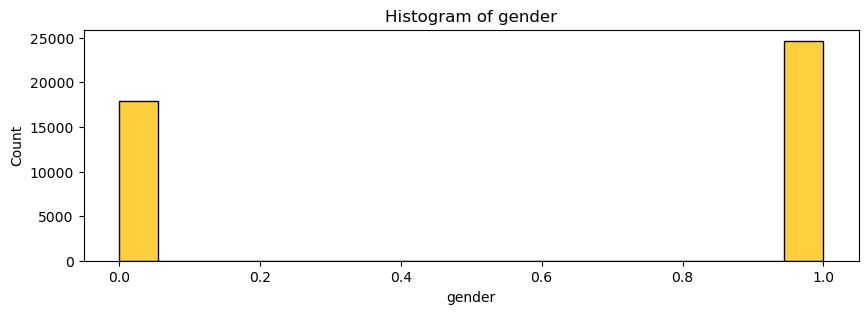

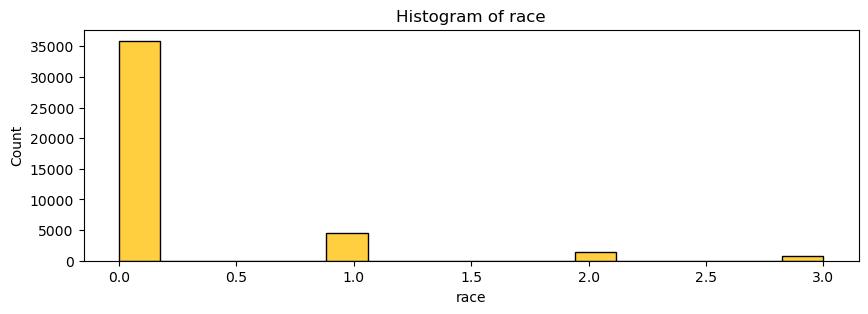

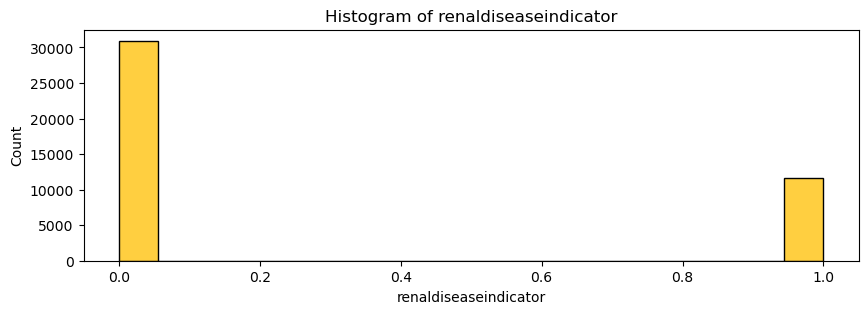

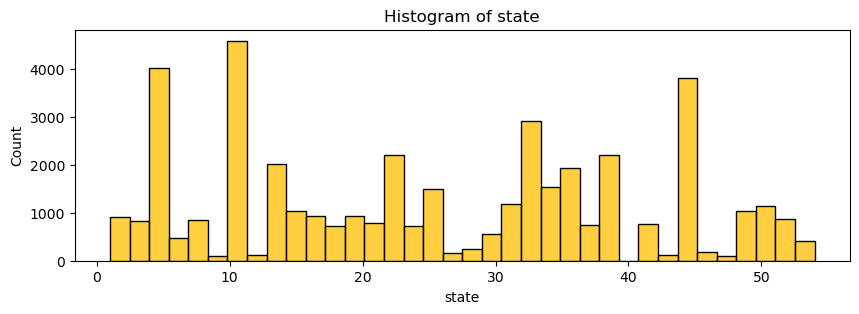

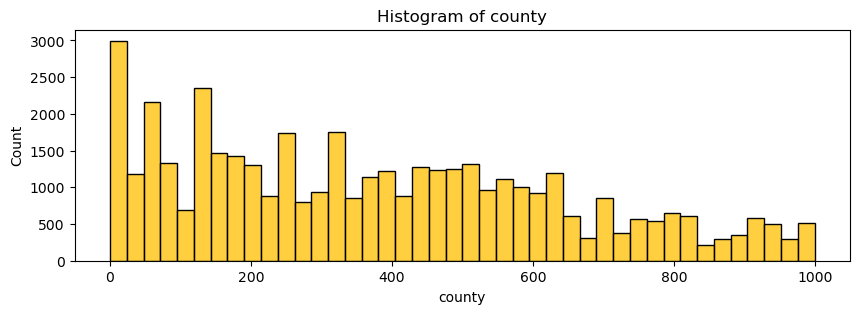

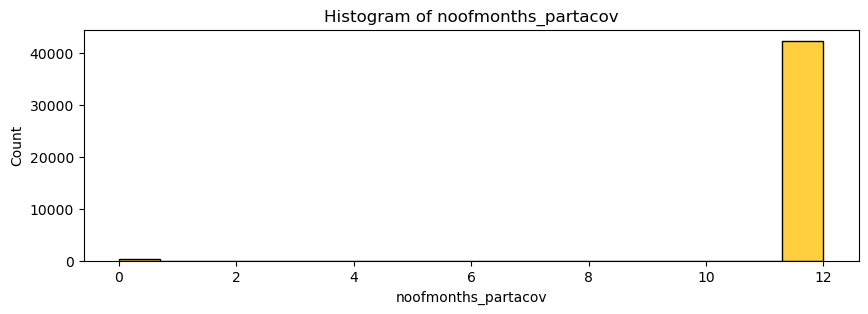

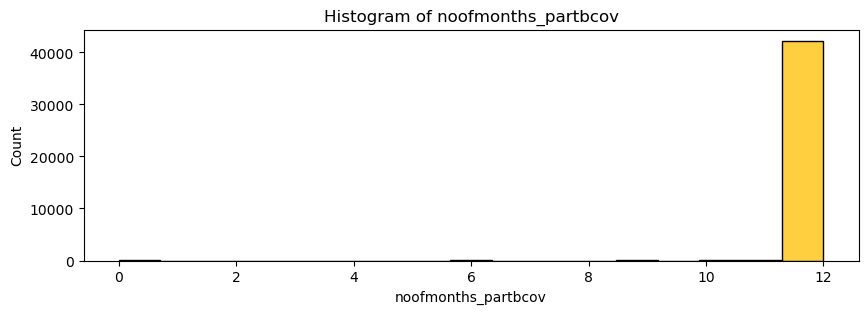

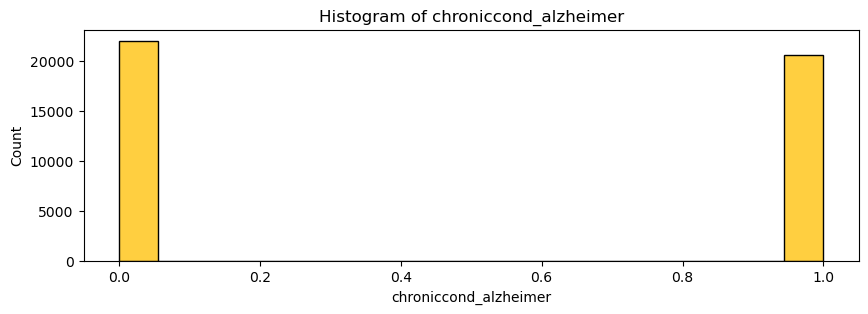

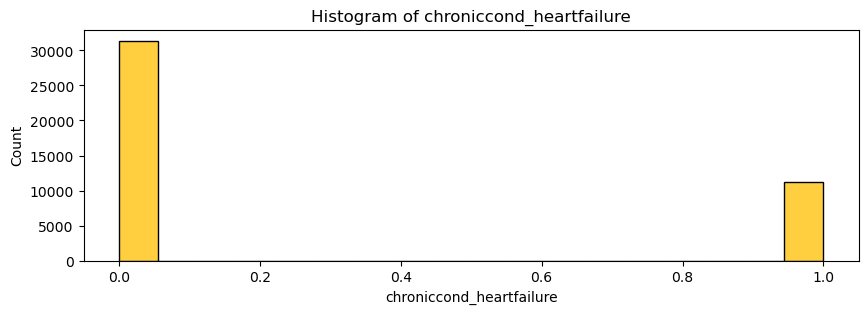

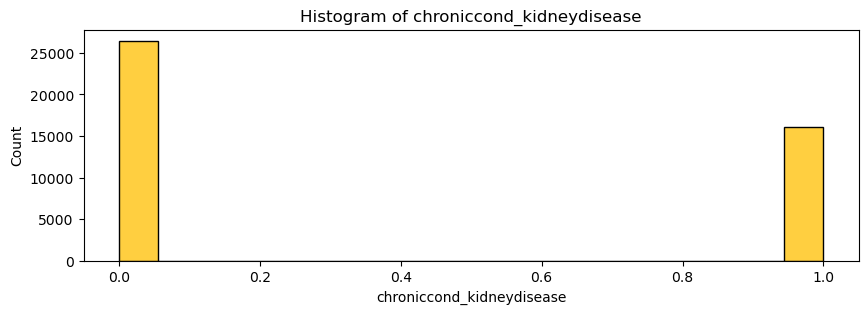

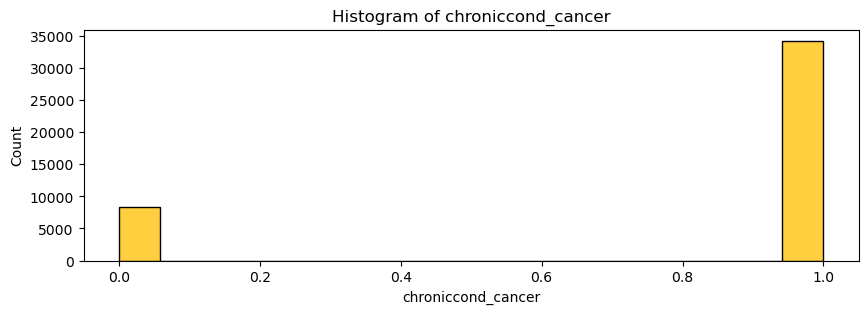

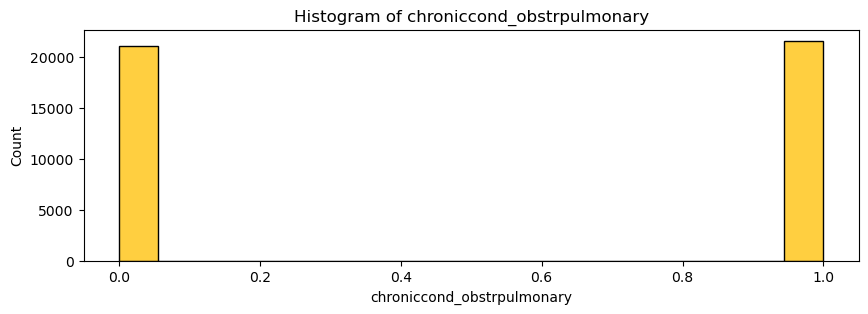

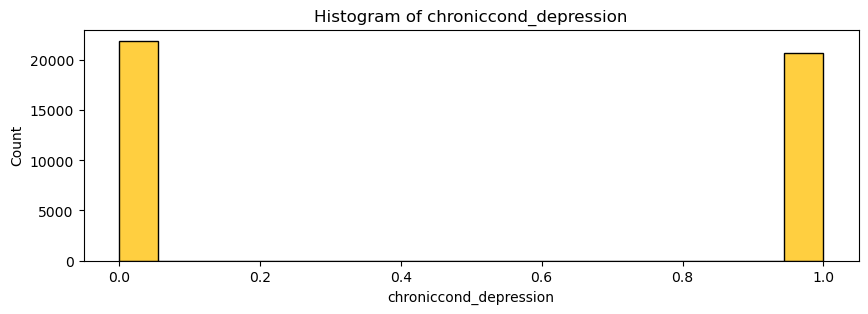

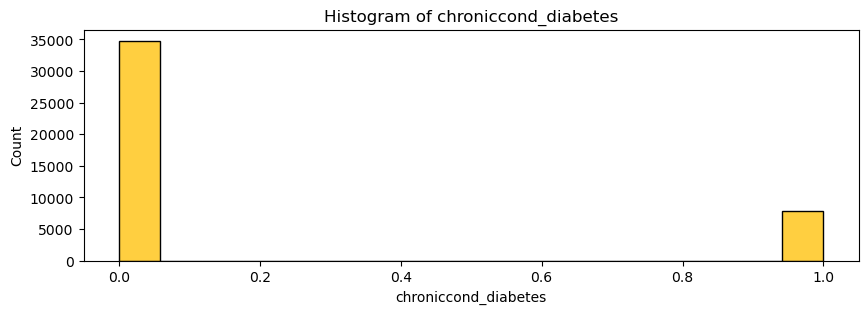

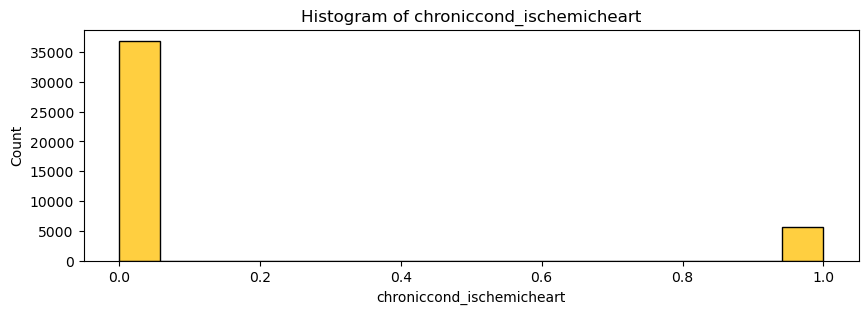

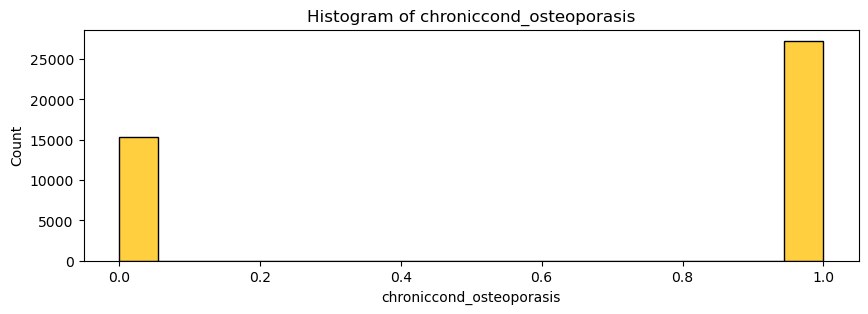

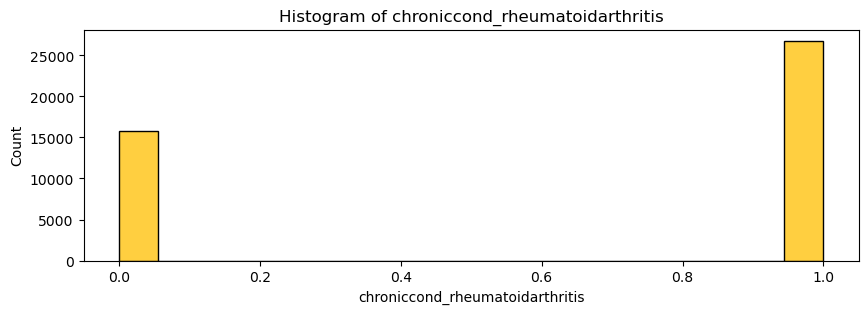

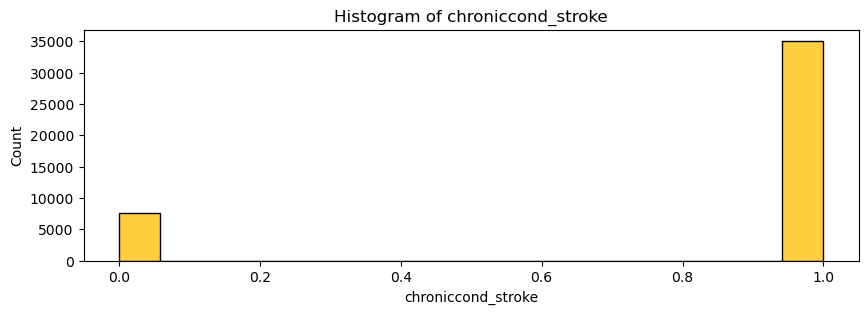

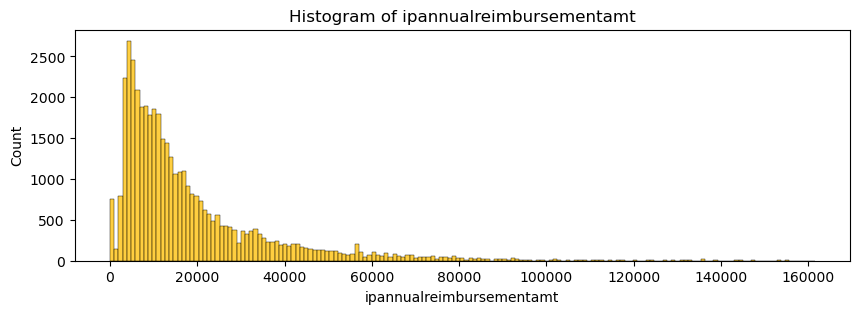

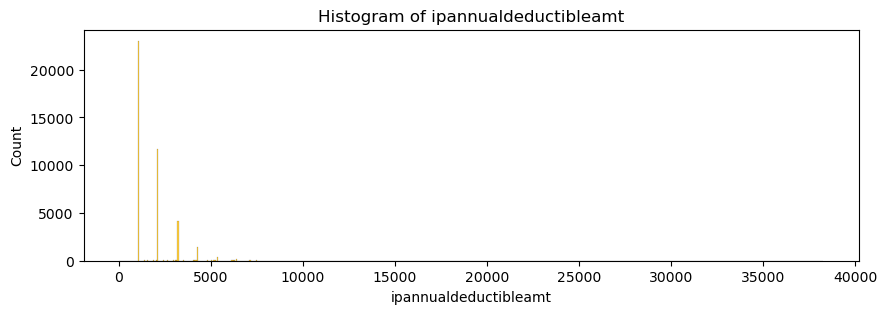

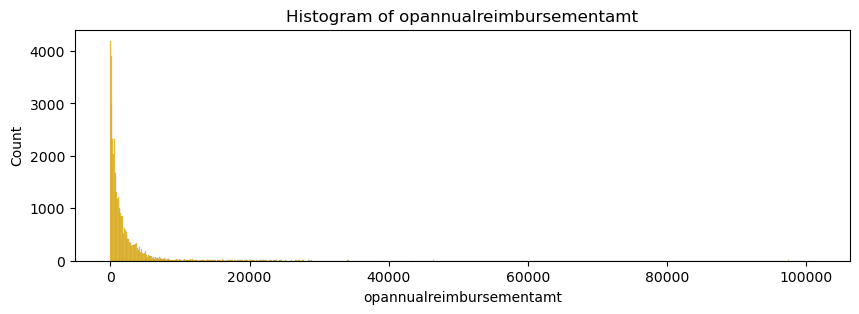

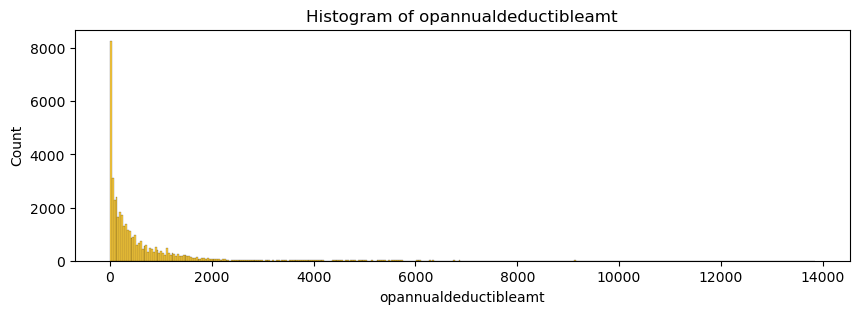

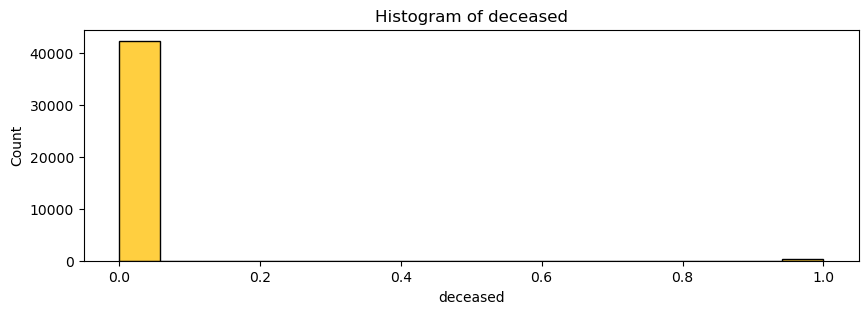

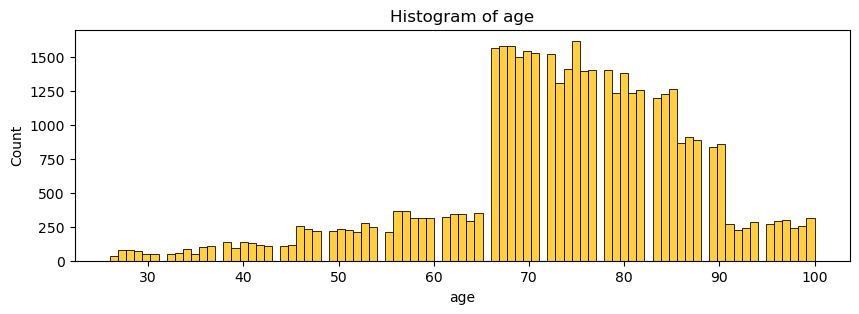

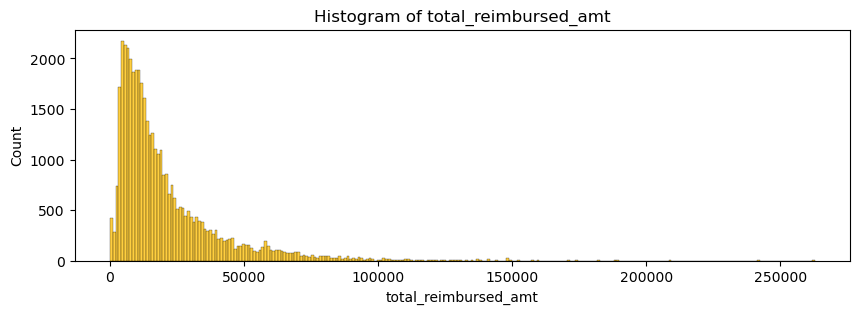

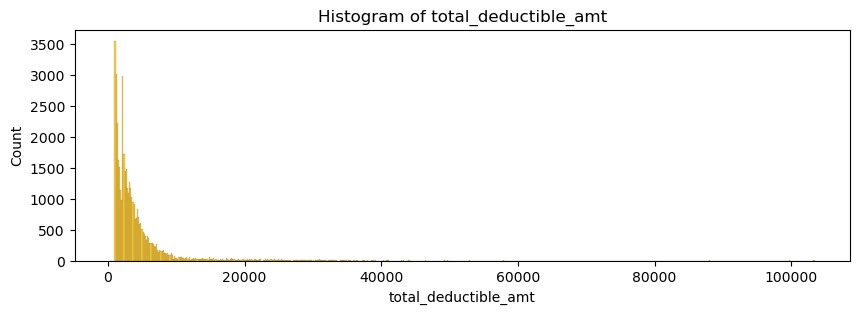

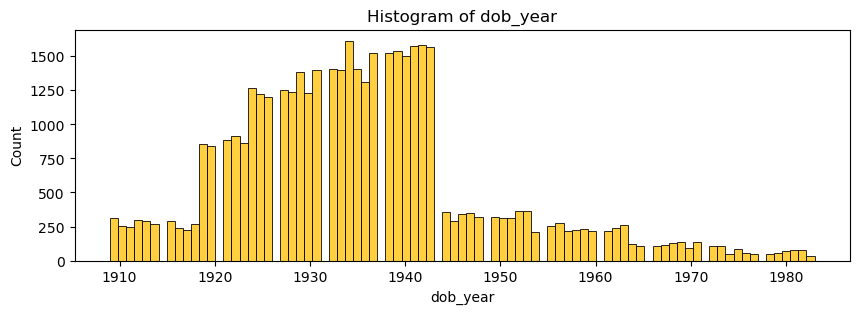

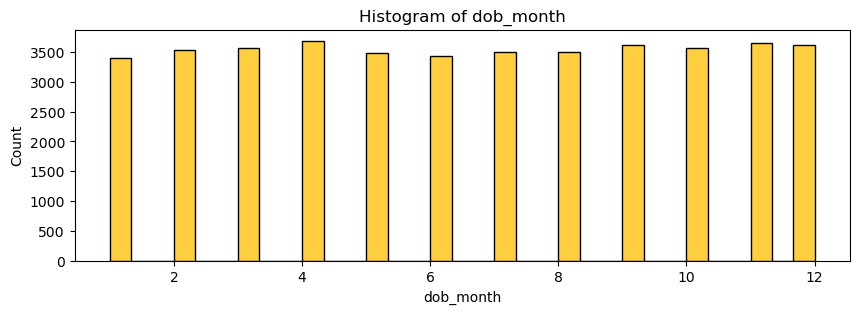

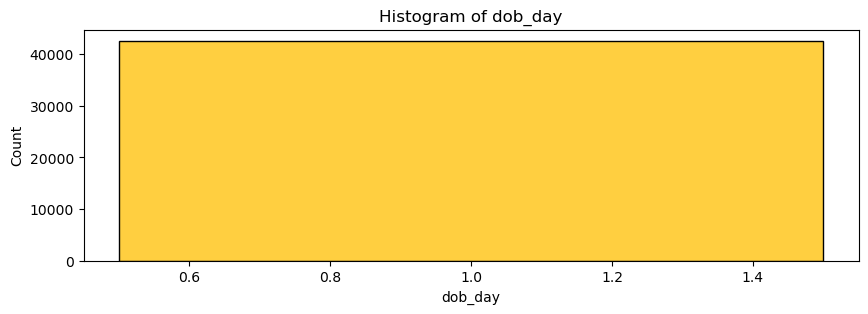

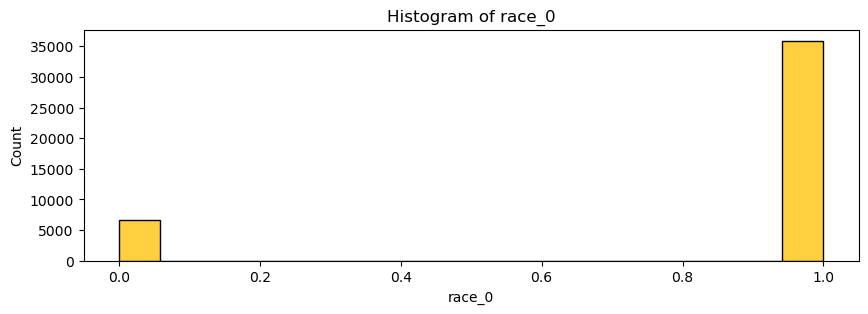

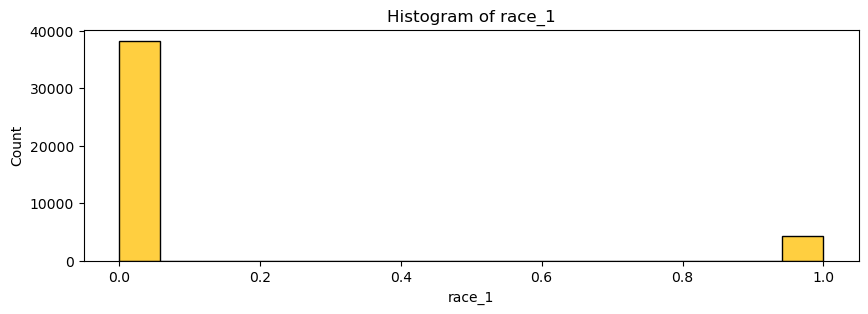

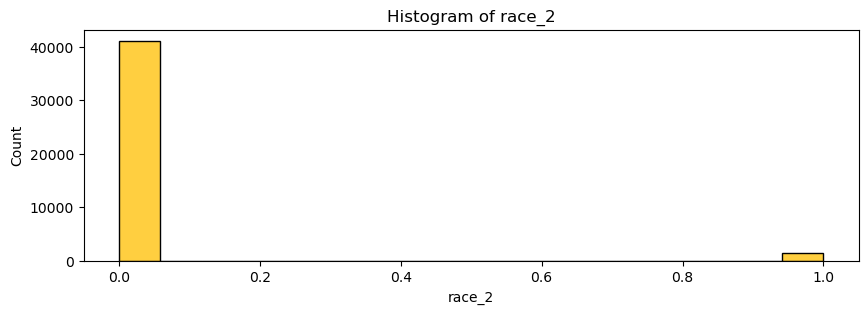

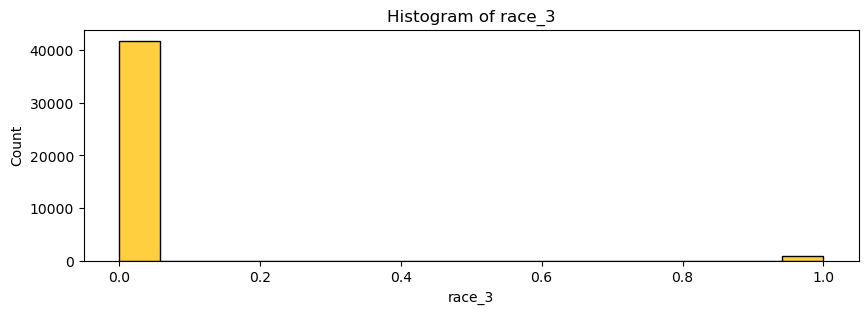

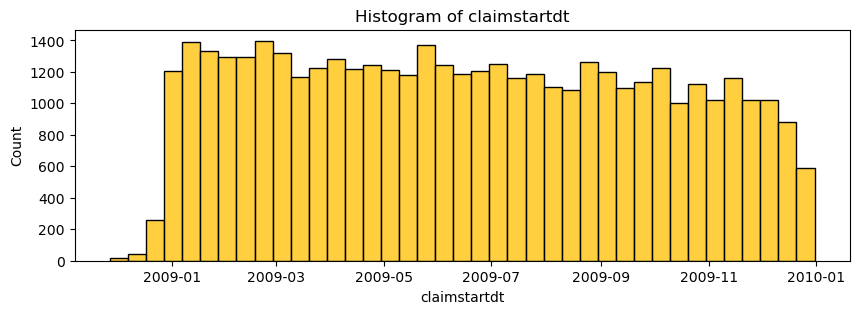

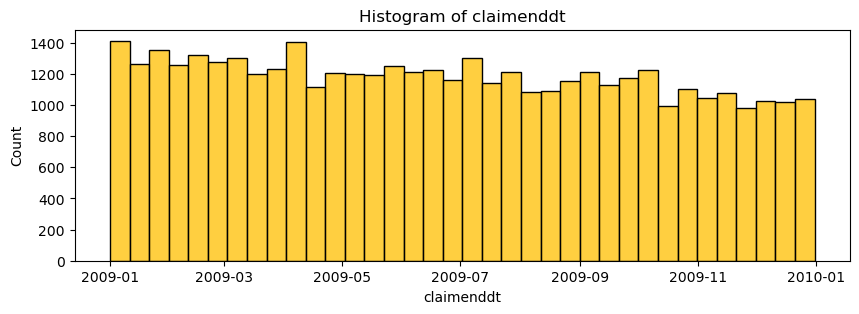

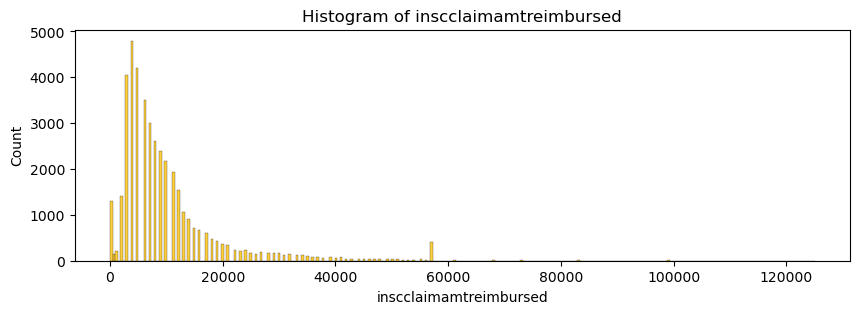

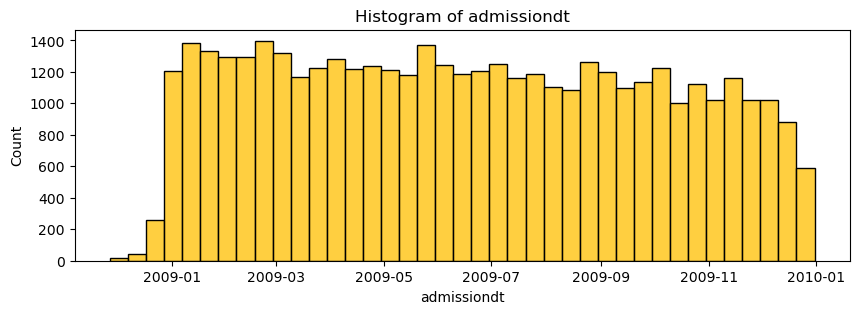

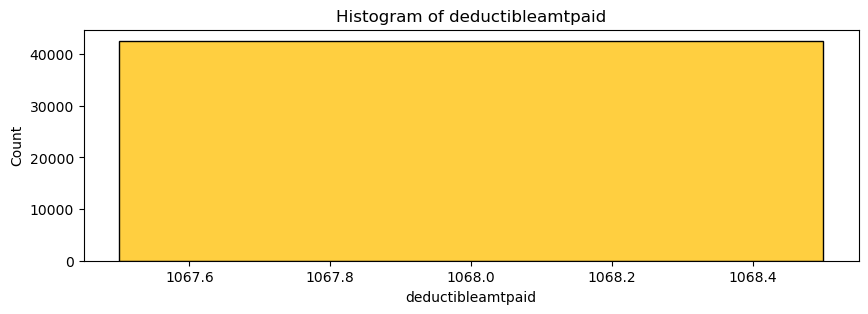

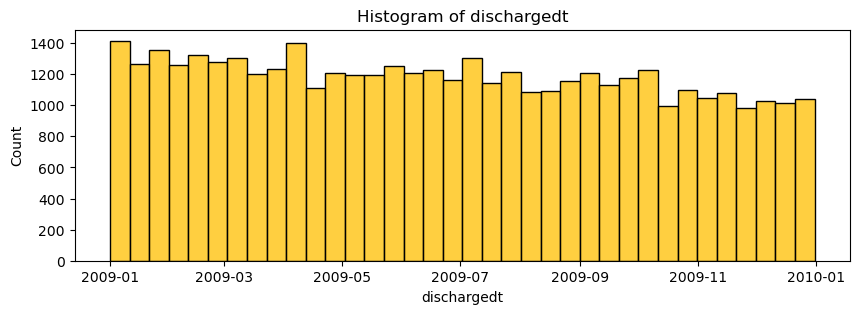

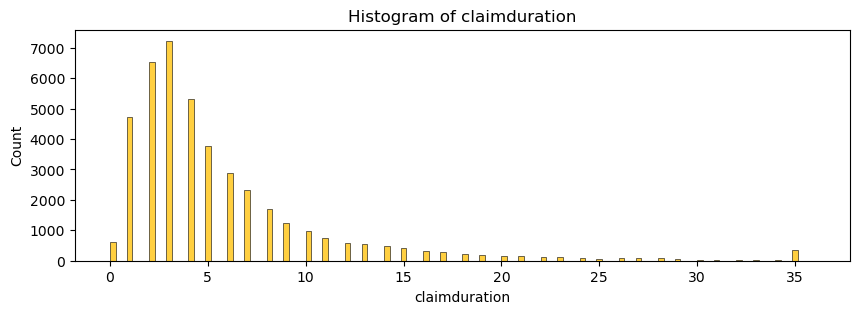

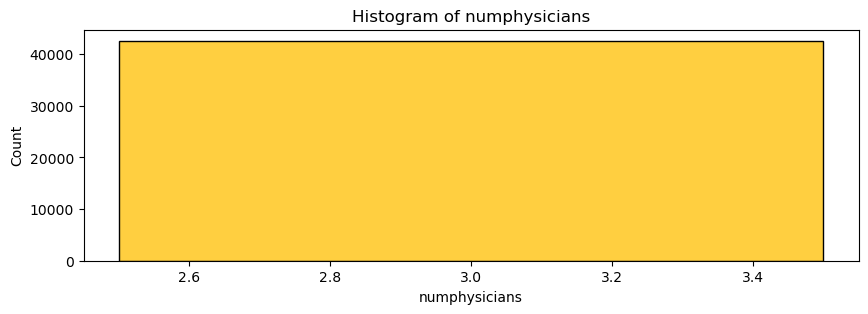

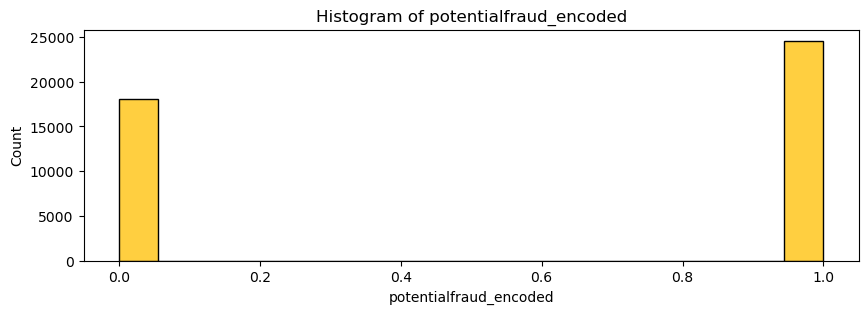

In [28]:
# Inpatient data histograms
w.display_numeric_column_histograms(train_in)

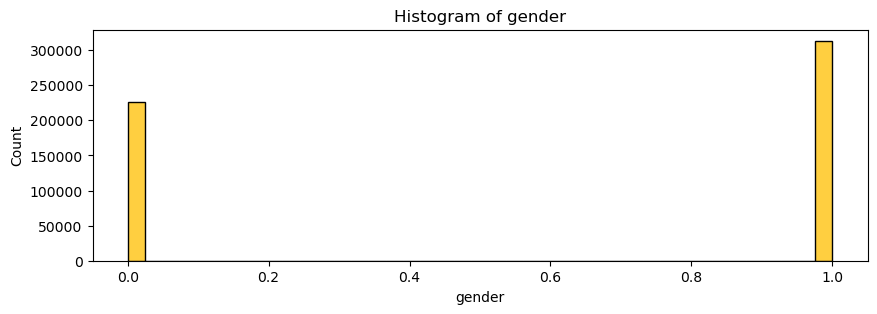

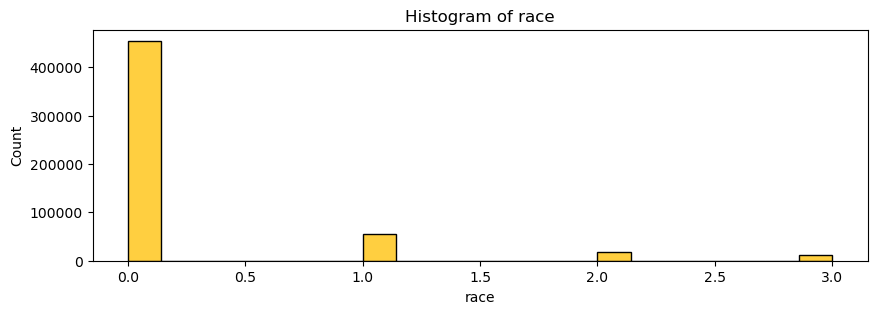

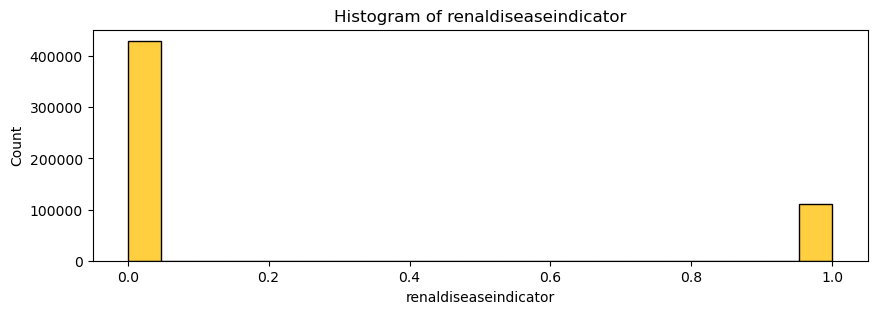

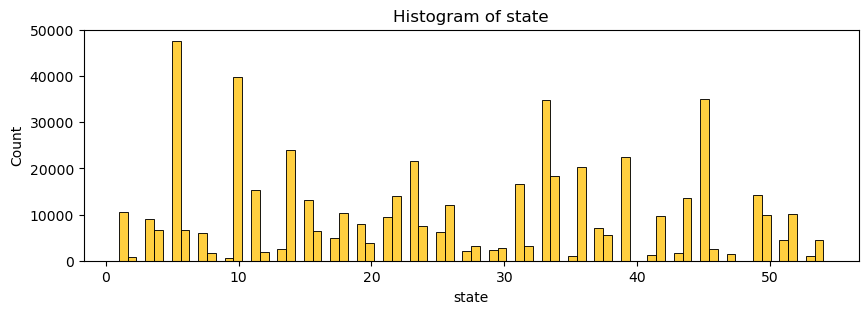

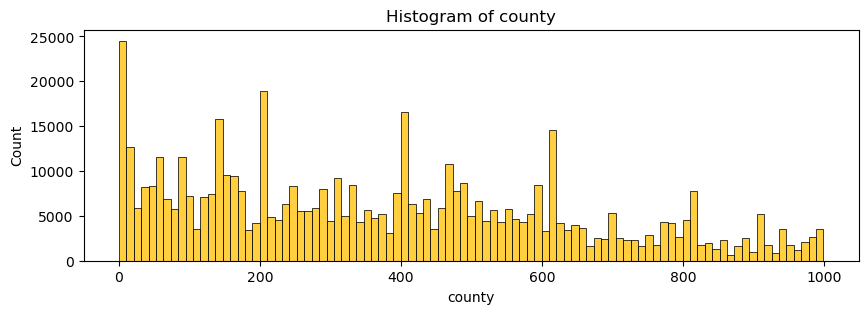

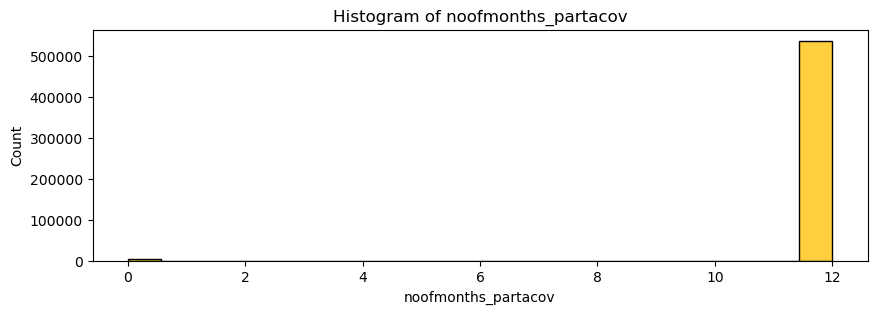

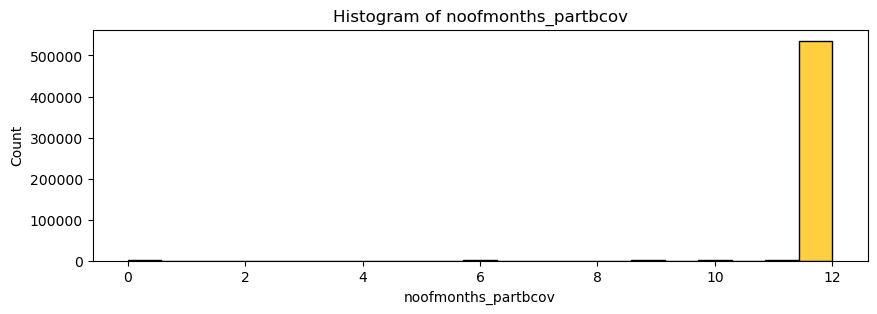

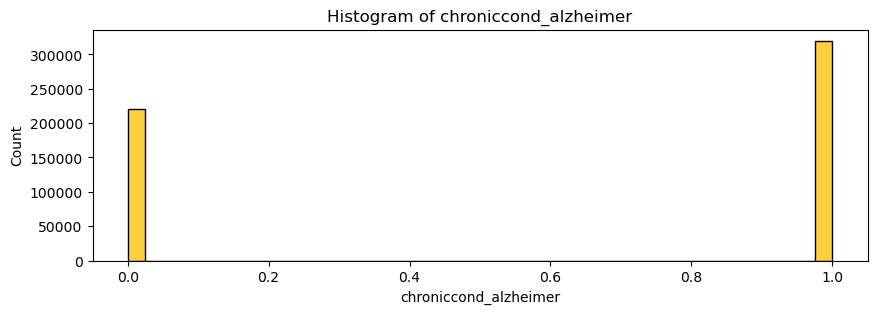

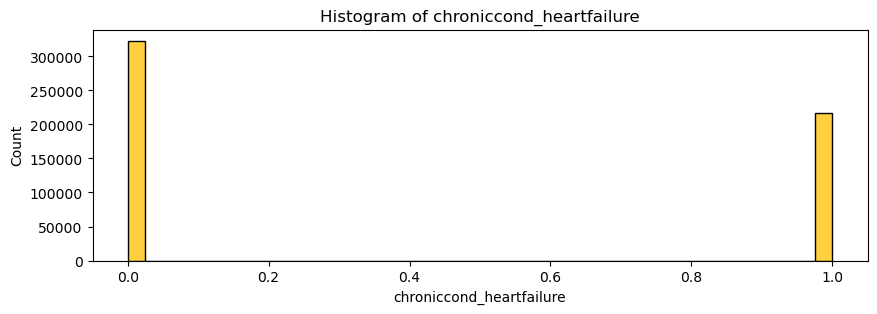

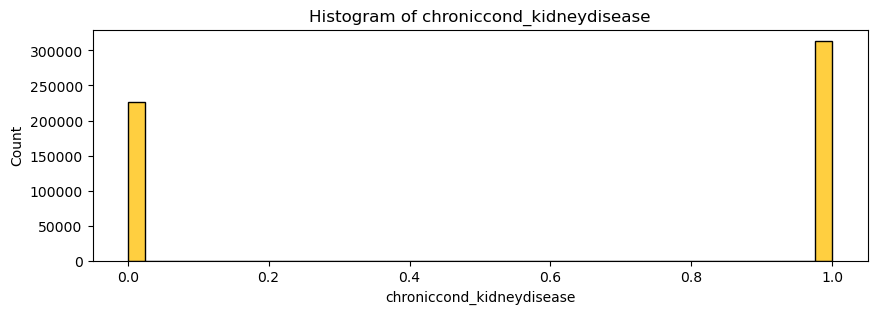

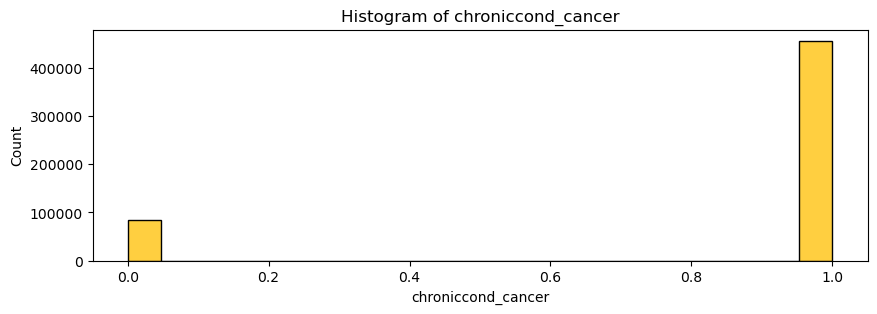

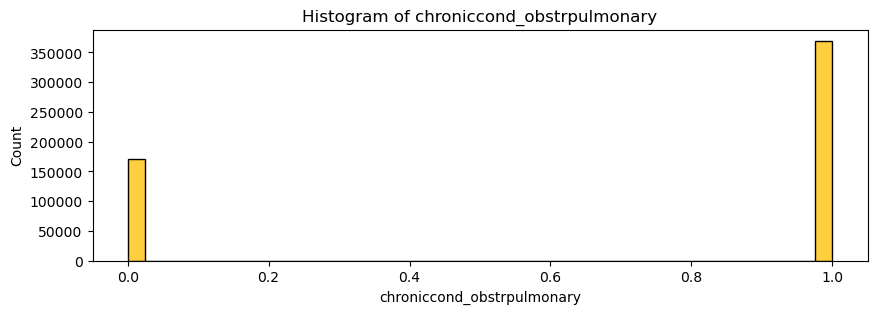

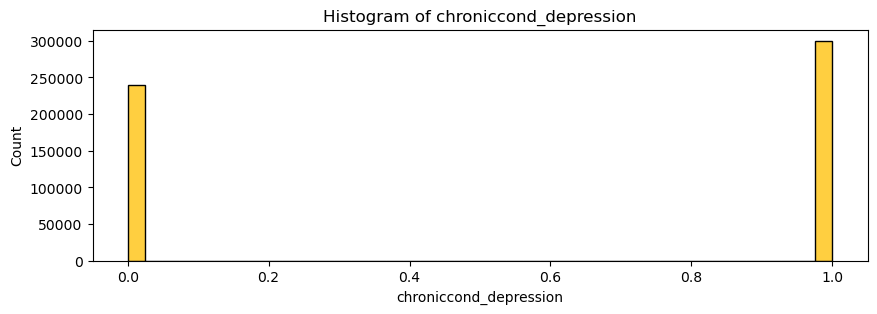

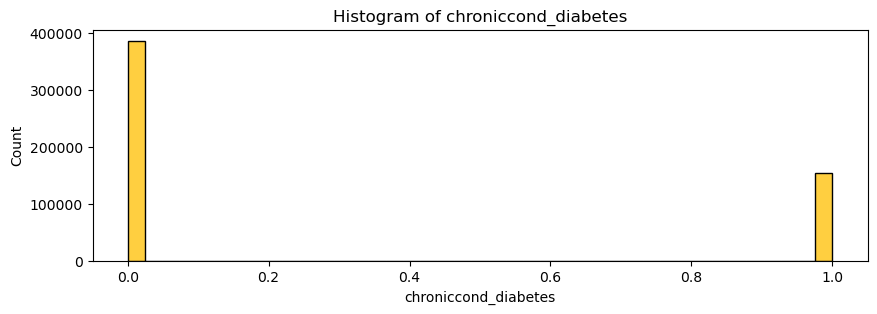

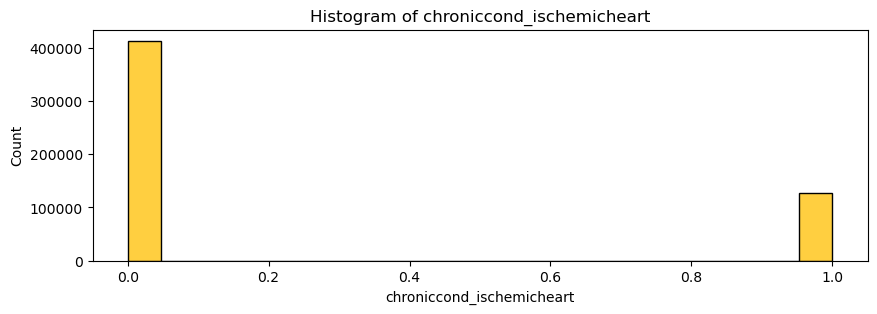

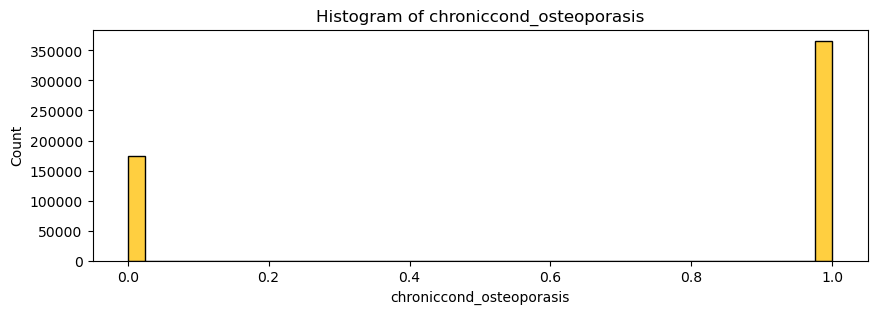

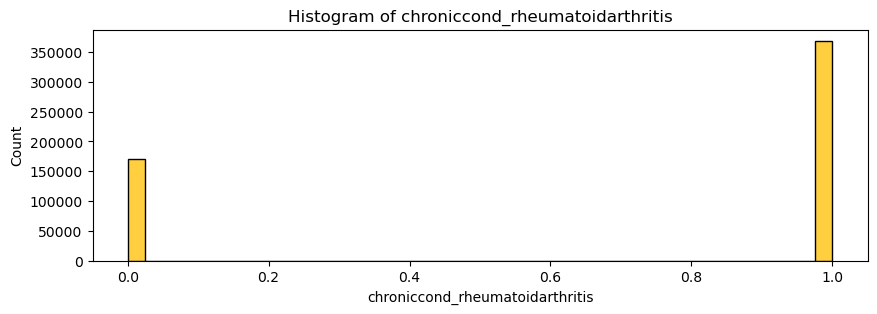

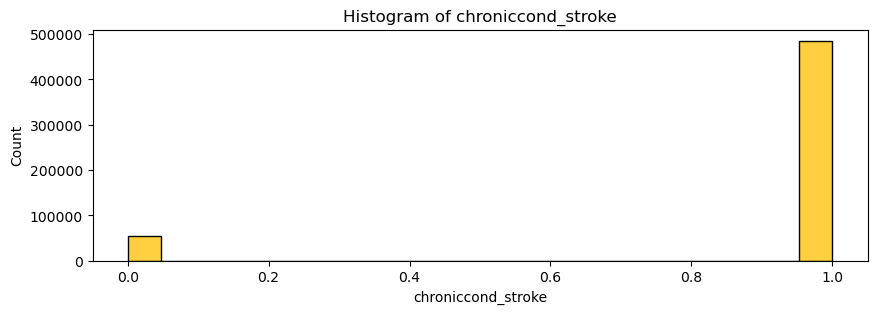

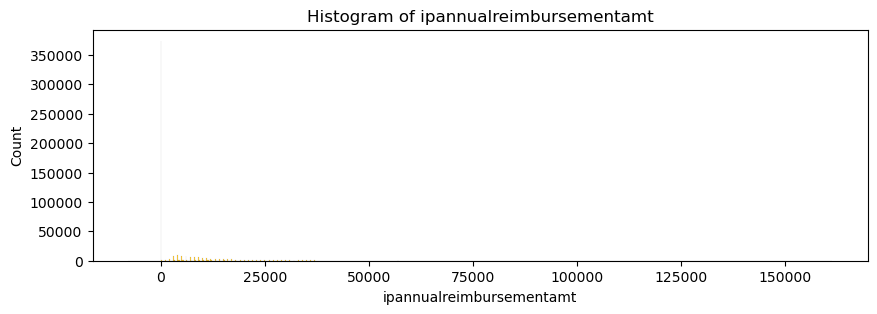

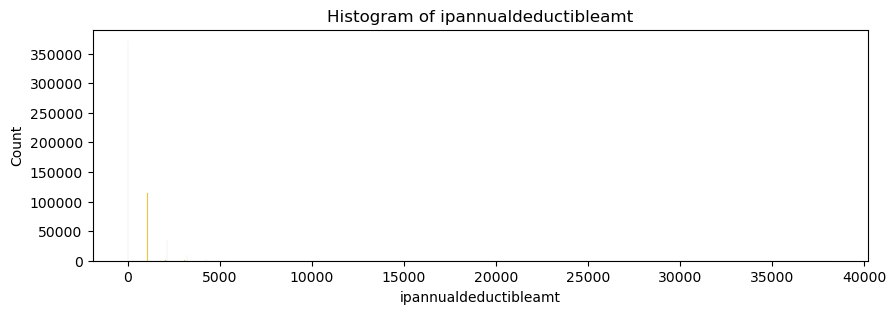

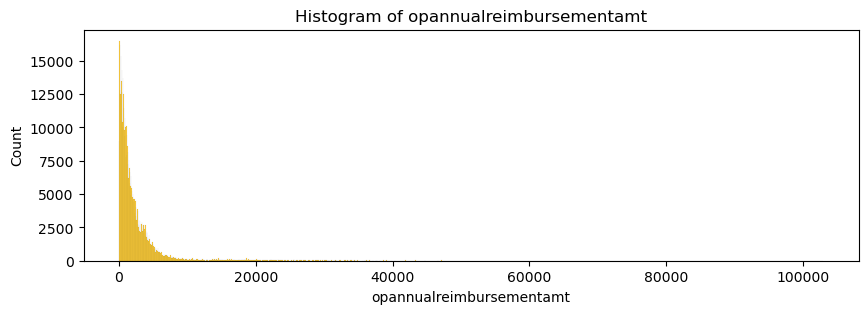

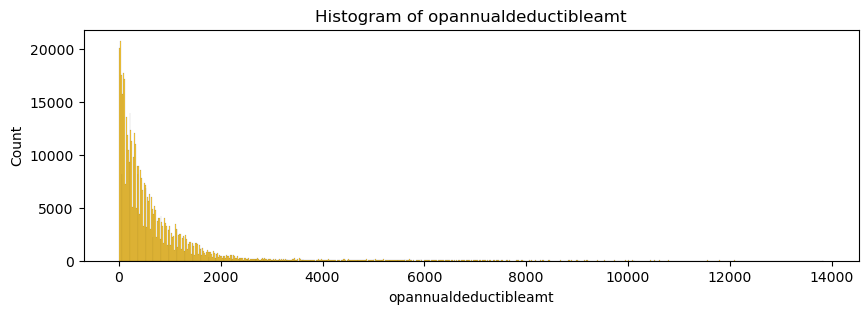

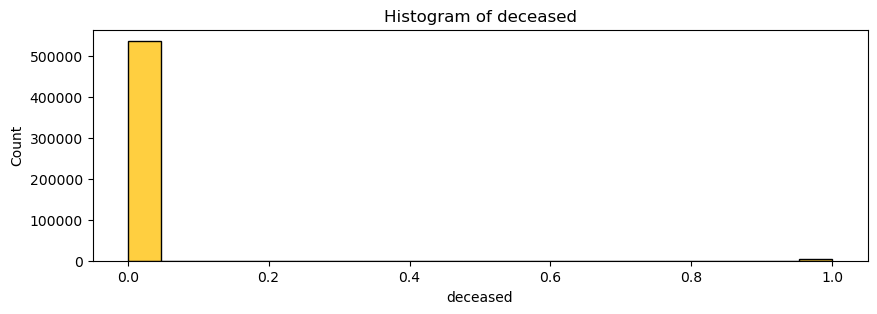

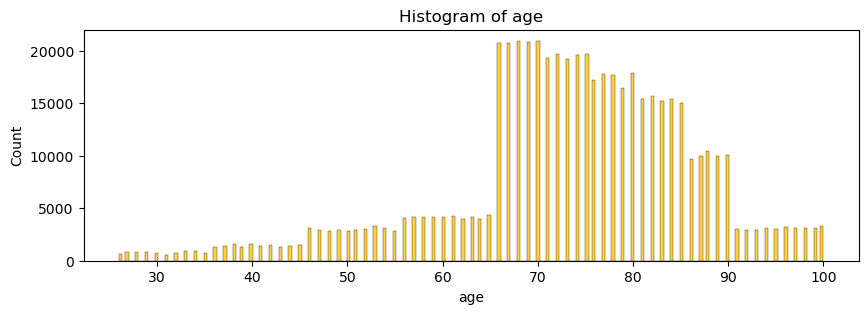

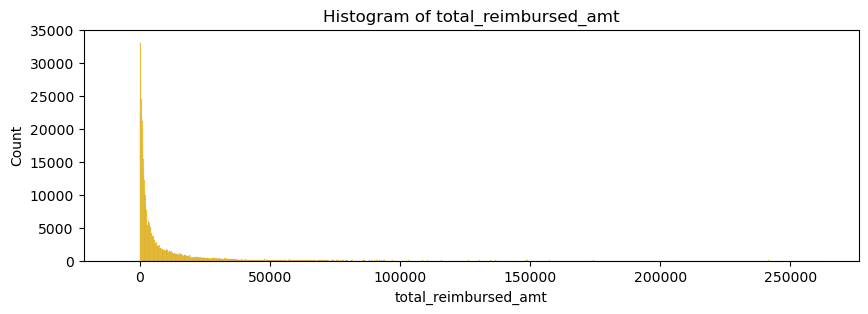

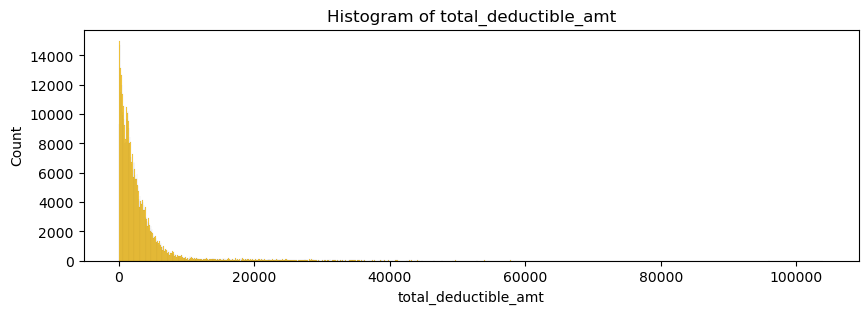

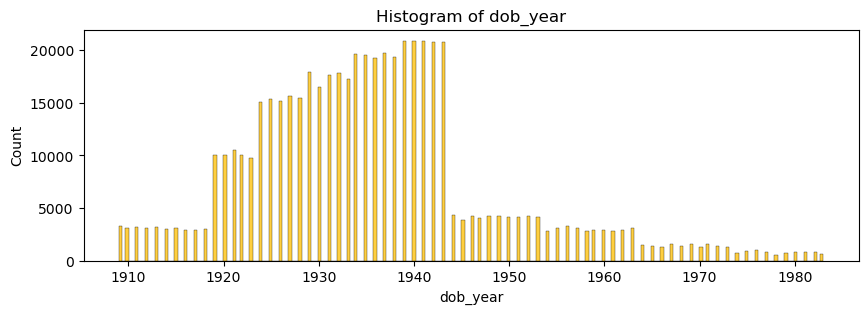

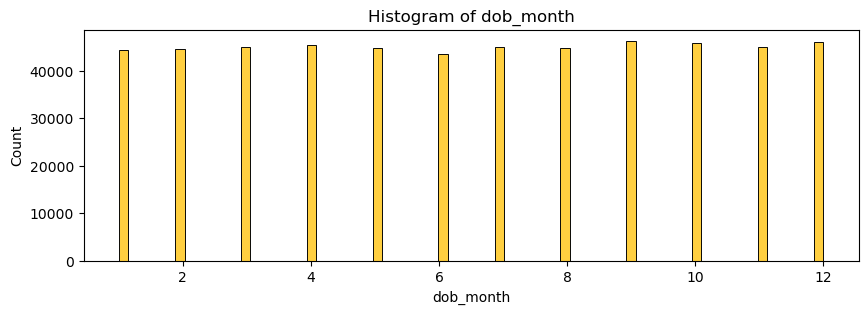

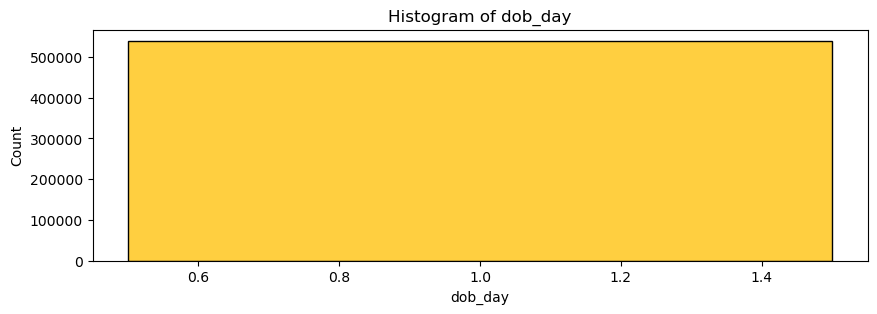

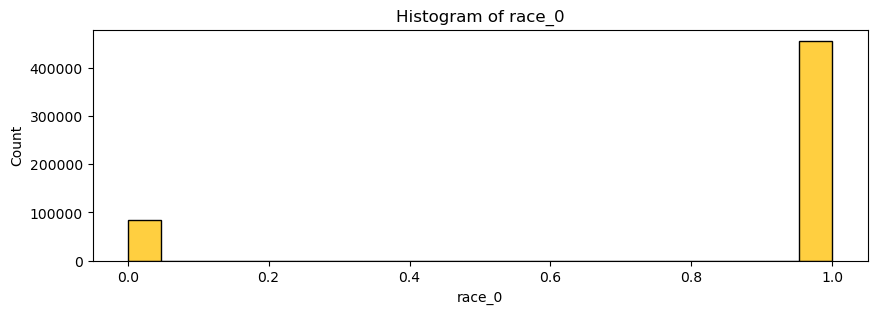

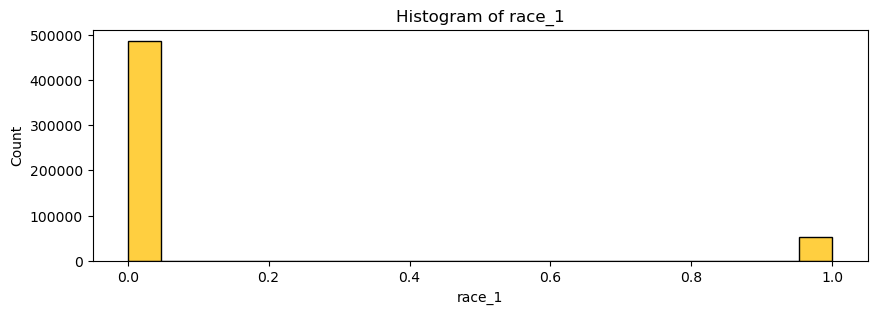

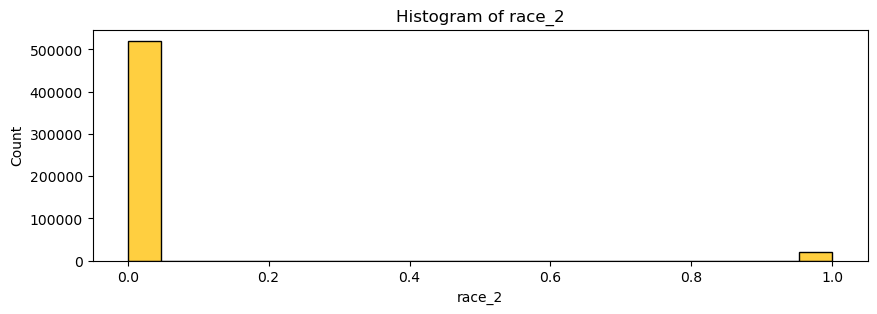

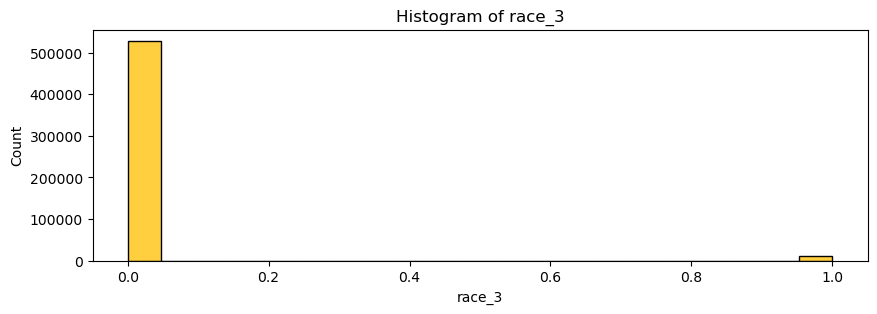

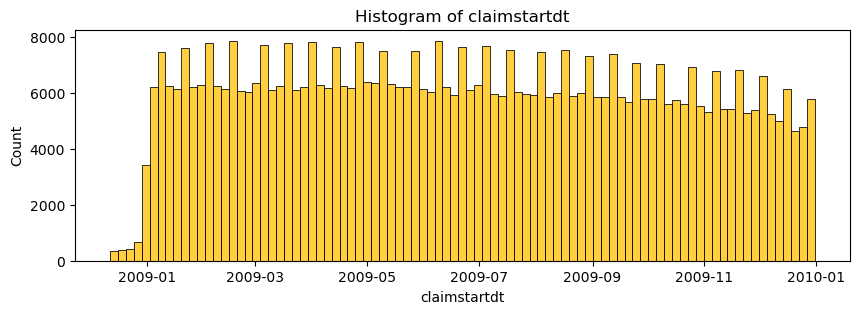

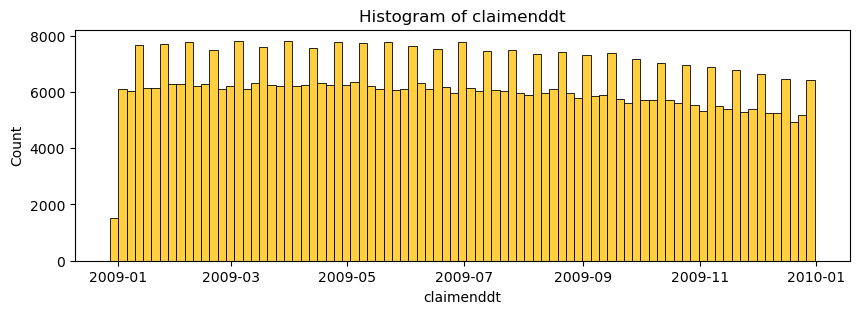

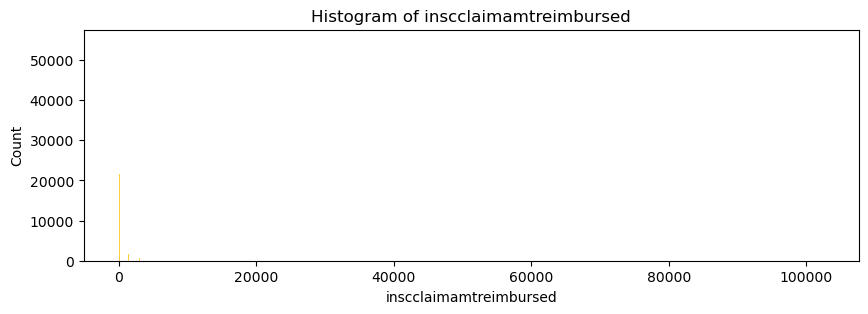

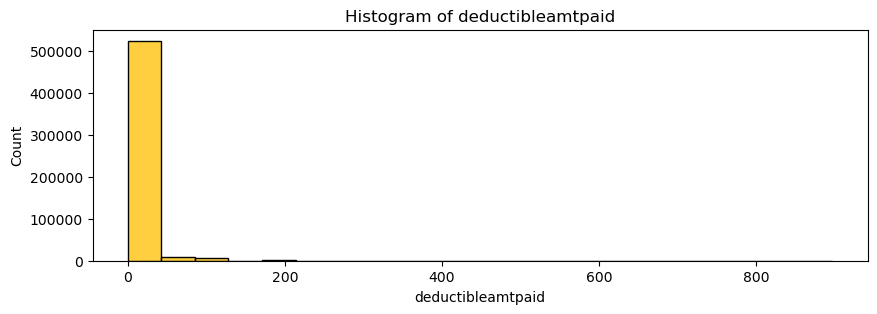

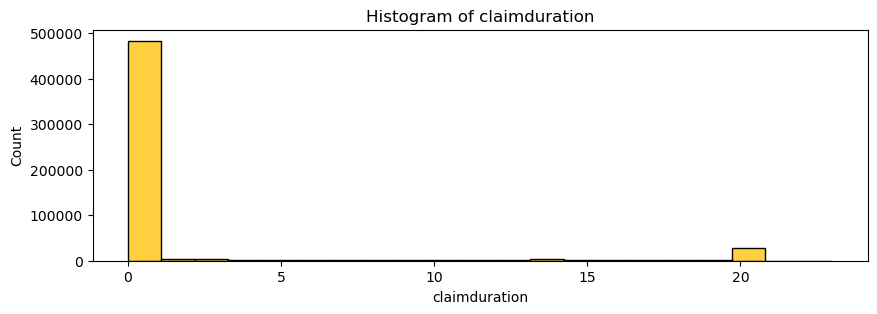

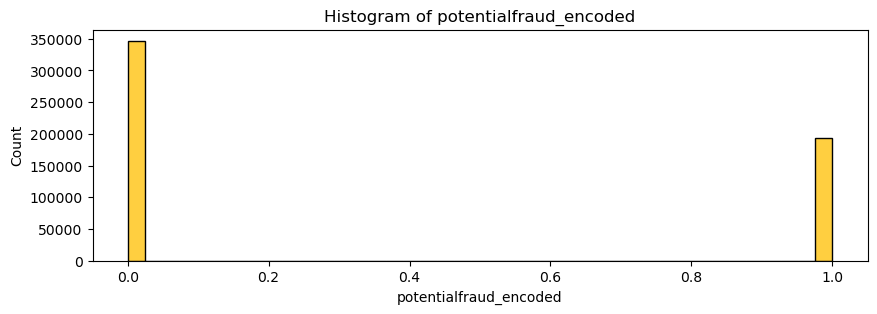

In [29]:
# Outpatient data histograms
w.display_numeric_column_histograms(train_out)

# Scale Data

- List of scalers for Outpatient Data

In [30]:
'''
scaler_out = MinMaxScaler()

cols_to_scale = ['claimduration', 'deductibleamtpaid', 'inscclaimamtreimbursed', 'total_deductible_amt', 'total_reimbursed_amt', 'age']

for col in cols_to_scale:
    train_out[col] = scaler_out.fit_transform(train_out[[col]])

scaler_out = StandardScaler()

cols_to_scale = ['claimduration', 'deductibleamtpaid', 'inscclaimamtreimbursed', 'total_deductible_amt', 'total_reimbursed_amt', 'age']

for col in cols_to_scale:
    train_out[col] = scaler_out.fit_transform(train_out[[col]])

scaler_out = QuantileTransformer()

cols_to_scale = ['claimduration', 'deductibleamtpaid', 'inscclaimamtreimbursed', 'total_deductible_amt', 'total_reimbursed_amt', 'age']

for col in cols_to_scale:
    train_out[col] = scaler_out.fit_transform(train_out[[col]])
'''


"\nscaler_out = MinMaxScaler()\n\ncols_to_scale = ['claimduration', 'deductibleamtpaid', 'inscclaimamtreimbursed', 'total_deductible_amt', 'total_reimbursed_amt', 'age']\n\nfor col in cols_to_scale:\n    train_out[col] = scaler_out.fit_transform(train_out[[col]])\n\nscaler_out = StandardScaler()\n\ncols_to_scale = ['claimduration', 'deductibleamtpaid', 'inscclaimamtreimbursed', 'total_deductible_amt', 'total_reimbursed_amt', 'age']\n\nfor col in cols_to_scale:\n    train_out[col] = scaler_out.fit_transform(train_out[[col]])\n\nscaler_out = QuantileTransformer()\n\ncols_to_scale = ['claimduration', 'deductibleamtpaid', 'inscclaimamtreimbursed', 'total_deductible_amt', 'total_reimbursed_amt', 'age']\n\nfor col in cols_to_scale:\n    train_out[col] = scaler_out.fit_transform(train_out[[col]])\n"

In [31]:
scaler_out = RobustScaler()

cols_to_scale = [
    "claimduration",
    "deductibleamtpaid",
    "inscclaimamtreimbursed",
    "total_deductible_amt",
    "total_reimbursed_amt"
]

for col in cols_to_scale:
    train_out[col] = scaler_out.fit_transform(train_out[[col]])

- list of scalers for inpatient data 

In [32]:
'''
scaler_in = MinMaxScaler()

cols_to_scale = ['claimduration', 'deductibleamtpaid', 'inscclaimamtreimbursed', 'total_deductible_amt', 'total_reimbursed_amt', 'age']

for col in cols_to_scale:
    train_in[col] = scaler_in.fit_transform(train_in[[col]])

scaler_in = StandardScaler()

cols_to_scale = ['claimduration', 'deductibleamtpaid', 'inscclaimamtreimbursed', 'total_deductible_amt', 'total_reimbursed_amt', 'age']

for col in cols_to_scale:
    train_in[col] = scaler_in.fit_transform(train_in[[col]])

scaler_in = QuantileTransformer()

cols_to_scale = ['claimduration', 'deductibleamtpaid', 'inscclaimamtreimbursed', 'total_deductible_amt', 'total_reimbursed_amt', 'age']

for col in cols_to_scale:
    train_in[col] = scaler_in.fit_transform(train_in[[col]])
'''

"\nscaler_in = MinMaxScaler()\n\ncols_to_scale = ['claimduration', 'deductibleamtpaid', 'inscclaimamtreimbursed', 'total_deductible_amt', 'total_reimbursed_amt', 'age']\n\nfor col in cols_to_scale:\n    train_in[col] = scaler_in.fit_transform(train_in[[col]])\n\nscaler_in = StandardScaler()\n\ncols_to_scale = ['claimduration', 'deductibleamtpaid', 'inscclaimamtreimbursed', 'total_deductible_amt', 'total_reimbursed_amt', 'age']\n\nfor col in cols_to_scale:\n    train_in[col] = scaler_in.fit_transform(train_in[[col]])\n\nscaler_in = QuantileTransformer()\n\ncols_to_scale = ['claimduration', 'deductibleamtpaid', 'inscclaimamtreimbursed', 'total_deductible_amt', 'total_reimbursed_amt', 'age']\n\nfor col in cols_to_scale:\n    train_in[col] = scaler_in.fit_transform(train_in[[col]])\n"

In [33]:
scaler_in = RobustScaler()

cols_to_scale =  [
    "total_reimbursed_amt",
    "total_deductible_amt",
    "inscclaimamtreimbursed",
    "claimduration"
]

for col in cols_to_scale:
    train_in[col] = scaler_in.fit_transform(train_in[[col]])

Percentage of Fraudulent Providers: 21.42%
Percentage of Non-Fraudulent Providers: 78.58%


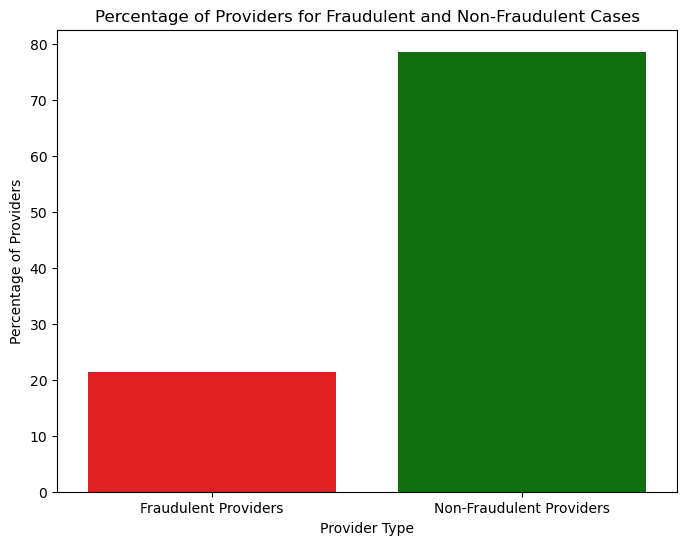

In [34]:
count_providers_fraud = train_in[train_in['potentialfraud'] == 'Yes']['provider'].nunique()
count_providers_not_fraud = train_in[train_in['potentialfraud'] == 'No']['provider'].nunique()
# Get the total number of unique providers
total_providers = train_in['provider'].nunique()
# Calculate the percentage of fraudulent providers
percentage_fraud = (count_providers_fraud / total_providers) * 100
# Calculate the percentage of non-fraudulent providers
percentage_not_fraud = (count_providers_not_fraud / total_providers) * 100
# Print the percentages
print(f"Percentage of Fraudulent Providers: {percentage_fraud:.2f}%")
print(f"Percentage of Non-Fraudulent Providers: {percentage_not_fraud:.2f}%")
# Create bar chart for percentages of providers that committed fraud and those that did not commit fraud
plt.figure(figsize=(8, 6))
sns.barplot(x=['Fraudulent Providers', 'Non-Fraudulent Providers'], y=[percentage_fraud, percentage_not_fraud], palette=['red', 'green'])
plt.xlabel('Provider Type')
plt.ylabel('Percentage of Providers')
plt.title('Percentage of Providers for Fraudulent and Non-Fraudulent Cases')
plt.show()







Percentage of Fraudulent Providers: 9.29%
Percentage of Non-Fraudulent Providers: 90.71%


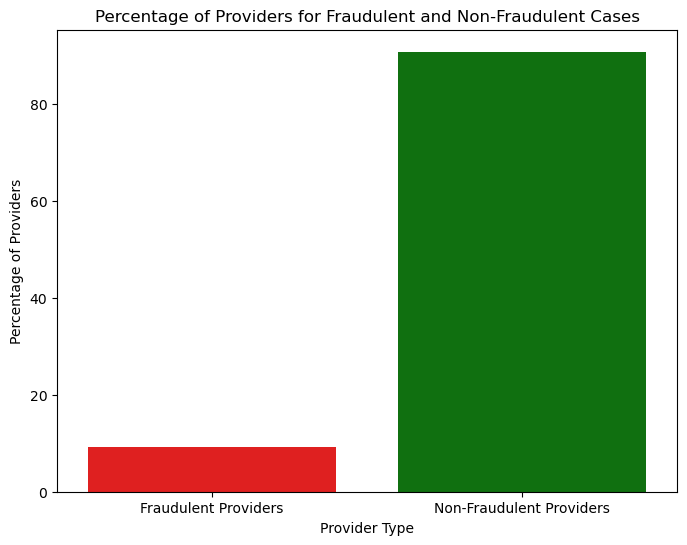

In [35]:
count_providers_fraud = train_out[train_out['potentialfraud'] == 'Yes']['provider'].nunique()
count_providers_not_fraud = train_out[train_out['potentialfraud'] == 'No']['provider'].nunique()
# Get the total number of unique providers
total_providers = train_out['provider'].nunique()
# Calculate the percentage of fraudulent providers
percentage_fraud = (count_providers_fraud / total_providers) * 100
# Calculate the percentage of non-fraudulent providers
percentage_not_fraud = (count_providers_not_fraud / total_providers) * 100
# Print the percentages
print(f"Percentage of Fraudulent Providers: {percentage_fraud:.2f}%")
print(f"Percentage of Non-Fraudulent Providers: {percentage_not_fraud:.2f}%")
# Create bar chart for percentages of providers that committed fraud and those that did not commit fraud
plt.figure(figsize=(8, 6))
sns.barplot(x=['Fraudulent Providers', 'Non-Fraudulent Providers'], y=[percentage_fraud, percentage_not_fraud], palette=['red', 'green'])
plt.xlabel('Provider Type')
plt.ylabel('Percentage of Providers')
plt.title('Percentage of Providers for Fraudulent and Non-Fraudulent Cases')
plt.show()

#### What Claim Diagnostic codes are accosiated with fraud? (Outpatient)

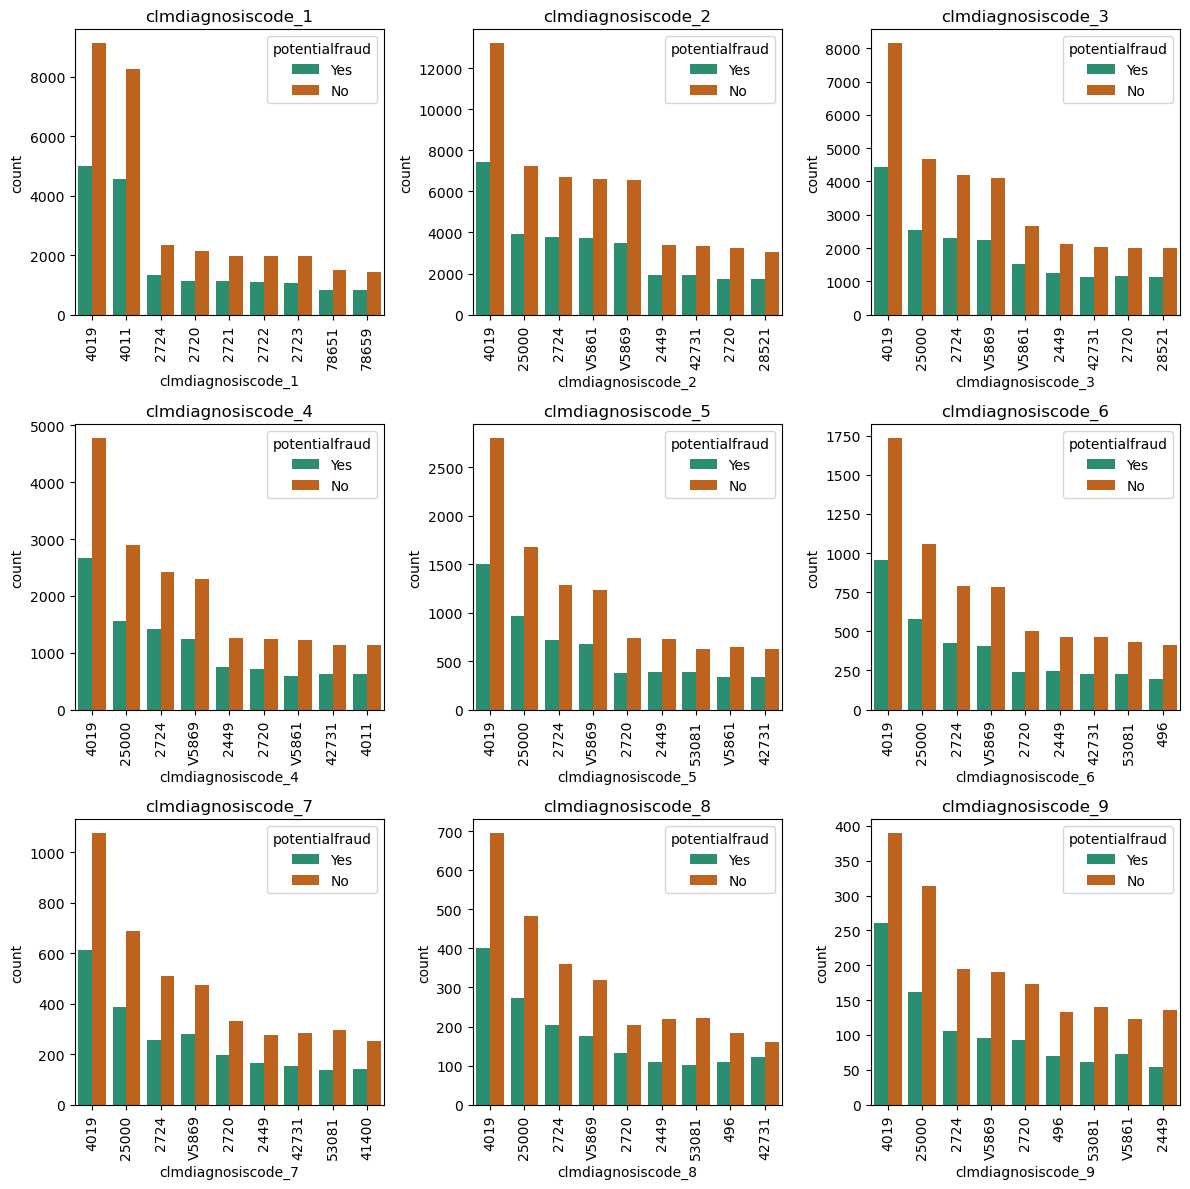

In [36]:
fig, axes = plt.subplots(3, 3, figsize=(12, 12))

for i, ax in enumerate(axes.flatten()):
    column_name = f'clmdiagnosiscode_{i+1}'
    code_counts = train_out[column_name].value_counts()[:10]
    
    # Exclude values equal to '00000'
    code_counts = code_counts[code_counts.index != '00000']
    
    sns.countplot(data=train_out, x=column_name, hue='potentialfraud', ax=ax, order=code_counts.index, palette='Dark2')
    ax.set_title(column_name)
    
    ax.set_xticklabels(ax.get_xticklabels(), rotation=90)

plt.tight_layout()
plt.show()

    - Takeaways 
- Claim Diagnostic code 4019 is the most common code. 

In [37]:
# Aggregate by fraud status 
fraud_count_cc1 = train_out.loc[train_out['potentialfraud']=='Yes', 'clmdiagnosiscode_1'].value_counts()
not_fraud_count_cc1 = train_out.loc[train_out['potentialfraud']=='No', 'clmdiagnosiscode_1'].value_counts()
fraud_count_cc2 = train_out.loc[train_out['potentialfraud']=='Yes', 'clmdiagnosiscode_2'].value_counts()
not_fraud_count_cc2 = train_out.loc[train_out['potentialfraud']=='No', 'clmdiagnosiscode_2'].value_counts()
fraud_count_cc3 = train_out.loc[train_out['potentialfraud']=='Yes', 'clmdiagnosiscode_3'].value_counts()
not_fraud_count_cc3 = train_out.loc[train_out['potentialfraud']=='No', 'clmdiagnosiscode_3'].value_counts()
fraud_count_cc4 = train_out.loc[train_out['potentialfraud']=='Yes', 'clmdiagnosiscode_4'].value_counts()
not_fraud_count_cc4 = train_out.loc[train_out['potentialfraud']=='No', 'clmdiagnosiscode_4'].value_counts()
fraud_count_cc5 = train_out.loc[train_out['potentialfraud']=='Yes', 'clmdiagnosiscode_5'].value_counts()
not_fraud_count_cc5 = train_out.loc[train_out['potentialfraud']=='No', 'clmdiagnosiscode_5'].value_counts()
fraud_count_cc6 = train_out.loc[train_out['potentialfraud']=='Yes', 'clmdiagnosiscode_6'].value_counts()
not_fraud_count_cc6 = train_out.loc[train_out['potentialfraud']=='No', 'clmdiagnosiscode_6'].value_counts()
fraud_count_cc7 = train_out.loc[train_out['potentialfraud']=='Yes', 'clmdiagnosiscode_7'].value_counts()
not_fraud_count_cc7 = train_out.loc[train_out['potentialfraud']=='No', 'clmdiagnosiscode_7'].value_counts()
fraud_count_cc8 = train_out.loc[train_out['potentialfraud']=='Yes', 'clmdiagnosiscode_8'].value_counts()
not_fraud_count_cc8 = train_out.loc[train_out['potentialfraud']=='No', 'clmdiagnosiscode_8'].value_counts()
fraud_count_cc9 = train_out.loc[train_out['potentialfraud']=='Yes', 'clmdiagnosiscode_9'].value_counts()
not_fraud_count_cc9 = train_out.loc[train_out['potentialfraud']=='No', 'clmdiagnosiscode_9'].value_counts()



In [38]:
print(f'Length of CC_1 fraud {len(fraud_count_cc1)}')
print(f'Length of CC_1 Not fraud {len(not_fraud_count_cc1)}')
print(sep_line)
print(f'Length of CC_2 fraud {len(fraud_count_cc2)}')
print(f'Length of CC_2 Not fraud {len(not_fraud_count_cc2)}')
print(sep_line)
print(f'Length of CC_3 fraud {len(fraud_count_cc3)}')
print(f'Length of CC_3 Not fraud {len(not_fraud_count_cc3)}')
print(sep_line)
print(f'Length of CC_4 fraud {len(fraud_count_cc4)}')
print(f'Length of CC_4 Not fraud {len(not_fraud_count_cc4)}')
print(sep_line)
print(f'Length of CC_5 fraud {len(fraud_count_cc5)}')
print(f'Length of CC_5 Not fraud {len(not_fraud_count_cc5)}')
print(sep_line)
print(f'Length of CC_6 fraud {len(fraud_count_cc6)}')
print(f'Length of CC_6 Not fraud {len(not_fraud_count_cc6)}')
print(sep_line)
print(f'Length of CC_7 fraud {len(fraud_count_cc7)}')
print(f'Length of CC_7 Not fraud {len(not_fraud_count_cc7)}')
print(sep_line)
print(f'Length of CC_8 fraud {len(fraud_count_cc8)}')
print(f'Length of CC_8 Not fraud {len(not_fraud_count_cc8)}')
print(sep_line)
print(f'Length of CC_9 fraud {len(fraud_count_cc9)}')
print(f'Length of CC_9 Not fraud {len(not_fraud_count_cc9)}')

Length of CC_1 fraud 8574
Length of CC_1 Not fraud 9534
Length of CC_2 fraud 3614
Length of CC_2 Not fraud 4277
Length of CC_3 fraud 3065
Length of CC_3 Not fraud 3703
Length of CC_4 fraud 2649
Length of CC_4 Not fraud 3190
Length of CC_5 fraud 2207
Length of CC_5 Not fraud 2733
Length of CC_6 fraud 1854
Length of CC_6 Not fraud 2332
Length of CC_7 fraud 1627
Length of CC_7 Not fraud 2026
Length of CC_8 fraud 1347
Length of CC_8 Not fraud 1752
Length of CC_9 fraud 1108
Length of CC_9 Not fraud 1416


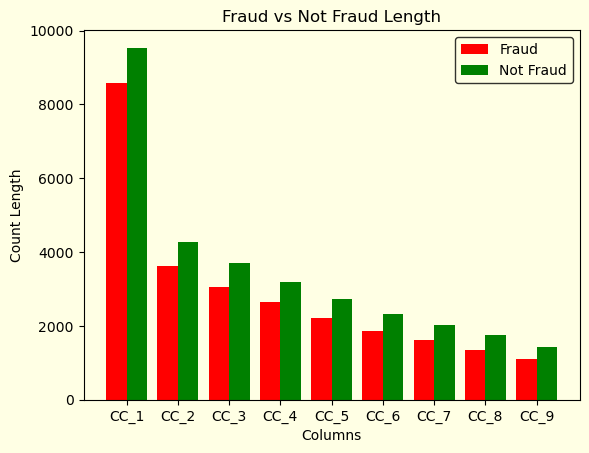

In [39]:
fraud_lengths = [8574, 3614, 3065, 2649, 2207, 1854, 1627, 1347, 1108]
not_fraud_lengths = [9534, 4277, 3703, 3190, 2733, 2332, 2026, 1752, 1416]

X = ['CC_1', 'CC_2', 'CC_3', 'CC_4', 'CC_5', 'CC_6', 'CC_7', 'CC_8', 'CC_9']

X_axis = np.arange(len(X))
plt.figure(facecolor='#ffffe4')

plt.bar(X_axis - 0.2, fraud_lengths, 0.4, label='Fraud', color='r')
plt.bar(X_axis + 0.2, not_fraud_lengths, 0.4, label='Not Fraud', color='g')

plt.xticks(X_axis, X)  # Set the x-axis labels to the values in the X list

# Set legend facecolor and text color
legend = plt.legend()
legend.get_frame().set_facecolor('#ffffe4')
legend.get_frame().set_edgecolor('Black')
for text in legend.get_texts():
    text.set_color('Black')

plt.xlabel('Columns')
plt.ylabel('Count Length')
plt.title('Fraud vs Not Fraud Length')

# Set plot background color and text color
plt.gca().set_facecolor('#ffffe4')
plt.gca().spines['bottom'].set_color('black')
plt.gca().spines['top'].set_color('black')
plt.gca().spines['right'].set_color('black')
plt.gca().spines['left'].set_color('black')
plt.gca().tick_params(axis='x', colors='black')
plt.gca().tick_params(axis='y', colors='black')
plt.gca().title.set_color('black')
plt.gca().xaxis.label.set_color('black')
plt.gca().yaxis.label.set_color('black')

plt.show()

In [40]:
train_in.columns

Index(['beneid', 'gender', 'race', 'renaldiseaseindicator', 'state', 'county',
       'noofmonths_partacov', 'noofmonths_partbcov', 'chroniccond_alzheimer',
       'chroniccond_heartfailure', 'chroniccond_kidneydisease',
       'chroniccond_cancer', 'chroniccond_obstrpulmonary',
       'chroniccond_depression', 'chroniccond_diabetes',
       'chroniccond_ischemicheart', 'chroniccond_osteoporasis',
       'chroniccond_rheumatoidarthritis', 'chroniccond_stroke',
       'ipannualreimbursementamt', 'ipannualdeductibleamt',
       'opannualreimbursementamt', 'opannualdeductibleamt', 'deceased', 'age',
       'total_reimbursed_amt', 'total_deductible_amt', 'dob_year', 'dob_month',
       'dob_day', 'race_0', 'race_1', 'race_2', 'race_3', 'claimid',
       'claimstartdt', 'claimenddt', 'provider', 'inscclaimamtreimbursed',
       'attendingphysician', 'operatingphysician', 'otherphysician',
       'admissiondt', 'clmadmitdiagnosiscode', 'deductibleamtpaid',
       'dischargedt', 'diagnosisgro

In [41]:
# Aggregate by fraud status 
fraud_count_cc1 = train_in.loc[train_in['potentialfraud']=='Yes', 'clmdiagnosiscode_1'].value_counts()
not_fraud_count_cc1 = train_in.loc[train_in['potentialfraud']=='No', 'clmdiagnosiscode_1'].value_counts()
fraud_count_cc2 = train_in.loc[train_in['potentialfraud']=='Yes', 'clmdiagnosiscode_2'].value_counts()
not_fraud_count_cc2 = train_in.loc[train_in['potentialfraud']=='No', 'clmdiagnosiscode_2'].value_counts()
fraud_count_cc3 = train_in.loc[train_in['potentialfraud']=='Yes', 'clmdiagnosiscode_3'].value_counts()
not_fraud_count_cc3 = train_in.loc[train_in['potentialfraud']=='No', 'clmdiagnosiscode_3'].value_counts()
fraud_count_cc4 = train_in.loc[train_in['potentialfraud']=='Yes', 'clmdiagnosiscode_4'].value_counts()
not_fraud_count_cc4 = train_in.loc[train_in['potentialfraud']=='No', 'clmdiagnosiscode_4'].value_counts()
fraud_count_cc5 = train_in.loc[train_in['potentialfraud']=='Yes', 'clmdiagnosiscode_5'].value_counts()
not_fraud_count_cc5 = train_in.loc[train_in['potentialfraud']=='No', 'clmdiagnosiscode_5'].value_counts()
fraud_count_cc6 = train_in.loc[train_in['potentialfraud']=='Yes', 'clmdiagnosiscode_6'].value_counts()
not_fraud_count_cc6 = train_in.loc[train_in['potentialfraud']=='No', 'clmdiagnosiscode_6'].value_counts()
fraud_count_cc7 = train_in.loc[train_in['potentialfraud']=='Yes', 'clmdiagnosiscode_7'].value_counts()
not_fraud_count_cc7 = train_in.loc[train_in['potentialfraud']=='No', 'clmdiagnosiscode_7'].value_counts()
fraud_count_cc8 = train_in.loc[train_in['potentialfraud']=='Yes', 'clmdiagnosiscode_8'].value_counts()
not_fraud_count_cc8 = train_in.loc[train_in['potentialfraud']=='No', 'clmdiagnosiscode_8'].value_counts()
fraud_count_cc9 = train_in.loc[train_in['potentialfraud']=='Yes', 'clmdiagnosiscode_9'].value_counts()
not_fraud_count_cc9 = train_in.loc[train_in['potentialfraud']=='No', 'clmdiagnosiscode_9'].value_counts()
fraud_count_cc10 = train_in.loc[train_in['potentialfraud']=='Yes', 'clmdiagnosiscode_10'].value_counts()
not_fraud_count_cc10 = train_in.loc[train_in['potentialfraud']=='No', 'clmdiagnosiscode_10'].value_counts()

In [42]:
print(f'Length of CC_1 fraud {len(fraud_count_cc1)}')
print(f'Length of CC_1 Not fraud {len(not_fraud_count_cc1)}')
print(sep_line)
print(f'Length of CC_2 fraud {len(fraud_count_cc2)}')
print(f'Length of CC_2 Not fraud {len(not_fraud_count_cc2)}')
print(sep_line)
print(f'Length of CC_3 fraud {len(fraud_count_cc3)}')
print(f'Length of CC_3 Not fraud {len(not_fraud_count_cc3)}')
print(sep_line)
print(f'Length of CC_4 fraud {len(fraud_count_cc4)}')
print(f'Length of CC_4 Not fraud {len(not_fraud_count_cc4)}')
print(sep_line)
print(f'Length of CC_5 fraud {len(fraud_count_cc5)}')
print(f'Length of CC_5 Not fraud {len(not_fraud_count_cc5)}')
print(sep_line)
print(f'Length of CC_6 fraud {len(fraud_count_cc6)}')
print(f'Length of CC_6 Not fraud {len(not_fraud_count_cc6)}')
print(sep_line)
print(f'Length of CC_7 fraud {len(fraud_count_cc7)}')
print(f'Length of CC_7 Not fraud {len(not_fraud_count_cc7)}')
print(sep_line)
print(f'Length of CC_8 fraud {len(fraud_count_cc8)}')
print(f'Length of CC_8 Not fraud {len(not_fraud_count_cc8)}')
print(sep_line)
print(f'Length of CC_9 fraud {len(fraud_count_cc9)}')
print(f'Length of CC_9 Not fraud {len(not_fraud_count_cc9)}')
print(sep_line)
print(f'Length of CC_10 fraud {len(fraud_count_cc10)}')
print(f'Length of CC_10 Not fraud {len(not_fraud_count_cc10)}')

Length of CC_1 fraud 1723
Length of CC_1 Not fraud 1512
Length of CC_2 fraud 1819
Length of CC_2 Not fraud 1612
Length of CC_3 fraud 1814
Length of CC_3 Not fraud 1583
Length of CC_4 fraud 1824
Length of CC_4 Not fraud 1579
Length of CC_5 fraud 1759
Length of CC_5 Not fraud 1568
Length of CC_6 fraud 1776
Length of CC_6 Not fraud 1490
Length of CC_7 fraud 1751
Length of CC_7 Not fraud 1514
Length of CC_8 fraud 1707
Length of CC_8 Not fraud 1446
Length of CC_9 fraud 1564
Length of CC_9 Not fraud 1392
Length of CC_10 fraud 641
Length of CC_10 Not fraud 507


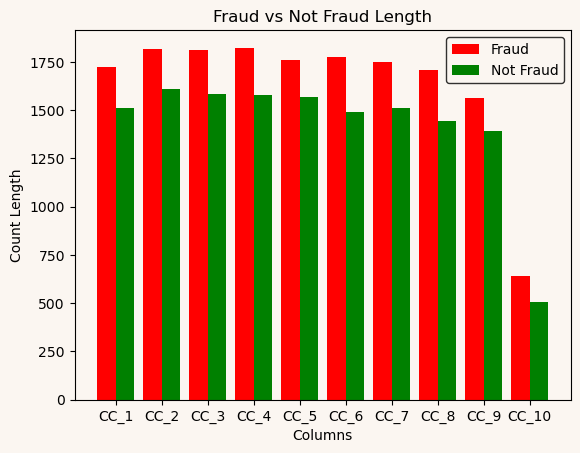

In [43]:
fraud_lengths = [1723, 1819, 1814, 1824, 1759, 1776, 1751, 1707, 1564, 641]
not_fraud_lengths = [1512, 1612, 1583, 1579, 1568, 1490, 1514, 1446, 1392, 507]
X = ['CC_1', 'CC_2', 'CC_3', 'CC_4', 'CC_5', 'CC_6', 'CC_7', 'CC_8', 'CC_9', 'CC_10']
X_axis = np.arange(len(X))

plt.figure(facecolor='#FBF6F1')
plt.bar(X_axis - 0.2, fraud_lengths, 0.4, label='Fraud', color='r')
plt.bar(X_axis + 0.2, not_fraud_lengths, 0.4, label='Not Fraud', color='g')
plt.xticks(X_axis, X)

# Set legend facecolor and text color
legend = plt.legend()
legend.get_frame().set_facecolor('#FBF6F1')
legend.get_frame().set_edgecolor('black')
for text in legend.get_texts():
    text.set_color('black')

plt.xlabel('Columns')
plt.ylabel('Count Length')
plt.title('Fraud vs Not Fraud Length')

# Set plot background color and text color
plt.gca().set_facecolor('#FBF6F1')
plt.gca().spines['bottom'].set_color('black')
plt.gca().spines['top'].set_color('black')
plt.gca().spines['right'].set_color('black')
plt.gca().spines['left'].set_color('black')
plt.gca().tick_params(axis='x', colors='black')
plt.gca().tick_params(axis='y', colors='black')
plt.gca().title.set_color('black')
plt.gca().xaxis.label.set_color('black')
plt.gca().yaxis.label.set_color('black')

plt.show()

In [44]:
print('Code 4019')
print(sep_line)
print(f'Fraud -> {len(fraud_count_cc1 == 4019)}')
print(f'Not Fraud -> {len(not_fraud_count_cc1 == 4019)}') 
print(sep_line)
print(f'Fraud -> {len(fraud_count_cc2 == 4019)}')
print(f'Not Fraud -> {len(not_fraud_count_cc2 == 4019)}')
print(sep_line)
print(f'Fraud -> {len(fraud_count_cc3 == 4019)}')
print(f'Not Fraud -> {len(not_fraud_count_cc3 == 4019)}') 
print(sep_line)
print(f'Fraud -> {len(fraud_count_cc4 == 4019)}')
print(f'Not Fraud -> {len(not_fraud_count_cc4 == 4019)}') 
print(sep_line)
print(f'Fraud -> {len(fraud_count_cc5 == 4019)}')
print(f'Not Fraud -> {len(not_fraud_count_cc5 == 4019)}') 
print(sep_line)
print(f'Fraud -> {len(fraud_count_cc6 == 4019)}')
print(f'Not Fraud -> {len(not_fraud_count_cc6 == 4019)}') 
print(sep_line)
print(f'Fraud -> {len(fraud_count_cc7 == 4019)}')
print(f'Not Fraud -> {len(not_fraud_count_cc7 == 4019)}') 
print(sep_line)
print(f'Fraud -> {len(fraud_count_cc8 == 4019)}')
print(f'Not Fraud -> {len(not_fraud_count_cc8 == 4019)}')
print(sep_line)
print(f'Fraud -> {len(fraud_count_cc9 == 4019)}')
print(f'Not Fraud -> {len(not_fraud_count_cc9 == 4019)}') 
print(sep_line) 
print(f'Fraud -> {len(fraud_count_cc10 == 4019)}')
print(f'Not Fraud -> {len(not_fraud_count_cc10 == 4019)}')  

Code 4019
Fraud -> 1723
Not Fraud -> 1512
Fraud -> 1819
Not Fraud -> 1612
Fraud -> 1814
Not Fraud -> 1583
Fraud -> 1824
Not Fraud -> 1579
Fraud -> 1759
Not Fraud -> 1568
Fraud -> 1776
Not Fraud -> 1490
Fraud -> 1751
Not Fraud -> 1514
Fraud -> 1707
Not Fraud -> 1446
Fraud -> 1564
Not Fraud -> 1392
Fraud -> 641
Not Fraud -> 507


In [45]:
len(fraud_count_cc2 == 4019)

1819

In [46]:
 
not_fraud_count_cc2 
fraud_count_cc3 
not_fraud_count_cc3
fraud_count_cc4 
not_fraud_count_cc4 
fraud_count_cc5 
not_fraud_count_cc5 
fraud_count_cc6 
not_fraud_count_cc6 
fraud_count_cc7 
not_fraud_count_cc7
fraud_count_cc8 
not_fraud_count_cc8 
fraud_count_cc9 
not_fraud_count_cc9 
fraud_count_cc10 
not_fraud_count_cc10 

clmdiagnosiscode_10
00000    16272
4019        80
25000       60
4280        36
2724        34
         ...  
7931         1
3568         1
35800        1
V427         1
40300        1
Name: count, Length: 507, dtype: int64

#### How many of the claims submitted by the top 10 providers are fraud? 

In [47]:
171763 - 95792

75971

In [48]:
# Outpatient Fraud Yes 
outpatient_fraud_df = train_out[train_out.potentialfraud == 'Yes']
# Inpatient Fraud Yes 
inpatient_fraud_df = train_in[train_in.potentialfraud == 'Yes']

print(f'Sum of outpatient -> {outpatient_fraud_df.claimid.count()}')
print(sep_line)
print(f'Sum of intpatient -> {inpatient_fraud_df.claimid.count()}')

Sum of outpatient -> 192870
Sum of intpatient -> 24574


In [49]:
# Outpatient Fraud No 
outpatient_NOT_fraud_df = train_out[train_out.potentialfraud == 'No']
# Inpatient Fraud No
inpatient_NOT_fraud_df = train_in[train_in.potentialfraud == 'No']

print(f'Sum of outpatient -> {outpatient_NOT_fraud_df.claimid.count()}')
print(sep_line)
print(f'Sum of intpatient -> {inpatient_NOT_fraud_df.claimid.count()}')

Sum of outpatient -> 347207
Sum of intpatient -> 18039


In [50]:
outpatient_NOT_fraud_df.head()

,beneid,gender,race,renaldiseaseindicator,state,county,noofmonths_partacov,noofmonths_partbcov,chroniccond_alzheimer,chroniccond_heartfailure,...,clmdiagnosiscode_5,clmdiagnosiscode_6,clmdiagnosiscode_7,clmdiagnosiscode_8,clmdiagnosiscode_9,deductibleamtpaid,clmadmitdiagnosiscode,claimduration,potentialfraud,potentialfraud_encoded
703029,BENE146361,0,1,0,14,141,12,12,1,1,...,00000,00000,00000,00000,00000,0.0,00000,0.0,No,0
648523,BENE130838,0,0,1,34,300,12,12,0,0,...,00000,00000,00000,00000,00000,0.0,00000,20.0,No,0
266875,BENE95352,1,0,0,5,340,12,12,1,1,...,00000,00000,00000,00000,00000,0.0,00000,0.0,No,0
95370,BENE41026,1,1,0,49,150,12,12,1,0,...,00000,00000,00000,00000,00000,0.0,00000,0.0,No,0
691794,BENE143153,0,0,0,8,10,12,12,0,0,...,2724,00000,00000,00000,00000,0.0,00000,0.0,No,0


In [51]:
outpatient_fraud_df.head()

,beneid,gender,race,renaldiseaseindicator,state,county,noofmonths_partacov,noofmonths_partbcov,chroniccond_alzheimer,chroniccond_heartfailure,...,clmdiagnosiscode_5,clmdiagnosiscode_6,clmdiagnosiscode_7,clmdiagnosiscode_8,clmdiagnosiscode_9,deductibleamtpaid,clmadmitdiagnosiscode,claimduration,potentialfraud,potentialfraud_encoded
740348,BENE157086,1,1,0,21,230,12,12,1,0,...,00000,00000,00000,00000,00000,0.0,00000,0.0,Yes,1
539838,BENE99972,1,2,0,14,141,0,12,1,1,...,00000,00000,00000,00000,00000,0.0,00000,0.0,Yes,1
202247,BENE75002,1,0,0,6,500,12,12,0,1,...,00000,00000,00000,00000,00000,0.0,00000,0.0,Yes,1
365147,BENE64436,0,0,0,33,590,12,12,0,1,...,25001,V5861,00000,00000,00000,0.0,00000,0.0,Yes,1
206543,BENE76357,1,0,0,44,800,12,12,1,1,...,00000,00000,00000,00000,00000,0.0,00000,0.0,Yes,1


- sum of total reimbursment 

In [52]:
print(f'Fraud Total Reimbursment In {inpatient_fraud_df.total_reimbursed_amt.sum()}')
print(sep_line)
print(f'NOT Fraud Total Reimbursment In {inpatient_NOT_fraud_df.total_reimbursed_amt.sum()}')
print(sep_line)
print(f'Fraud Total Reimbursment Out {outpatient_fraud_df.total_reimbursed_amt.sum()}')
print(sep_line)
print(f'NOT Fraud Total Reimbursment Out {outpatient_NOT_fraud_df.total_reimbursed_amt.sum()}')

Fraud Total Reimbursment In 9244.532590529248
NOT Fraud Total Reimbursment In 5957.667966573816
Fraud Total Reimbursment Out 136532.91761363638
NOT Fraud Total Reimbursment Out 241914.3607954545


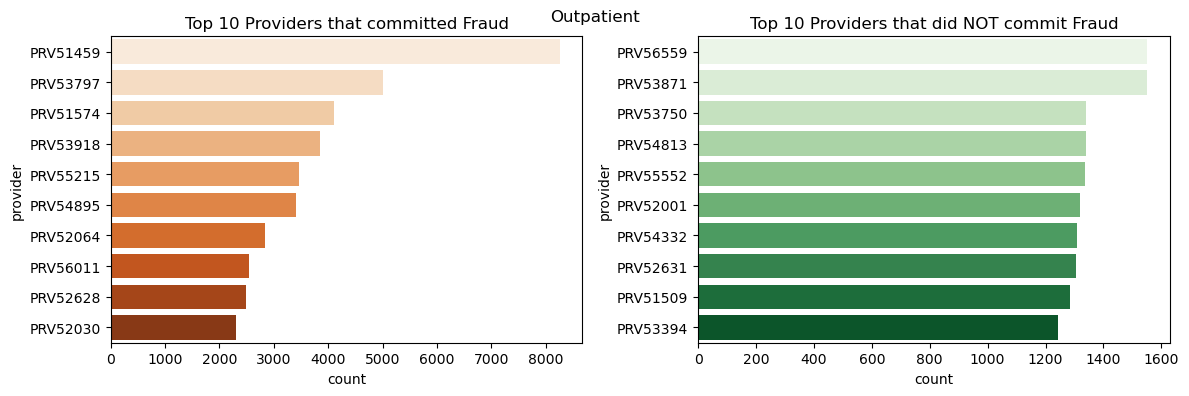

In [53]:
# OutPatient

fig, axes = plt.subplots(1, 2, figsize=(12, 4))

provider_fraud = train_out['provider'].value_counts()[:10]
provider_not_fraud = outpatient_NOT_fraud_df['provider'].value_counts()[:10]

sns.countplot(data=outpatient_fraud_df, y='provider', ax=axes[0], order=provider_fraud.index, palette='Oranges')
axes[0].set_title('Top 10 Providers that committed Fraud')

sns.countplot(data=outpatient_NOT_fraud_df, y='provider', ax=axes[1], order=provider_not_fraud.index, palette='Greens')
axes[1].set_title('Top 10 Providers that did NOT commit Fraud')

plt.tight_layout()
plt.suptitle("Outpatient")
plt.show()

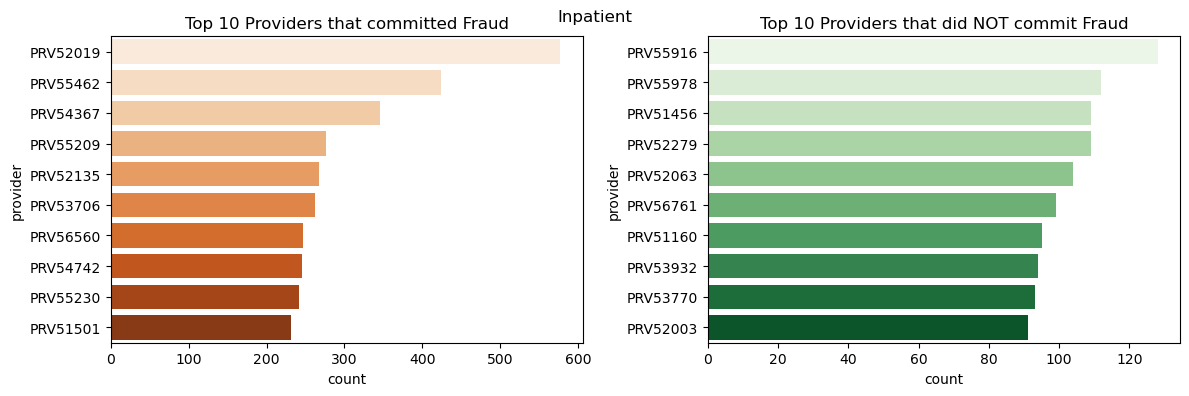

In [54]:
# InPatient

fig, axes = plt.subplots(1, 2, figsize=(12, 4))

provider_fraud = inpatient_fraud_df['provider'].value_counts()[:10]
provider_not_fraud = inpatient_NOT_fraud_df['provider'].value_counts()[:10]

sns.countplot(data=inpatient_fraud_df, y='provider', ax=axes[0], order=provider_fraud.index, palette='Oranges')
axes[0].set_title('Top 10 Providers that committed Fraud')

sns.countplot(data=inpatient_NOT_fraud_df, y='provider', ax=axes[1], order=provider_not_fraud.index, palette='Greens')
axes[1].set_title('Top 10 Providers that did NOT commit Fraud')

plt.tight_layout()
plt.suptitle("Inpatient")
plt.show()

### What percent of providers are submitting fradulnent claims? 

In [55]:
percentage_provider_fraud_i = round(len(inpatient_fraud_df.claimid) / (len(inpatient_fraud_df.claimid) + len(inpatient_NOT_fraud_df.claimid)) * 100, 2)
percentage_provider_fraud_o = round(len(outpatient_fraud_df.claimid) / (len(outpatient_fraud_df.claimid) + len(outpatient_NOT_fraud_df.claimid)) * 100, 2)

print(f'Percentage of Inpatient Providers committing fraud: {percentage_provider_fraud_i}%')
print(sep_line)
print(f'Percentage of Outpatient Providers committing fraud: {percentage_provider_fraud_o}%')

Percentage of Inpatient Providers committing fraud: 57.67%
Percentage of Outpatient Providers committing fraud: 35.71%


In [56]:
100-35


65

### What does the age demographic look like for fraud in both inpatient and outpatient 

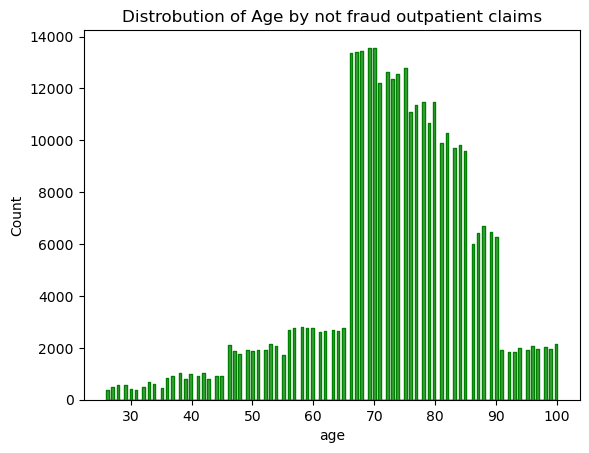

In [57]:
sns.histplot(data = outpatient_NOT_fraud_df, x='age', color='Green', element="step")
plt.title('Distrobution of Age by not fraud outpatient claims')
plt.show()

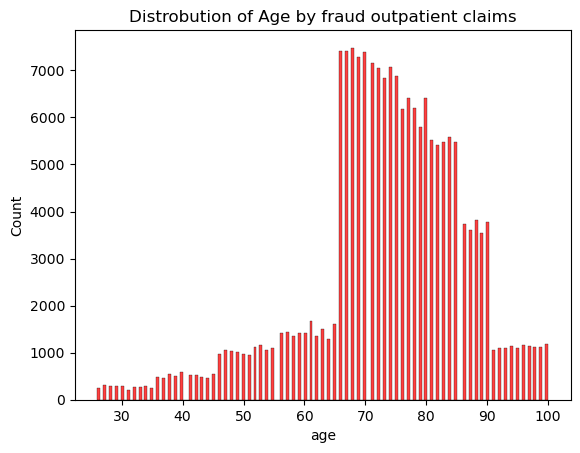

In [58]:
sns.histplot(data = outpatient_fraud_df, x='age', color="Red")
plt.title('Distrobution of Age by fraud outpatient claims')
plt.show()

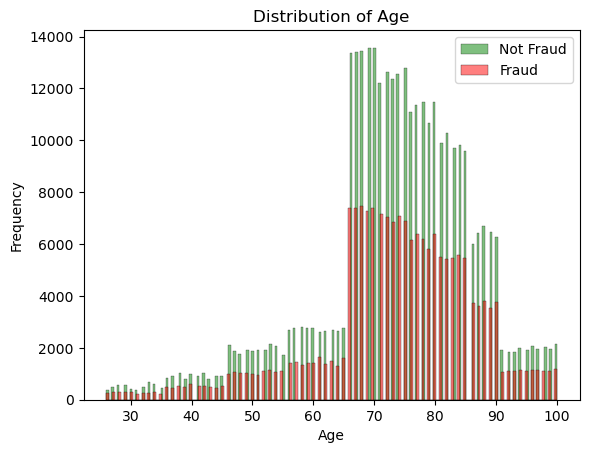

In [59]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, ax = plt.subplots()

sns.histplot(data=outpatient_NOT_fraud_df, x='age', color='green', alpha=0.5, ax=ax) 
sns.histplot(data=outpatient_fraud_df, x='age', color='red', alpha=0.5, ax=ax)


ax.set_title('Distribution of Age')
ax.set_xlabel('Age')
ax.set_ylabel('Frequency')

ax.legend(['Not Fraud', 'Fraud'])

plt.show()

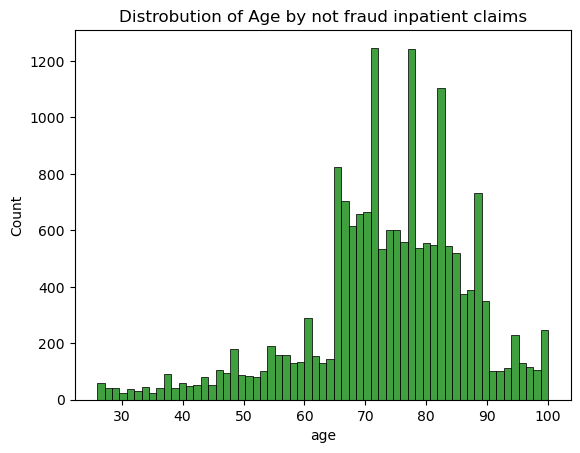

In [60]:
sns.histplot(data = inpatient_NOT_fraud_df, x='age', color='Green')
plt.title('Distrobution of Age by not fraud inpatient claims')
plt.show()

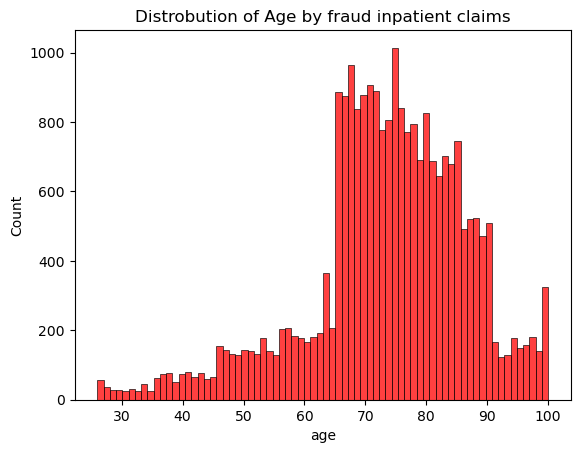

In [61]:
sns.histplot(data = inpatient_fraud_df, x='age', color='red')
plt.title('Distrobution of Age by fraud inpatient claims')
plt.show()

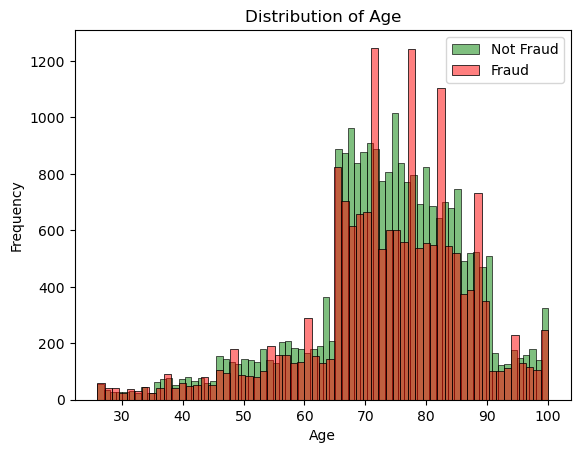

In [62]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, ax = plt.subplots()

sns.histplot(data=inpatient_fraud_df, x='age', color='green', alpha=0.5, ax=ax)
sns.histplot(data=inpatient_NOT_fraud_df, x='age', color='red', alpha=0.5, ax=ax) 

ax.set_title('Distribution of Age')
ax.set_xlabel('Age')
ax.set_ylabel('Frequency')

ax.legend(['Not Fraud', 'Fraud'])

plt.show()

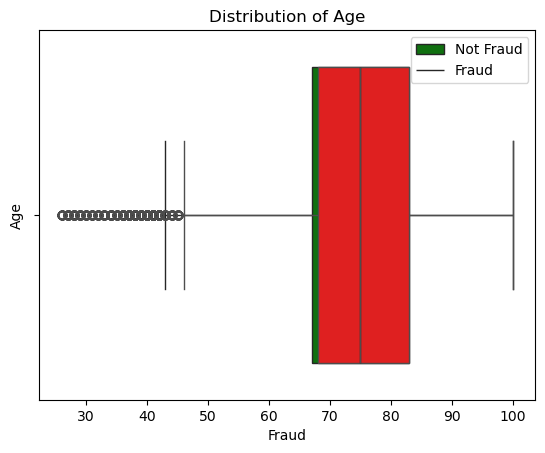

In [63]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, ax = plt.subplots()

sns.boxplot(data=inpatient_NOT_fraud_df, x='age', color='green', ax=ax)
sns.boxplot(data=inpatient_fraud_df, x='age', color='red', ax=ax)

ax.set_title('Distribution of Age')  
ax.set_xlabel('Fraud')
ax.set_ylabel('Age')

ax.legend(['Not Fraud', 'Fraud'], loc='upper right')

plt.show()

<Figure size 1000x600 with 0 Axes>

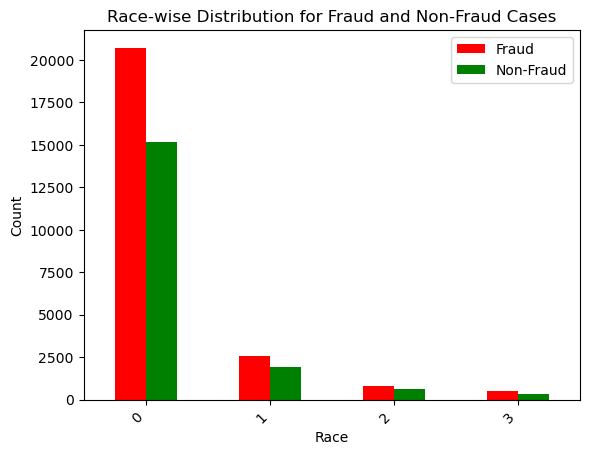

In [64]:
 # Extract 'Race' and 'Potential Fraud' columns from the DataFrame
subset_df = train_in[['race', 'potentialfraud']]
# Filter the DataFrame to include only 'fraud' and 'nonfraud' cases
fraud_cases = subset_df[subset_df['potentialfraud'] == 'Yes']
nonfraud_cases = subset_df[subset_df['potentialfraud'] == 'No']
# Calculate race-wise counts for fraud and non-fraud cases
fraud_race_counts = fraud_cases['race'].value_counts()
nonfraud_race_counts = nonfraud_cases['race'].value_counts()
# Combine the counts into a single DataFrame
combined_df = pd.DataFrame({'Fraud': fraud_race_counts, 'Non-Fraud': nonfraud_race_counts})
# Create a bar chart
plt.figure(figsize=(10, 6))
combined_df.plot(kind='bar', color=['red', 'green'])
plt.title('Race-wise Distribution for Fraud and Non-Fraud Cases')
plt.xlabel('Race')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.show()

<Figure size 1000x600 with 0 Axes>

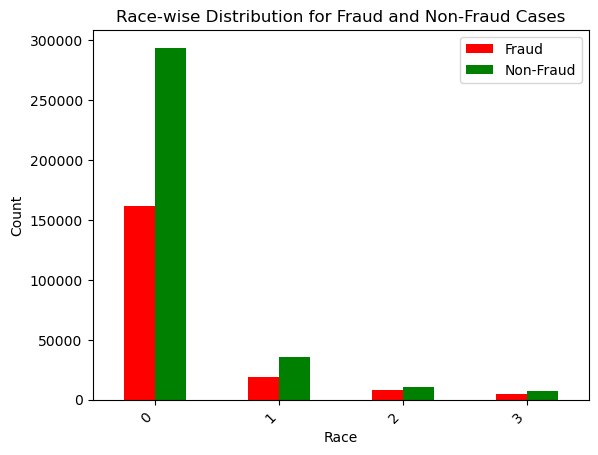

In [65]:
# Extract 'Race' and 'Potential Fraud' columns from the DataFrame
subset_df = train_out[['race', 'potentialfraud']]
# Filter the DataFrame to include only 'fraud' and 'nonfraud' cases
fraud_cases = subset_df[subset_df['potentialfraud'] == 'Yes']
nonfraud_cases = subset_df[subset_df['potentialfraud'] == 'No']
# Calculate race-wise counts for fraud and non-fraud cases
fraud_race_counts = fraud_cases['race'].value_counts()
nonfraud_race_counts = nonfraud_cases['race'].value_counts()
# Combine the counts into a single DataFrame
combined_df = pd.DataFrame({'Fraud': fraud_race_counts, 'Non-Fraud': nonfraud_race_counts})
# Create a bar chart
plt.figure(figsize=(10, 6))
combined_df.plot(kind='bar', color=['red', 'green'])
plt.title('Race-wise Distribution for Fraud and Non-Fraud Cases')
plt.xlabel('Race')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.show()

<Figure size 800x600 with 0 Axes>

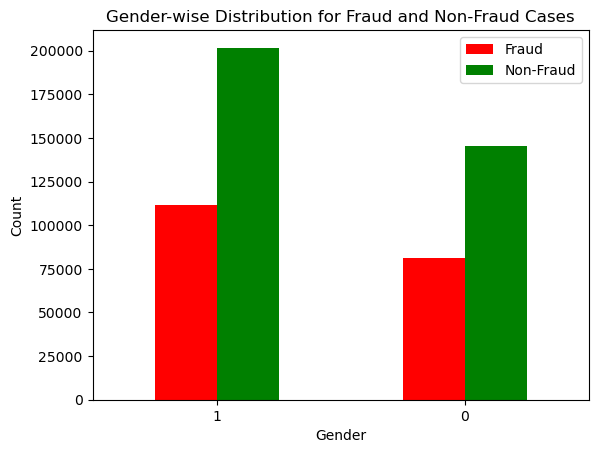

In [66]:
# Extract 'Gender' and 'Potential Fraud' columns from the DataFrame
subset_df = train_out[['gender', 'potentialfraud']]
# Filter the DataFrame to include only 'fraud' and 'nonfraud' cases
fraud_cases = subset_df[subset_df['potentialfraud'] == 'Yes']
nonfraud_cases = subset_df[subset_df['potentialfraud'] == 'No']
# Calculate gender-wise counts for fraud and non-fraud cases
fraud_gender_counts = fraud_cases['gender'].value_counts()
nonfraud_gender_counts = nonfraud_cases['gender'].value_counts()
# Combine the counts into a single DataFrame
combined_df = pd.DataFrame({'Fraud': fraud_gender_counts, 'Non-Fraud': nonfraud_gender_counts})
# Create a bar chart
plt.figure(figsize=(8, 6))
combined_df.plot(kind='bar', color=['red', 'green'])
plt.title('Gender-wise Distribution for Fraud and Non-Fraud Cases')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()

<Figure size 800x600 with 0 Axes>

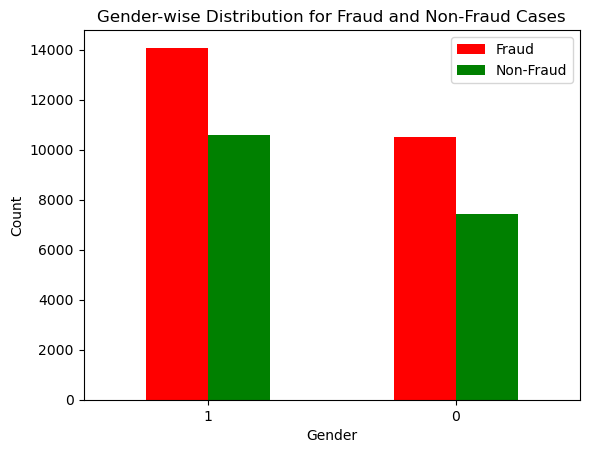

In [67]:
# Extract 'Gender' and 'Potential Fraud' columns from the DataFrame
subset_df = train_in[['gender', 'potentialfraud']]
# Filter the DataFrame to include only 'fraud' and 'nonfraud' cases
fraud_cases = subset_df[subset_df['potentialfraud'] == 'Yes']
nonfraud_cases = subset_df[subset_df['potentialfraud'] == 'No']
# Calculate gender-wise counts for fraud and non-fraud cases
fraud_gender_counts = fraud_cases['gender'].value_counts()
nonfraud_gender_counts = nonfraud_cases['gender'].value_counts()
# Combine the counts into a single DataFrame
combined_df = pd.DataFrame({'Fraud': fraud_gender_counts, 'Non-Fraud': nonfraud_gender_counts})
# Create a bar chart
plt.figure(figsize=(8, 6))
combined_df.plot(kind='bar', color=['red', 'green'])
plt.title('Gender-wise Distribution for Fraud and Non-Fraud Cases')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()

CC_1: Fraud 47.35%, Not Fraud 52.65%
CC_2: Fraud 45.80%, Not Fraud 54.20%
CC_3: Fraud 45.29%, Not Fraud 54.71%
CC_4: Fraud 45.37%, Not Fraud 54.63%
CC_5: Fraud 44.68%, Not Fraud 55.32%
CC_6: Fraud 44.29%, Not Fraud 55.71%
CC_7: Fraud 44.54%, Not Fraud 55.46%
CC_8: Fraud 43.47%, Not Fraud 56.53%
CC_9: Fraud 43.90%, Not Fraud 56.10%


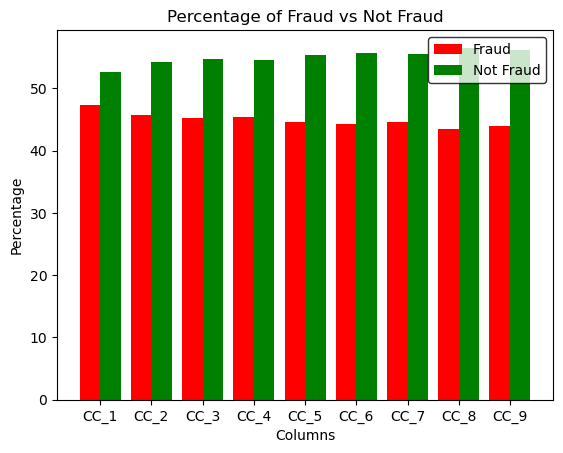

In [68]:
fraud_lengths = [8574, 3614, 3065, 2649, 2207, 1854, 1627, 1347, 1108]
not_fraud_lengths = [9534, 4277, 3703, 3190, 2733, 2332, 2026, 1752, 1416]
total_lengths = np.array(fraud_lengths) + np.array(not_fraud_lengths)
fraud_percentages = np.array(fraud_lengths) / total_lengths * 100
not_fraud_percentages = np.array(not_fraud_lengths) / total_lengths * 100
X = ['CC_1', 'CC_2', 'CC_3', 'CC_4', 'CC_5', 'CC_6', 'CC_7', 'CC_8', 'CC_9']
X_axis = np.arange(len(X))
plt.bar(X_axis - 0.2, fraud_percentages, 0.4, label='Fraud', color='r')
plt.bar(X_axis + 0.2, not_fraud_percentages, 0.4, label='Not Fraud', color='g')
plt.xticks(X_axis, X)  # Set the x-axis labels to the values in the X list
# Set legend facecolor and text color
legend = plt.legend()
legend.get_frame().set_edgecolor('Black')
for text in legend.get_texts():
    text.set_color('Black')
plt.xlabel('Columns')
plt.ylabel('Percentage')
plt.title('Percentage of Fraud vs Not Fraud')
# Set plot text color
plt.gca().spines['bottom'].set_color('black')
plt.gca().spines['top'].set_color('black')
plt.gca().spines['right'].set_color('black')
plt.gca().spines['left'].set_color('black')
plt.gca().tick_params(axis='x', colors='black')
plt.gca().tick_params(axis='y', colors='black')
plt.gca().title.set_color('black')
plt.gca().xaxis.label.set_color('black')
plt.gca().yaxis.label.set_color('black')
# Print percentages
for i, x in enumerate(X):
    print(f"{x}: Fraud {fraud_percentages[i]:.2f}%, Not Fraud {not_fraud_percentages[i]:.2f}%")
plt.show()

CC_1: Fraud 53.26%, Not Fraud 46.74%
CC_2: Fraud 53.02%, Not Fraud 46.98%
CC_3: Fraud 53.40%, Not Fraud 46.60%
CC_4: Fraud 53.60%, Not Fraud 46.40%
CC_5: Fraud 52.87%, Not Fraud 47.13%
CC_6: Fraud 54.38%, Not Fraud 45.62%
CC_7: Fraud 53.63%, Not Fraud 46.37%
CC_8: Fraud 54.14%, Not Fraud 45.86%
CC_9: Fraud 52.91%, Not Fraud 47.09%
CC_10: Fraud 55.84%, Not Fraud 44.16%


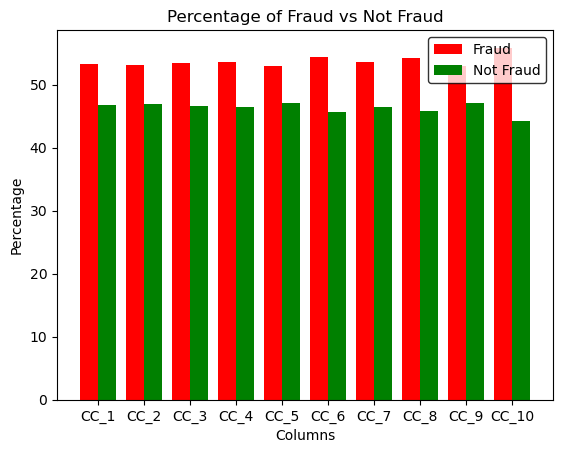

In [69]:
fraud_lengths = [1723, 1819, 1814, 1824, 1759, 1776, 1751, 1707, 1564, 641]
not_fraud_lengths = [1512, 1612, 1583, 1579, 1568, 1490, 1514, 1446, 1392, 507]
total_lengths = np.array(fraud_lengths) + np.array(not_fraud_lengths)
fraud_percentages = np.array(fraud_lengths) / total_lengths * 100
not_fraud_percentages = np.array(not_fraud_lengths) / total_lengths * 100
X = ['CC_1', 'CC_2', 'CC_3', 'CC_4', 'CC_5', 'CC_6', 'CC_7', 'CC_8', 'CC_9', 'CC_10']
X_axis = np.arange(len(X))
plt.bar(X_axis - 0.2, fraud_percentages, 0.4, label='Fraud', color='r')
plt.bar(X_axis + 0.2, not_fraud_percentages, 0.4, label='Not Fraud', color='g')
plt.xticks(X_axis, X)
# Set legend facecolor and text color
legend = plt.legend()
legend.get_frame().set_edgecolor('black')
for text in legend.get_texts():
    text.set_color('black')
plt.xlabel('Columns')
plt.ylabel('Percentage')
plt.title('Percentage of Fraud vs Not Fraud')
# Set plot text color
plt.gca().spines['bottom'].set_color('black')
plt.gca().spines['top'].set_color('black')
plt.gca().spines['right'].set_color('black')
plt.gca().spines['left'].set_color('black')
plt.gca().tick_params(axis='x', colors='black')
plt.gca().tick_params(axis='y', colors='black')
plt.gca().title.set_color('black')
plt.gca().xaxis.label.set_color('black')
plt.gca().yaxis.label.set_color('black')
# Print percentages
for i, x in enumerate(X):
    print(f"{x}: Fraud {fraud_percentages[i]:.2f}%, Not Fraud {not_fraud_percentages[i]:.2f}%")
plt.show()

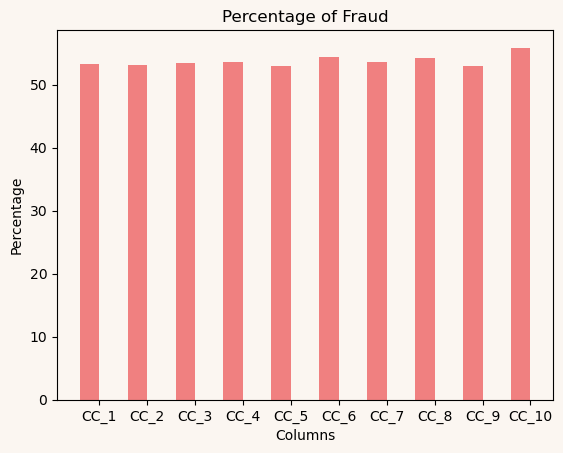

CC_1: Fraud 53.26%, Not Fraud 46.74%
CC_2: Fraud 53.02%, Not Fraud 46.98%
CC_3: Fraud 53.40%, Not Fraud 46.60%
CC_4: Fraud 53.60%, Not Fraud 46.40%
CC_5: Fraud 52.87%, Not Fraud 47.13%
CC_6: Fraud 54.38%, Not Fraud 45.62%
CC_7: Fraud 53.63%, Not Fraud 46.37%
CC_8: Fraud 54.14%, Not Fraud 45.86%
CC_9: Fraud 52.91%, Not Fraud 47.09%
CC_10: Fraud 55.84%, Not Fraud 44.16%


In [135]:
fraud_lengths = [1723, 1819, 1814, 1824, 1759, 1776, 1751, 1707, 1564, 641]
total_lengths = np.array(fraud_lengths) + np.array(not_fraud_lengths)
fraud_percentages = np.array(fraud_lengths) / total_lengths * 100
X = ['CC_1', 'CC_2', 'CC_3', 'CC_4', 'CC_5', 'CC_6', 'CC_7', 'CC_8', 'CC_9', 'CC_10']
X_axis = np.arange(len(X))
plt.figure(facecolor='#FBF6F1')
plt.bar(X_axis - 0.2, fraud_percentages, 0.4, label='Fraud', color='lightcoral')
plt.xticks(X_axis, X)
# Set legend facecolor and text color
plt.xlabel('Columns')
plt.ylabel('Percentage')
plt.title('Percentage of Fraud')
# Set plot text color
# Set plot background color and text color
plt.gca().set_facecolor('#FBF6F1')
plt.gca().spines['bottom'].set_color('black')
plt.gca().spines['top'].set_color('black')
plt.gca().spines['right'].set_color('black')
plt.gca().spines['left'].set_color('black')
plt.gca().tick_params(axis='x', colors='black')
plt.gca().tick_params(axis='y', colors='black')
plt.gca().title.set_color('black')
plt.gca().xaxis.label.set_color('black')
plt.gca().yaxis.label.set_color('black')

plt.show()
# Print percentages
for i, x in enumerate(X):
    print(f"{x}: Fraud {fraud_percentages[i]:.2f}%, Not Fraud {not_fraud_percentages[i]:.2f}%")
plt.show()

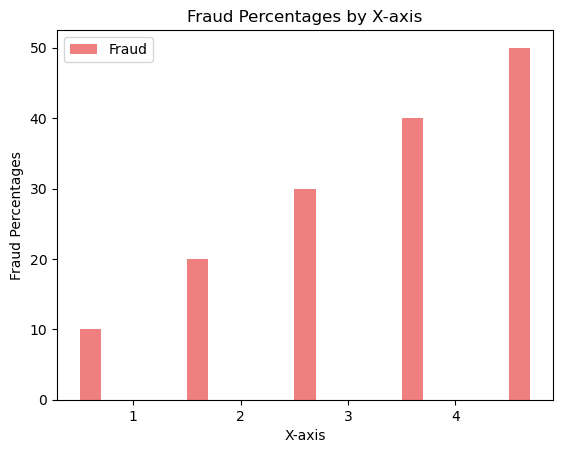

In [127]:
import matplotlib.pyplot as plt

X_axis = [1, 2, 3, 4, 5]  # Example X-axis values
fraud_percentages = [10, 20, 30, 40, 50]  # Example fraud percentages

plt.bar([x - 0.4 for x in X_axis], fraud_percentages, width=0.2, label='Fraud', color='lightcoral')

plt.xlabel('X-axis')
plt.ylabel('Fraud Percentages')
plt.title('Fraud Percentages by X-axis')

plt.legend()
plt.show()

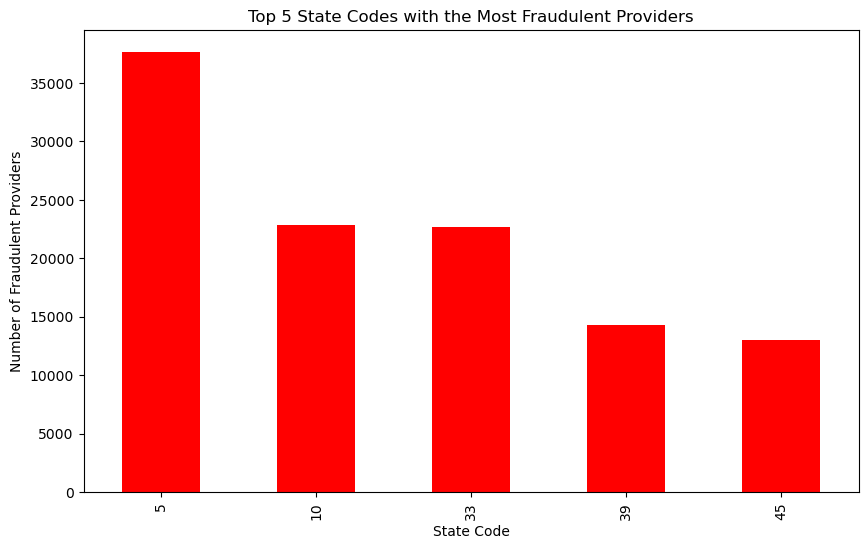

In [104]:
# Group the data by state and count the number of fraudulent providers
in_fraud_counts = inpatient_df[inpatient_df['potentialfraud'] == 'Yes'].groupby('state')['provider'].count()
# Sort the states by the number of fraud cases in descending order and select the top 5
in_top_states = in_fraud_counts.sort_values(ascending=False).head(5)
# Create a custom color palette with deep red for the highest value and lesser shades for the rest
red_palette = sns.color_palette("Reds_r", n_colors=len(in_top_states))
red_palette[0] = (0.7, 0, 0)  # Set the first color to deep red
# Create a bar graph to visualize the top 5 states with the most fraud
plt.figure(figsize=(10, 6))
top_states.plot(kind='bar', color='red')
plt.title('Top 5 State Codes with the Most Fraudulent Providers')
plt.xlabel('State Code')
plt.ylabel('Number of Fraudulent Providers')
plt.show()

In [101]:
outpatient_df.state.value_counts().head(1)
outpatient_df.state.sum()
round((65880 / 19038152) * 100, 2)

0.35

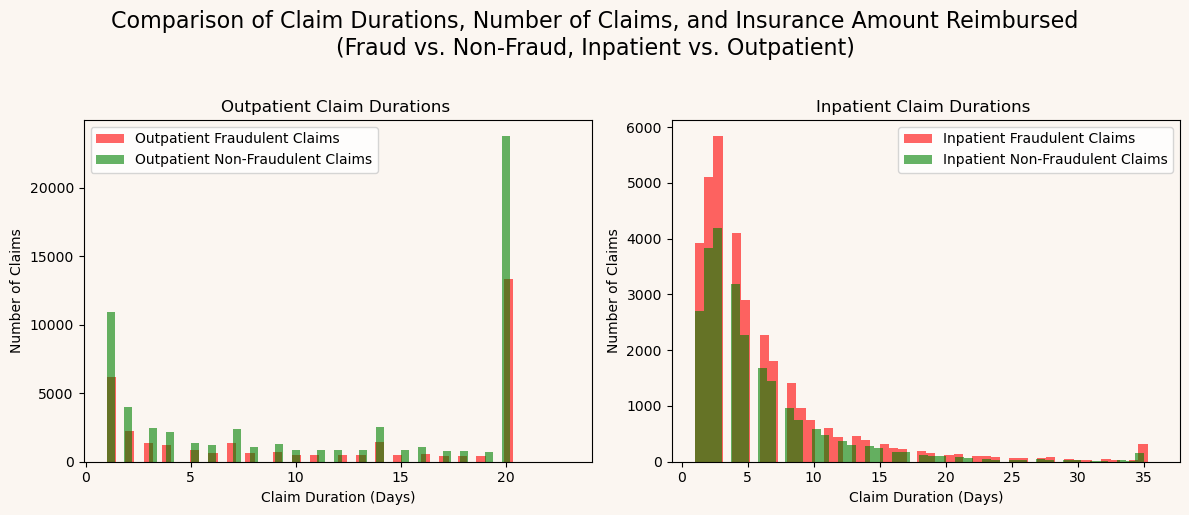

In [146]:
# Create subplots for outpatient and inpatient data
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 5), facecolor='#FBF6F1')
plt.suptitle("Comparison of Claim Durations, Number of Claims, and Insurance Amount Reimbursed\n(Fraud vs. Non-Fraud, Inpatient vs. Outpatient)", y=1.02, fontsize=16, ha='center')
# Plot outpatient data (excluding 0 days claim duration)
outpatient_fraud_claim_durations = outpatient_df[(outpatient_df['potentialfraud'] == 'Yes') & (outpatient_df['claimduration'] > 0)]['claimduration']
outpatient_non_fraud_claim_durations = outpatient_df[(outpatient_df['potentialfraud'] == 'No') & (outpatient_df['claimduration'] > 0)]['claimduration']
axes[0].hist(outpatient_fraud_claim_durations, bins=50, color='red', alpha=0.6, label='Outpatient Fraudulent Claims')
axes[0].hist(outpatient_non_fraud_claim_durations, bins=50, color='green', alpha=0.6, label='Outpatient Non-Fraudulent Claims')
axes[0].set_title('Outpatient Claim Durations ')
axes[0].set_xlabel('Claim Duration (Days)')
axes[0].set_ylabel('Number of Claims')
axes[0].set_facecolor('#FBF6F1')
axes[0].legend()
axes[0].legend(labelcolor='black')

# Plot inpatient data (excluding 0 days claim duration)
inpatient_fraud_claim_durations = inpatient_df[(inpatient_df['potentialfraud'] == 'Yes') & (inpatient_df['claimduration'] > 0)]['claimduration']
inpatient_non_fraud_claim_durations = inpatient_df[(inpatient_df['potentialfraud'] == 'No') & (inpatient_df['claimduration'] > 0)]['claimduration']
axes[1].hist(inpatient_fraud_claim_durations, bins=50, color='red', alpha=0.6, label='Inpatient Fraudulent Claims')
axes[1].hist(inpatient_non_fraud_claim_durations, bins=50, color='green', alpha=0.6, label='Inpatient Non-Fraudulent Claims')
axes[1].set_title('Inpatient Claim Durations ')
axes[1].set_xlabel('Claim Duration (Days)')
axes[1].set_ylabel('Number of Claims')
axes[1].set_facecolor('#FBF6F1')
axes[1].legend()
axes[1].legend(labelcolor='black')
# Adjust layout
plt.tight_layout()
# Show the subplots
plt.gca().set_facecolor('#FBF6F1')
plt.gca().spines['bottom'].set_color('black')
plt.gca().spines['top'].set_color('black')
plt.gca().spines['right'].set_color('black')
plt.gca().spines['left'].set_color('black')
plt.gca().tick_params(axis='x', colors='black')
plt.gca().tick_params(axis='y', colors='black')
plt.gca().title.set_color('black')
plt.gca().xaxis.label.set_color('black')
plt.gca().yaxis.label.set_color('black')

plt.show()

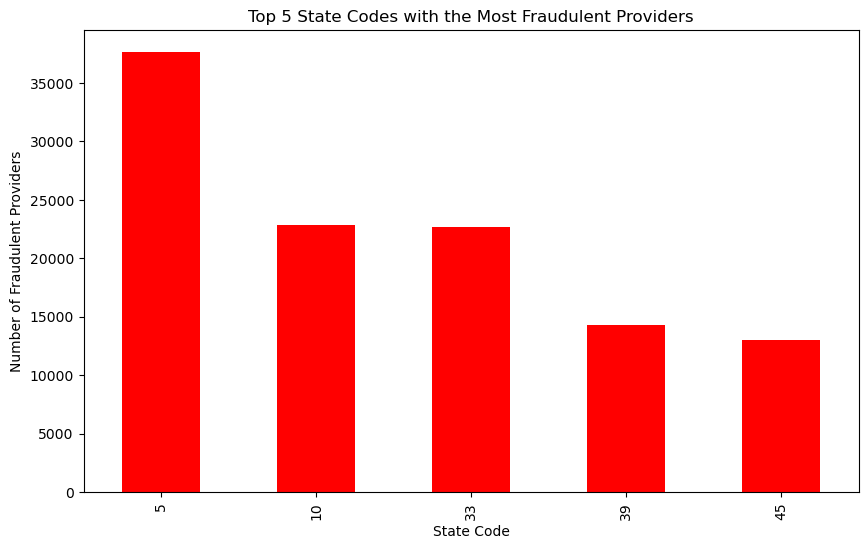

In [102]:
# Group the data by state and count the number of fraudulent providers
fraud_counts = outpatient_df[outpatient_df['potentialfraud'] == 'Yes'].groupby('state')['provider'].count()
# Sort the states by the number of fraud cases in descending order and select the top 5
top_states = fraud_counts.sort_values(ascending=False).head(5)
# Create a custom color palette with deep red for the highest value and lesser shades for the rest
red_palette = sns.color_palette("Reds_r", n_colors=len(top_states))
red_palette[0] = (0.7, 0, 0)  # Set the first color to deep red
# Create a bar graph to visualize the top 5 states with the most fraud
plt.figure(figsize=(10, 6))
top_states.plot(kind='bar', color='red')
plt.title('Top 5 State Codes with the Most Fraudulent Providers')
plt.xlabel('State Code')
plt.ylabel('Number of Fraudulent Providers')
plt.show()

In [92]:
outpatient_df.state.value_counts().head(1)

state
5    65880
Name: count, dtype: int64

In [98]:
outpatient_df.state.sum()

19038152

# Outpatient

In [103]:
outpatient_df.state.value_counts().head(1)
outpatient_df.state.sum()
round((65880 / 19038152) * 100, 2)

0.35

# Inpatient

In [107]:
inpatient_df.state.value_counts().head(1)
inpatient_df.state.sum()
round((4769 / 1503218) * 100, 2)

0.32

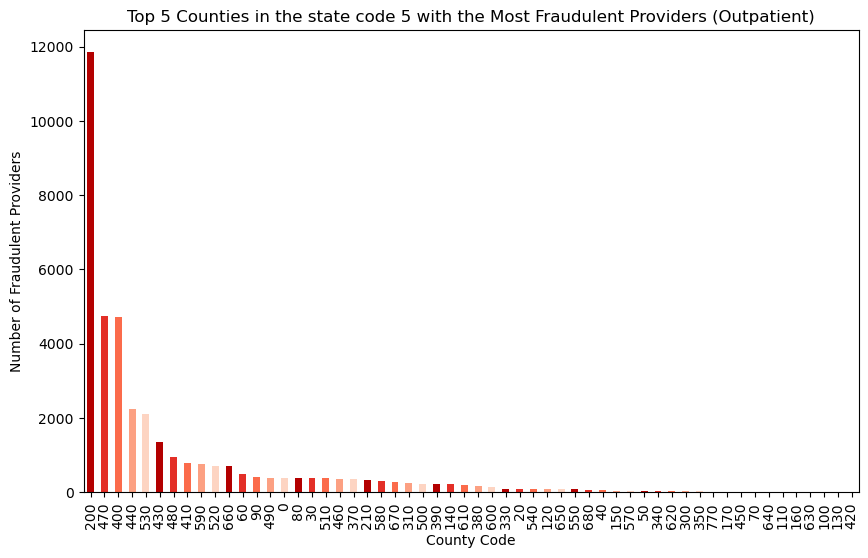

In [83]:
# First find the top state with the most fraud
top_state = outpatient_df[outpatient_df['potentialfraud'] == 'Yes'].groupby('state')['provider'].count().idxmax()
# Find and visualize the top 5 counties with the most fraud in the top state
county_fraud_counts = outpatient_df[(outpatient_df['potentialfraud'] == 'Yes') & (outpatient_df['state'] == top_state)].groupby('county')['provider'].count().sort_values(ascending=False)
# Create a custom color palette with deep red for the highest value and lighter shades for the rest
red_palette = sns.color_palette("Reds_r", n_colors=5)
red_palette[0] = (0.7, 0, 0)  # Set the first color to deep red
# Create a bar graph to visualize the top 5 counties in the top state with the most fraud
plt.figure(figsize=(10, 6))
county_fraud_counts.plot(kind='bar', color=red_palette)
plt.title(f'Top 5 Counties in the state code {top_state} with the Most Fraudulent Providers (Outpatient)')
plt.xlabel('County Code')
plt.ylabel('Number of Fraudulent Providers')
plt.show()

In [95]:
county_fraud_counts.head(1)

county
200    11855
Name: provider, dtype: int64

In [94]:
county_fraud_counts.sum()

37638

# outpatient 

In [96]:
# 56 total counties 
# all 56 counties submit 37638 
county_fraud_counts.head(1)
county_fraud_counts.sum()
round((11855 / 37638) * 100, 2)

31.5

In [108]:
in_county_fraud_counts = inpatient_df[(inpatient_df['potentialfraud'] == 'Yes') & (inpatient_df['state'] == top_state)].groupby('county')['provider'].count().sort_values(ascending=False)


In [109]:
in_county_fraud_counts.head(1)


county
200    556
Name: provider, dtype: int64

In [111]:
in_county_fraud_counts.sum()


2715

# Ipatient 

In [112]:
# inpatient counties
in_county_fraud_counts = inpatient_df[(inpatient_df['potentialfraud'] == 'Yes') & (inpatient_df['state'] == top_state)].groupby('county')['provider'].count().sort_values(ascending=False)
in_county_fraud_counts.head(1)
in_county_fraud_counts.sum()
round((556 / 2715) * 100, 2)

20.48

In [71]:
break

SyntaxError: 'break' outside loop (668683560.py, line 1)

<div style="background-color: darkturquoise; padding: 20px; font-size: 20px; color: white;">
    Project Pipeline:-
    <div style="background-color: rgba(255, 0, 0, 0.5);">
        - Plan ---Acquire---Prepare---Explore <strong style="font-size: 18px; background-color: orange; font-weight: bold; color: white;"> ---MODEL</strong>  --- Deliver
    </div>
</div>


# Feature Selection 

In [ ]:
# feature_importance_out = pd.DataFrame({'Feature': train_out.columns, 'Importance': feature_importances})


In [ ]:

# Outpatient testing feature importance  

X_train = train_out[['gender', 'race', 'renaldiseaseindicator', 'state', 'county',
       'noofmonths_partacov', 'noofmonths_partbcov', 'chroniccond_alzheimer',
       'chroniccond_heartfailure', 'chroniccond_kidneydisease',
       'chroniccond_cancer', 'chroniccond_obstrpulmonary',
       'chroniccond_depression', 'chroniccond_diabetes',
       'chroniccond_ischemicheart', 'chroniccond_osteoporasis',
       'chroniccond_rheumatoidarthritis', 'chroniccond_stroke',
       'ipannualreimbursementamt', 'ipannualdeductibleamt',
       'opannualreimbursementamt', 'opannualdeductibleamt', 'deceased', 'age',
       'total_reimbursed_amt', 'total_deductible_amt', 'dob_year', 'dob_month',
       'dob_day', 'race_0', 'race_1', 'race_2', 'race_3',
       'inscclaimamtreimbursed',
       'deductibleamtpaid', 'claimduration']]
y_train = train_out.potentialfraud_encoded

X_validate = validate_out[['gender', 'race', 'renaldiseaseindicator', 'state', 'county',
       'noofmonths_partacov', 'noofmonths_partbcov', 'chroniccond_alzheimer',
       'chroniccond_heartfailure', 'chroniccond_kidneydisease',
       'chroniccond_cancer', 'chroniccond_obstrpulmonary',
       'chroniccond_depression', 'chroniccond_diabetes',
       'chroniccond_ischemicheart', 'chroniccond_osteoporasis',
       'chroniccond_rheumatoidarthritis', 'chroniccond_stroke',
       'ipannualreimbursementamt', 'ipannualdeductibleamt',
       'opannualreimbursementamt', 'opannualdeductibleamt', 'deceased', 'age',
       'total_reimbursed_amt', 'total_deductible_amt', 'dob_year', 'dob_month',
       'dob_day', 'race_0', 'race_1', 'race_2', 'race_3',
       'inscclaimamtreimbursed',
       'deductibleamtpaid', 'claimduration']]
y_validate = validate_out.potentialfraud_encoded

X_test = test_out[['gender', 'race', 'renaldiseaseindicator', 'state', 'county',
       'noofmonths_partacov', 'noofmonths_partbcov', 'chroniccond_alzheimer',
       'chroniccond_heartfailure', 'chroniccond_kidneydisease',
       'chroniccond_cancer', 'chroniccond_obstrpulmonary',
       'chroniccond_depression', 'chroniccond_diabetes',
       'chroniccond_ischemicheart', 'chroniccond_osteoporasis',
       'chroniccond_rheumatoidarthritis', 'chroniccond_stroke',
       'ipannualreimbursementamt', 'ipannualdeductibleamt',
       'opannualreimbursementamt', 'opannualdeductibleamt', 'deceased', 'age',
       'total_reimbursed_amt', 'total_deductible_amt', 'dob_year', 'dob_month',
       'dob_day', 'race_0', 'race_1', 'race_2', 'race_3',
       'inscclaimamtreimbursed',
       'deductibleamtpaid', 'claimduration']]
y_test = test_out.potentialfraud_encoded


In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE

# initialize the ML algorithm
lm = LinearRegression()

# create the rfe object, indicating the ML object (lm) and the number of features I want to end up with. 
rfe = RFE(lm, n_features_to_select=15)

# fit the data using RFE
rfe.fit(X_train,y_train)  

# get list of the column names. 
rfe_feature = rfe.get_feature_names_out()
rfe_feature

array(['gender', 'race', 'renaldiseaseindicator', 'noofmonths_partacov',
       'chroniccond_heartfailure', 'chroniccond_kidneydisease',
       'chroniccond_depression', 'chroniccond_diabetes', 'deceased',
       'age', 'dob_year', 'race_0', 'race_1', 'race_2', 'race_3'],
      dtype=object)

In [ ]:
# view list of columns and their ranking

# get the ranks
var_ranks = rfe.ranking_
# get the variable names
var_names = X_train.columns.tolist()
# combine ranks and names into a df for clean viewing
rfe_ranks_df = pd.DataFrame({'Var': var_names, 'Rank': var_ranks})
# sort the df by rank
rfe_ranks_df.sort_values('Rank').head(15)

,Var,Rank
0,gender,1
26,dob_year,1
13,chroniccond_diabetes,1
12,chroniccond_depression,1
29,race_0,1
30,race_1,1
23,age,1
8,chroniccond_heartfailure,1
9,chroniccond_kidneydisease,1
5,noofmonths_partacov,1


In [ ]:
# Outpatient

X_train1 = train_out[['race', 'chroniccond_kidneydisease', 'ipannualreimbursementamt',
       'deceased', 'age', 'total_reimbursed_amt', 'race_0', 'race_1',
       'race_2', 'race_3']]
y_train1 = train_out.potentialfraud_encoded

X_validate1 = validate_out[['race', 'chroniccond_kidneydisease', 'ipannualreimbursementamt',
       'deceased', 'age', 'total_reimbursed_amt', 'race_0', 'race_1',
       'race_2', 'race_3']]
y_validate1 = validate_out.potentialfraud_encoded

X_test1 = test_out[['race', 'chroniccond_kidneydisease', 'ipannualreimbursementamt',
       'deceased', 'age', 'total_reimbursed_amt', 'race_0', 'race_1',
       'race_2', 'race_3']]
y_test1 = test_out.potentialfraud_encoded

In [ ]:
'''
# Outpatient

X_train2 = train_out[['age', 'ipannualreimbursementamt', 'claimduration',
       'total_reimbursed_amt', 'chroniccond_kidneydisease',
       'chroniccond_depression', 'chroniccond_diabetes']]
y_train2 = train_out.potentialfraud_encoded

X_validate2 = validate_out[['age', 'ipannualreimbursementamt', 'claimduration',
       'total_reimbursed_amt', 'chroniccond_kidneydisease',
       'chroniccond_depression', 'chroniccond_diabetes']]
y_validate2 = validate_out.potentialfraud_encoded

X_test2 = test_out[['age', 'ipannualreimbursementamt', 'claimduration',
       'total_reimbursed_amt', 'chroniccond_kidneydisease',
       'chroniccond_depression', 'chroniccond_diabetes']]
y_test2 = test_out.potentialfraud_encoded
'''

"\n# Outpatient\n\nX_train2 = train_out[['age', 'ipannualreimbursementamt', 'claimduration',\n       'total_reimbursed_amt', 'chroniccond_kidneydisease',\n       'chroniccond_depression', 'chroniccond_diabetes']]\ny_train2 = train_out.potentialfraud_encoded\n\nX_validate2 = validate_out[['age', 'ipannualreimbursementamt', 'claimduration',\n       'total_reimbursed_amt', 'chroniccond_kidneydisease',\n       'chroniccond_depression', 'chroniccond_diabetes']]\ny_validate2 = validate_out.potentialfraud_encoded\n\nX_test2 = test_out[['age', 'ipannualreimbursementamt', 'claimduration',\n       'total_reimbursed_amt', 'chroniccond_kidneydisease',\n       'chroniccond_depression', 'chroniccond_diabetes']]\ny_test2 = test_out.potentialfraud_encoded\n"

In [ ]:
# Inpatient 

X_train2 = train_in[['gender', 'race', 'renaldiseaseindicator', 'state', 'county',
       'noofmonths_partacov', 'noofmonths_partbcov', 'chroniccond_alzheimer',
       'chroniccond_heartfailure', 'chroniccond_kidneydisease',
       'chroniccond_cancer', 'chroniccond_obstrpulmonary',
       'chroniccond_depression', 'chroniccond_diabetes',
       'chroniccond_ischemicheart', 'chroniccond_osteoporasis',
       'chroniccond_rheumatoidarthritis', 'chroniccond_stroke',
       'deceased', 'age',
       'total_reimbursed_amt', 'total_deductible_amt', 'dob_year', 'dob_month',
       'dob_day', 'race_0', 'race_1', 'race_2', 'race_3',
       'inscclaimamtreimbursed',
       'deductibleamtpaid',
       'claimduration', 'numphysicians']]
y_train2 = train_in.potentialfraud_encoded

X_validate2 = validate_in[['gender', 'race', 'renaldiseaseindicator', 'state', 'county',
       'noofmonths_partacov', 'noofmonths_partbcov', 'chroniccond_alzheimer',
       'chroniccond_heartfailure', 'chroniccond_kidneydisease',
       'chroniccond_cancer', 'chroniccond_obstrpulmonary',
       'chroniccond_depression', 'chroniccond_diabetes',
       'chroniccond_ischemicheart', 'chroniccond_osteoporasis',
       'chroniccond_rheumatoidarthritis', 'chroniccond_stroke',
       'deceased', 'age',
       'total_reimbursed_amt', 'total_deductible_amt', 'dob_year', 'dob_month',
       'dob_day', 'race_0', 'race_1', 'race_2', 'race_3',
       'inscclaimamtreimbursed',
       'deductibleamtpaid',
       'claimduration', 'numphysicians']]
y_validate2 = validate_in.potentialfraud_encoded

X_test2 = test_in[['gender', 'race', 'renaldiseaseindicator', 'state', 'county',
       'noofmonths_partacov', 'noofmonths_partbcov', 'chroniccond_alzheimer',
       'chroniccond_heartfailure', 'chroniccond_kidneydisease',
       'chroniccond_cancer', 'chroniccond_obstrpulmonary',
       'chroniccond_depression', 'chroniccond_diabetes',
       'chroniccond_ischemicheart', 'chroniccond_osteoporasis',
       'chroniccond_rheumatoidarthritis', 'chroniccond_stroke',
       'deceased', 'age',
       'total_reimbursed_amt', 'total_deductible_amt', 'dob_year', 'dob_month',
       'dob_day', 'race_0', 'race_1', 'race_2', 'race_3',
       'inscclaimamtreimbursed',
       'deductibleamtpaid',
       'claimduration', 'numphysicians']]
y_test2 = test_in.potentialfraud_encoded

In [ ]:
# initialize the ML algorithm
lm = LinearRegression()

# create the rfe object, indicating the ML object (lm) and the number of features I want to end up with. 
rfe = RFE(lm, n_features_to_select=10)

# fit the data using RFE
rfe.fit(X_train2,y_train2)  

# get list of the column names. 
rfe_feature = rfe.get_feature_names_out()
rfe_feature

array(['gender', 'chroniccond_heartfailure', 'chroniccond_osteoporasis',
       'chroniccond_stroke', 'deceased', 'age', 'dob_year', 'race_2',
       'race_3', 'inscclaimamtreimbursed'], dtype=object)

In [ ]:
# view list of columns and their ranking

# get the ranks
var_ranks = rfe.ranking_
# get the variable names
var_names = X_train2.columns.tolist()
# combine ranks and names into a df for clean viewing
rfe_ranks_df = pd.DataFrame({'Var': var_names, 'Rank': var_ranks})
# sort the df by rank
rfe_ranks_df.sort_values('Rank').head(10)

,Var,Rank
0,gender,1
29,inscclaimamtreimbursed,1
28,race_3,1
27,race_2,1
22,dob_year,1
19,age,1
8,chroniccond_heartfailure,1
18,deceased,1
17,chroniccond_stroke,1
15,chroniccond_osteoporasis,1


In [ ]:
# Inpatient

X_train2 = train_in[['ipannualreimbursementamt', 'ipannualdeductibleamt',
       'opannualreimbursementamt', 'total_reimbursed_amt',
       'total_deductible_amt', 'dob_day', 'race_0', 'race_1', 'race_2',
       'race_3']]
y_train2 = train_in.potentialfraud_encoded

X_validate2 = validate_in[['ipannualreimbursementamt', 'ipannualdeductibleamt',
       'opannualreimbursementamt', 'total_reimbursed_amt',
       'total_deductible_amt', 'dob_day', 'race_0', 'race_1', 'race_2',
       'race_3']]
y_validate2 = validate_in.potentialfraud_encoded

X_test2 = test_in[['ipannualreimbursementamt', 'ipannualdeductibleamt',
       'opannualreimbursementamt', 'total_reimbursed_amt',
       'total_deductible_amt', 'dob_day', 'race_0', 'race_1', 'race_2',
       'race_3']]
y_test2 = test_in.potentialfraud_encoded

# BaseLine

In [ ]:
inpatient_baseline_accuracy = (inpatient_df['potentialfraud'].value_counts().idxmax() == inpatient_df.potentialfraud).mean()
outpatient_baseline_accuracy = (outpatient_df['potentialfraud'].value_counts().idxmax() == outpatient_df.potentialfraud).mean()

print(f'Outpatient Baseline accuracy -> {outpatient_baseline_accuracy}')
print(sep_line)
print(f'Inpatient Baseline accuracy -> {inpatient_baseline_accuracy}')

Outpatient Baseline accuracy -> 0.6428846627211335
Inpatient Baseline accuracy -> 0.5766941896542954


###  Model Selection
### Tried : 
-  ### Logistic Regression
-  ###  Random Forest
-  ### K-Nearest Neighbors (KNN)
-  ### Decision Tree

In [ ]:
import lightgbm as lgb

from sklearn.metrics import accuracy_score

lgb_model = lgb.LGBMClassifier(random_state=117) 
lgb_model.fit(X_train1, y_train1)

lgb_y_train_pred = lgb_model.predict(X_train1)
lgb_y_val_pred = lgb_model.predict(X_validate1)

train_accuracy = accuracy_score(y_train1, lgb_y_train_pred)
val_accuracy = accuracy_score(y_validate1, lgb_y_val_pred)

print(f"LightGBM Baseline Model Training Accuracy: {train_accuracy:.4f}")  
print(f"LightGBM Baseline Model Validation Accuracy: {val_accuracy:.4f}")

[LightGBM] [Info] Number of positive: 192870, number of negative: 347207
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.024648 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 602
[LightGBM] [Info] Number of data points in the train set: 540077, number of used features: 10
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.357116 -> initscore=-0.587905
[LightGBM] [Info] Start training from score -0.587905
LightGBM Baseline Model Training Accuracy: 0.6468
LightGBM Baseline Model Validation Accuracy: 0.5417


# xgboost 

In [ ]:
# Implementing Logistic Regression, Random Forest, and
#  K-Nearest Neighbors (KNN) 
# classification algorithms using Python's scikit-learn library

# Logistic Regression
logreg_model = LogisticRegression()
logreg_model.fit(X_train1, y_train1)
logreg_y_val_pred = logreg_model.predict(X_validate1)

# Random Forest
rf_model = RandomForestClassifier()
rf_model.fit(X_train1, y_train1)
rf_y_val_pred = rf_model.predict(X_validate1)

# K-Nearest Neighbors (KNN)
knn_model = KNeighborsClassifier()
knn_model.fit(X_train1, y_train1)
knn_y_val_pred = knn_model.predict(X_validate1)

# Calculate evaluation metrics for each model
def evaluate_model(y_true, y_pred, model_name):
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)
    roc_auc = roc_auc_score(y_true, y_pred)
    print(f"Model: {model_name}")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1-Score: {f1:.4f}")
    print(f"ROC-AUC: {roc_auc:.4f}")
    print("confusion_matrix:")
    print("---------------")
    print(confusion_matrix(y_true, y_pred))
    print("=" * 50)

# Evaluate models
evaluate_model(y_validate1, logreg_y_val_pred, "Logistic Regression")
evaluate_model(y_validate1, rf_y_val_pred, "Random Forest")
evaluate_model(y_validate1, knn_y_val_pred, "K-Nearest Neighbors")

Model: Logistic Regression
Accuracy: 0.6429
Precision: 0.3846
Recall: 0.0001
F1-Score: 0.0003
ROC-AUC: 0.5000
confusion_matrix:
---------------
[[61264     8]
 [34031     5]]
Model: Random Forest
Accuracy: 0.5088
Precision: 0.3608
Recall: 0.4867
F1-Score: 0.4144
ROC-AUC: 0.5039
confusion_matrix:
---------------
[[31927 29345]
 [17471 16565]]
Model: K-Nearest Neighbors
Accuracy: 0.4256
Precision: 0.3574
Recall: 0.7623
F1-Score: 0.4866
ROC-AUC: 0.5004
confusion_matrix:
---------------
[[14620 46652]
 [ 8092 25944]]


In [ ]:
break


SyntaxError: 'break' outside loop (370545404.py, line 1)

In [ ]:
import xgboost as xgb
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

xgb_model = XGBClassifier(objective='binary:logistic', random_state=117)
xgb_model.fit(X_train1, y_train1)
xgb_y_val_pred = xgb_model.predict(X_validate1)
# Evaluate the XGBoost model
accuracy = accuracy_score(y_validate1, xgb_y_val_pred)
print(f"Accuracy: {accuracy:.4f}")

Accuracy: 0.5528


# AdaBoostClassifier (Outpatient)

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

base_model = DecisionTreeClassifier(max_depth=1)  # The weak classifier (often a decision stump)
adaboost_model = AdaBoostClassifier(base_model, n_estimators=50, random_state=117)
adaboost_model.fit(X_train1, y_train1)
adaboost_y_val_pred = adaboost_model.predict(X_validate1)
accuracy = accuracy_score(y_validate1, adaboost_y_val_pred)
print(f"Accuracy: {accuracy:.4f}")

Accuracy: 0.6429


# AdaBoostClassifier (Inpatient)

In [ ]:
base_model = DecisionTreeClassifier(max_depth=1)  # The weak classifier (often a decision stump)
adaboost_model = AdaBoostClassifier(base_model, n_estimators=50, random_state=117)
adaboost_model.fit(X_train2, y_train2)
adaboost_y_val_pred = adaboost_model.predict(X_validate2)
accuracy = accuracy_score(y_validate2, adaboost_y_val_pred)
print(f"Accuracy: {accuracy:.4f}")

Accuracy: 0.5227


# Grid Search Decision Tree for Outpatient

# Decision Tree (Outpatient)

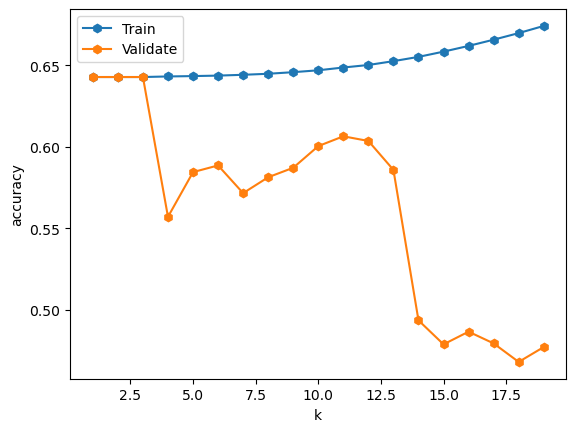

In [ ]:
k_range = range(1,20)
train_score = []
validate_score = []
for k in k_range:
    clf = DecisionTreeClassifier(max_depth=k, random_state=117)
    clf.fit(X_train1, y_train1)
    train_score.append(clf.score(X_train1, y_train1))
    validate_score.append(clf.score(X_validate1, y_validate1))
plt.figure()
plt.xlabel('k')
plt.ylabel('accuracy')
plt.plot(k_range, train_score, label = 'Train', marker='h')
plt.plot(k_range, validate_score, label = 'Validate', marker='h')
plt.legend()
plt.show()

In [ ]:

clf = DecisionTreeClassifier(max_depth=11, random_state=117)
clf.fit(X_train1, y_train1)
dt_tr_acc = clf.score(X_train1, y_train1)
dt_val_acc = clf.score(X_validate1, y_validate1)

In [ ]:
print(f'Ideal Decision Tree Accuracy Scores:\n\n\
Training Accuracy:\n{dt_tr_acc:2%}\n\n\
Validation Accuracy:\n{dt_val_acc:2%}\n\n\
Baseline Accuracy:\n{outpatient_baseline_accuracy:2%}')

Ideal Decision Tree Accuracy Scores:

Training Accuracy:
64.872601%

Validation Accuracy:
60.649683%

Baseline Accuracy:
64.288466%


In [ ]:
import shap

ex = shap.KernelExplainer(clf.predict, shap.sample(X_train1, 100))

In [ ]:
shap_values = ex.shap_values(X_test1)
shap.summary_plot(shap_values, X_test1)

  0%|          | 0/112127 [00:00<?, ?it/s]

KeyboardInterrupt: 

# Decision Tree (Inpatient)

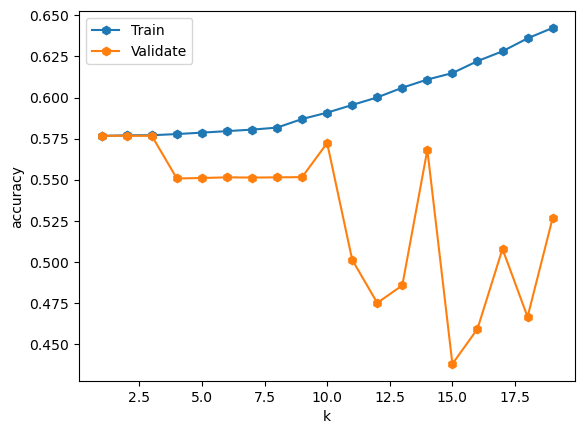

In [ ]:
k_range = range(1,20)
train_score = []
validate_score = []
for k in k_range:
    clf = DecisionTreeClassifier(max_depth=k, random_state=117)
    clf.fit(X_train2, y_train2)
    train_score.append(clf.score(X_train2, y_train2))
    validate_score.append(clf.score(X_validate2, y_validate2))
plt.figure()
plt.xlabel('k')
plt.ylabel('accuracy')
plt.plot(k_range, train_score, label = 'Train', marker='h')
plt.plot(k_range, validate_score, label = 'Validate', marker='h')
plt.legend()
plt.show()

In [ ]:
clf = DecisionTreeClassifier(max_depth=10, random_state=117)
clf.fit(X_train2, y_train2)
dt_tr_acc = clf.score(X_train2, y_train2)
dt_val_acc = clf.score(X_validate2, y_validate2)

In [ ]:
print(f'Ideal Decision Tree Accuracy Scores:\n\n\
Training Accuracy:\n{dt_tr_acc:2%}\n\n\
Validation Accuracy:\n{dt_val_acc:2%}\n\n\
Baseline Accuracy:\n{inpatient_baseline_accuracy:2%}')

Ideal Decision Tree Accuracy Scores:

Training Accuracy:
59.080562%

Validation Accuracy:
57.234043%

Baseline Accuracy:
57.669419%


In [ ]:
def evaluate_model(y_true, y_pred, model_name):
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)
    roc_auc = roc_auc_score(y_true, y_pred)
    print(f"Model: {model_name}")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1-Score: {f1:.4f}")
    print(f"ROC-AUC: {roc_auc:.4f}")
    print("confusion_matrix:")
    print("---------------")
    print(confusion_matrix(y_true, y_pred))
    print("=" * 50)

# Test best model 

In [ ]:
dt_test_acc = clf.score(X_test2, y_test2)
print("Test Accuracy:", dt_test_acc)

Test Accuracy: 0.5115280289330922


# Grid Search Random Forest Outpatient 

In [ ]:
params = {'max_depth': range(1,20),
          'max_features': [None, 1, 3, 5, 7]}

rf = RandomForestClassifier()

rfgrid = GridSearchCV(rf, params, cv=3)

rfgrid.fit(X_train2, y_train2)

test_scores = results['mean_test_score']
params = results['params']


for p, s in zip(params, test_scores):
    p['score'] = s

pd.DataFrame(params).sort_values(by='score')

,max_depth,max_features,score
28,6,5.0,0.574566
31,7,1.0,0.574660
22,5,3.0,0.574754
41,9,1.0,0.574801
25,6,NaN,0.574825
...,...,...,...
87,18,3.0,0.594420
92,19,3.0,0.596485
94,19,7.0,0.596625
90,19,NaN,0.596766


# Random Forest (Outpatient)

In [ ]:
k_range = range(1,20)
train_score = []
validate_score = []
for k in k_range:
    rf = RandomForestClassifier(max_depth = k, random_state=117, n_jobs=-1)
    rf.fit(X_train1, y_train1)
    train_score.append(rf.score(X_train1, y_train1))
    validate_score.append(rf.score(X_validate1, y_validate1))
plt.figure()
plt.xlabel('k')
plt.ylabel('accuracy')
plt.plot(k_range, train_score, label = 'Train', marker='h')
plt.plot(k_range, validate_score, label = 'Validate', marker='h')
plt.legend()
plt.show()

NameError: name 'RandomForestClassifier' is not defined

In [ ]:
rf = KNeighborsClassifier(n_neighbors=6)
rf.fit(X_train1, y_train1)
rf_tr_acc = rf.score(X_train1,y_train1)
rf_val_acc = rf.score(X_validate1, y_validate1)

In [ ]:
print(f'Ideal Random Forest Accuracy Scores:\n\n\
Training Accuracy:\n{rf_tr_acc:2%}\n\n\
Validation Accuracy:\n{rf_val_acc:2%}\n\n\
Baseline Accuracy:\n{outpatient_baseline_accuracy:2%}')

Ideal Random Forest Accuracy Scores:

Training Accuracy:
74.282556%

Validation Accuracy:
42.898812%

Baseline Accuracy:
64.288466%


# Random Forest (Inpatient)

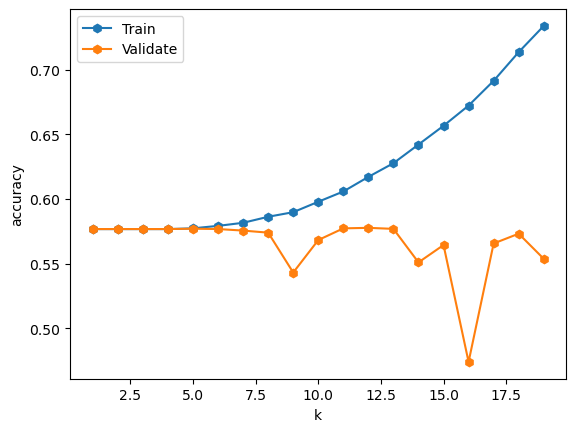

In [ ]:
k_range = range(1,20)
train_score = []
validate_score = []
for k in k_range:
    rf = RandomForestClassifier(max_depth = k, random_state=117)
    rf.fit(X_train2, y_train2)
    train_score.append(rf.score(X_train2, y_train2))
    validate_score.append(rf.score(X_validate2, y_validate2))
plt.figure()
plt.xlabel('k')
plt.ylabel('accuracy')
plt.plot(k_range, train_score, label = 'Train', marker='h')
plt.plot(k_range, validate_score, label = 'Validate', marker='h')
plt.legend()
plt.show()

In [ ]:
rf = KNeighborsClassifier(n_neighbors=6)
rf.fit(X_train2, y_train2)
rf_tr_acc = rf.score(X_train2,y_train2)
rf_val_acc = rf.score(X_validate2, y_validate2)

In [ ]:
print(f'Ideal Random Forest Accuracy Scores:\n\n\
Training Accuracy:\n{rf_tr_acc:2%}\n\n\
Validation Accuracy:\n{rf_val_acc:2%}\n\n\
Baseline Accuracy:\n{inpatient_baseline_accuracy:2%}')

Ideal Random Forest Accuracy Scores:

Training Accuracy:
71.438293%

Validation Accuracy:
59.122340%

Baseline Accuracy:
57.669419%


In [ ]:
rf_test_acc = rf.score(X_test2, y_test2)
print(rf_test_acc)

0.5818264014466547


# Grid Serch K Neighbors for Outpatient 

# KNearest Neighbor (Outpatient)

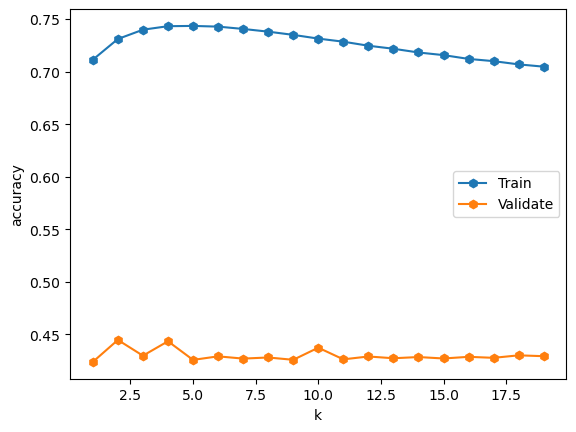

In [ ]:
k_range = range(1,20)
train_score = []
validate_score = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors = k)
    knn.fit(X_train1, y_train1)
    train_score.append(knn.score(X_train1, y_train1))
    validate_score.append(knn.score(X_validate1, y_validate1))
plt.figure()
plt.xlabel('k')
plt.ylabel('accuracy')
plt.plot(k_range, train_score, label = 'Train', marker='h')
plt.plot(k_range, validate_score, label = 'Validate', marker='h')
plt.legend()
plt.show()

In [ ]:
knn1 = KNeighborsClassifier(n_neighbors=10)
knn1.fit(X_train1, y_train1)
knn_tr_acc = knn1.score(X_train1,y_train1)
knn_val_acc = knn1.score(X_validate1, y_validate1)

In [ ]:
print(f'Ideal KNearest Neighbor Accuracy Scores:\n\n\
Training Accuracy:\n{knn_tr_acc:2%}\n\n\
Validation Accuracy:\n{knn_val_acc:2%}\n\n\
Baseline Accuracy:\n{outpatient_baseline_accuracy:2%}')

Ideal KNearest Neighbor Accuracy Scores:

Training Accuracy:
73.141978%

Validation Accuracy:
43.722458%

Baseline Accuracy:
64.288466%


# KNearest Neighbor (Inpatient)

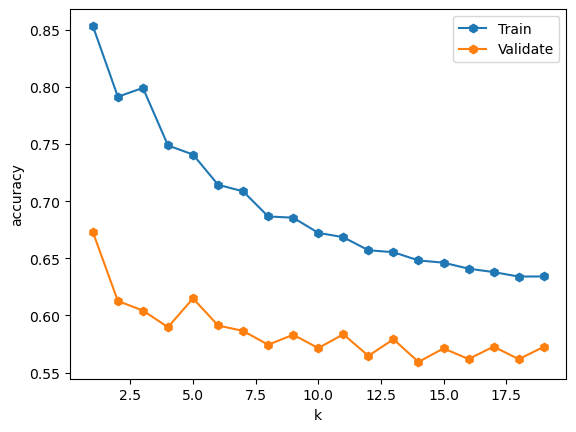

In [ ]:
k_range = range(1,20)
train_score = []
validate_score = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors = k)
    knn.fit(X_train2, y_train2)
    train_score.append(knn.score(X_train2, y_train2))
    validate_score.append(knn.score(X_validate2, y_validate2))
plt.figure()
plt.xlabel('k')
plt.ylabel('accuracy')
plt.plot(k_range, train_score, label = 'Train', marker='h')
plt.plot(k_range, validate_score, label = 'Validate', marker='h')
plt.legend()
plt.show()

In [ ]:
knn2 = KNeighborsClassifier(n_neighbors=5)
knn2.fit(X_train2, y_train2)
knn_tr_acc = knn2.score(X_train2,y_train2)
knn_val_acc = knn2.score(X_validate2, y_validate2)

In [ ]:
print(f'Ideal KNearest Neighbor Accuracy Scores:\n\n\
Training Accuracy:\n{knn_tr_acc:2%}\n\n\
Validation Accuracy:\n{knn_val_acc:2%}\n\n\
Baseline Accuracy:\n{inpatient_baseline_accuracy:2%}')

Ideal KNearest Neighbor Accuracy Scores:

Training Accuracy:
74.080680%

Validation Accuracy:
61.489362%

Baseline Accuracy:
57.669419%


In [ ]:
knn_test_acc = knn2.score(X_test2, y_test2)
print(knn_test_acc)

0.6058996383363472


# Grid Serach Logistic Regression for Outpatient

In [ ]:
params = {'max_depth': range(1,20),
          'max_features': [None, 1, 3, 5, 7]}

lr = LogisticRegression()

lrgrid = GridSearchCV(lr, params, cv=3)

lrgrid.fit(X_train2, y_train2)

test_scores = results['mean_test_score']
params = results['params']


for p, s in zip(params, test_scores):
    p['score'] = s

pd.DataFrame(params).sort_values(by='score')

# Logistic Regression (Outpatient)

In [ ]:
lr1 = LogisticRegression(random_state=117)
lr1.fit(X_train1, y_train1)
lr_tr_acc1 = lr1.score(X_train1,y_train1)

lr1.fit(X_validate1, y_validate1)
lr_val_acc1 = lr1.score(X_validate1, y_validate1)

In [ ]:
print(f'Logistic Regression Model Accuracy Scores:\n\n\
Baseline Accuracy Score:\n{outpatient_baseline_accuracy:2%}\n\n\
Model Train Accuracy Score:\n{lr_tr_acc1:2%}\n\
Model Validate Accuracy Score:\n{lr_val_acc1:2%}')

Logistic Regression Model Accuracy Scores:

Baseline Accuracy Score:
64.288466%

Model Train Accuracy Score:
64.288426%
Model Validate Accuracy Score:
64.288412%


In [ ]:
lr_test_acc1 = lr1.score(X_test1, y_test1)
print("Test Accuracy:", lr_test_acc1)

Test Accuracy: 0.6428870833965058


# Logistic Regression (Inpatient)

In [ ]:
lr2 = LogisticRegression(random_state=117)
lr2.fit(X_train2, y_train2)
lr_tr_acc2 = lr2.score(X_train2,y_train2)

lr2.fit(X_validate2, y_validate2)
lr_val_acc2 = lr2.score(X_validate2, y_validate2)

In [ ]:
print(f'Logistic Regression Model Accuracy Scores:\n\n\
Baseline Accuracy Score:\n{inpatient_baseline_accuracy:2%}\n\n\
Model Train Accuracy Score:\n{lr_tr_acc2:2%}\n\
Model Validate Accuracy Score:\n{lr_val_acc2:2%}')

Logistic Regression Model Accuracy Scores:

Baseline Accuracy Score:
57.669419%

Model Train Accuracy Score:
57.667848%
Model Validate Accuracy Score:
57.672872%


<div style="background-color: darkturquoise; padding: 20px; font-size: 20px; color: white;">
    Project Pipeline:-
    <div style="background-color: rgba(255, 0, 0, 0.5);">
        - Plan ---Acquire---Prepare---Explore---Model <strong style="font-size: 18px; background-color: orange; font-weight: bold; color: white;"> ---DELIVER</strong>  
    </div>
</div>


### Model to deliver: 

## Conclusion:
 
Trained Model:
MAE: 2636.42
MSE: 55,712,688.56
    
    
    
Baseline Model:
MAE: 2827.80
MSE: 72,293,000.37.               



Test Model:
Mean Absolute Error: 2160.821729290517
Mean Squared Error: 8305312.8198176725 



Summary:- The "Test Model" with a Mean Absolute Error (MAE) of approximately 2160.82 and a Mean Squared Error (MSE) of approximately 8,305,312.82 outperforms the "Baseline Model" and the "Trained Model" on both MAE and MSE, making it the best choice against the baseline.


 

## Acctionable Recommendations:

- Implement more advanced machine learning models to predict potentially fraudulent claims.

- Take strict legal actions against fraud.  

 - Establish thorough documentation and audit trails for healthcare transactions.


## Next Steps:

 - Continuously evaluate and update fraud prevention strategies.

 - Enhance fraud detection models and algorithms.
 
 - Promote whistleblower programs and legal actions.

Medicare data is protected. This information has not been publicly disclosed and may be privileged and confidential. It is for government use only and must not be disseminated, distributed, or copied to persons not authorized to receive the information. Unauthorized disclosure may result in prosecution to the full extent of the law.